In [39]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

In [40]:
#Reading the input data
df = pd.read_csv("Input.csv")
pd.set_option("display.max_columns", None)
df

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                3               0                  0              1   
1                5               0                  1              3   
2                2               0                  0              1   
3                4               0                  2              5   
4                2               0                  0              0   
...            ...             ...                ...            ...   
88642            3               1                  0              0   
88643            2               0                  0              0   
88644            2               1                  0              5   
88645            2               0                  0              1   
88646            2               0                  0              0   

       qty_equal_url  qty_at_url  qty_and_url  qty_tld_url  length_url  \
0                  0           0            0            1          25   
1                  3           0            2            3         223   
2                  0           0            0            1          15   
3                  0           0            0            1          81   
4                  0           0            0            1          19   
...              ...         ...          ...          ...         ...   
88642              0           0            0            2          23   
88643              0           0            0            1          34   
88644              0           0            0            1          70   
88645              0           0            0            1          28   
88646              0           0            0            1          16   

       qty_dot_domain  qty_dot_directory  qty_hyphen_directory  \
0                   2                  1                     0   
1                   2                  3                     0   
2                   2                  0                     0   
3                   2                  2                     0   
4                   2                 -1                    -1   
...               ...                ...                   ...   
88642               3                 -1                    -1   
88643               2                 -1                    -1   
88644               1                  1                     1   
88645               2                  0                     0   
88646               2                 -1                    -1   

       qty_underline_directory  qty_slash_directory  \
0                            0                    1   
1                            0                    3   
2                            0                    1   
3                            2                    5   
4                           -1                   -1   
...                        ...                  ...   
88642                       -1                   -1   
88643                       -1                   -1   
88644                        0                    5   
88645                        0                    1   
88646                       -1                   -1   

       qty_questionmark_directory  qty_equal_directory  qty_at_directory  \
0                               0                    0                 0   
1                               0                    0                 0   
2                               0                    0                 0   
3                               0                    0                 0   
4                              -1                   -1                -1   
...                           ...                  ...               ...   
88642                          -1                   -1                -1   
88643                          -1                   -1                -1   
88644                           0                    0                 0   
88645                           0      

In [41]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty_dot_url                 88647 non-null  int64
 1   qty_hyphen_url              88647 non-null  int64
 2   qty_underline_url           88647 non-null  int64
 3   qty_slash_url               88647 non-null  int64
 4   qty_equal_url               88647 non-null  int64
 5   qty_at_url                  88647 non-null  int64
 6   qty_and_url                 88647 non-null  int64
 7   qty_tld_url                 88647 non-null  int64
 8   length_url                  88647 non-null  int64
 9   qty_dot_domain              88647 non-null  int64
 10  qty_dot_directory           88647 non-null  int64
 11  qty_hyphen_directory        88647 non-null  int64
 12  qty_underline_directory     88647 non-null  int64
 13  qty_slash_directory         88647 non-null  int64
 14  qty_qu

In [42]:
#Descrptive statistics 
df.describe()


qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_equal_url    qty_at_url   qty_and_url   qty_tld_url    length_url  \
count   88647.000000  88647.000000  88647.000000  88647.000000  88647.000000   
mean        0.205861      0.022133      0.140885      1.047480     36.347615   
std         0.954272      0.279652      0.924864      0.254755     46.191590   
min         0.000000      0.000000      0.000000      0.000000      4.000000   
25%         0.000000      0.000000      0.000000      1.000000     17.000000   
50%         0.000000      0.000000      0.000000      1.000000     22.000000   
75%         0.000000      0.000000      0.000000      1.000000     38.000000   
max        23.000000     43.000000     26.000000     12.000000   4165.000000   

       qty_dot_domain  qty_dot_directory  qty_hyphen_directory  \
count    88647.000000       88647.000000          88647.000000   
mean         1.870622          -0.323666             -0.360813   
std          0.705607           0.899499              1.101398   
min          0.000000          -1.000000             -1.000000   
25%          1.000000          -1.000000             -1.000000   
50%          2.000000          -1.000000             -1.000000   
75%          2.000000           0.000000              0.000000   
max         21.000000          19.000000             23.000000   

       qty_underline_directory  qty_slash_directory  \
count             88647.000000         88647.000000   
mean                 -0.477997             0.713685   
std                   0.682409             2.216137   
min                  -1.000000            -1.000000   
25%                  -1.000000            -1.000000   
50%                  -1.000000            -1.000000   
75%                   0.000000             2.000000   
max                  17.000000            22.000000   

       qty_questionmark_directory  qty_equal_directory  qty_at_directory  \
count                88647.000000         88647.000000      88647.000000   
mean                    -0.535935            -0.528343         -0.532550   
std                      0.498710             0.517986          0.551786   
min                     -1.000000            -1.000000         -1.000000   
25%                     -1.000000            -1.000000         -1.000000   
50%                     -1.000000            -1.000000         -1.000000   
75%                      0.000000             0.000000          0.000000   
max                      0.000000             5.000000         43.000000   

       qty_and_directory  qty_exclamation_directory  qty_space_directory  \
count       88647.000000               88647.000000         88647.000000   
mean           -0.531422                  -0.534310            -0.535145   
std             0.538253                   0.504044             0.503964   
min            -1.000000                  -1.000000            -1.000000   
25%            -1.000000                  -1.000000            -1.000000   
50%            -1.000000                  -1.000000            -1.000000   
75%             0.000000                   0.000000             0.000000   
max            26.000000                   9.000000             9.000000   

       qty_tilde_directory  qty_comma_directory  qty_plus_directory  \
count         88647.000000         88647.000000        88647.000000   
mean             -0.532765

In [43]:
#check for missing values
df.isnull().sum()

qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_equal_url             0
                         ..
time_domain_activation    0
time_domain_expiration    0
qty_ip_resolved           0
ttl_hostname              0
phishing                  0
Length: 74, dtype: int64

Count of zeros (0): 58000
Count of ones (1): 30647


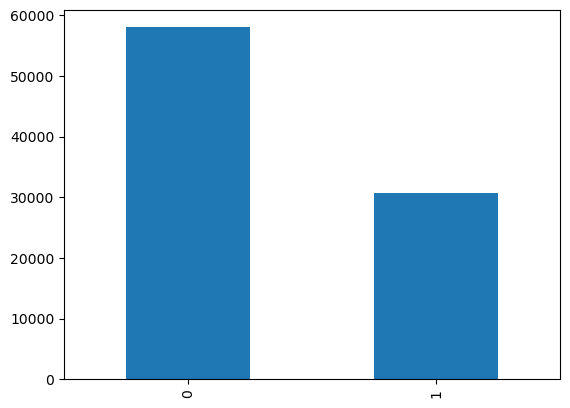

In [44]:
#show how target variable is distributed
df['phishing'].value_counts().plot(kind='bar')
counts = df['phishing'].value_counts()

# Print the counts
print("Count of zeros (0):", counts[0])
print("Count of ones (1):", counts[1])

In [45]:
#checking the different features 
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 74
Discrete feature Count 60
Continuous feature Count 14
Categorical feature Count 0


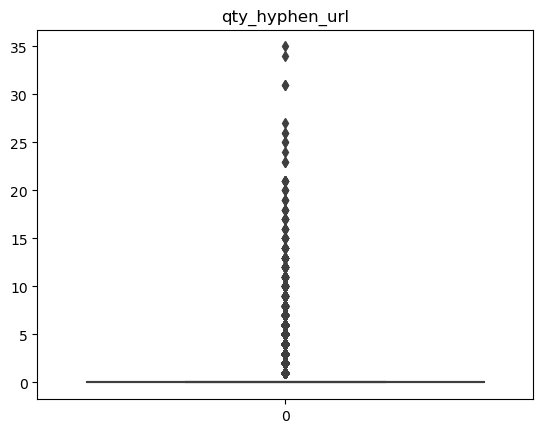

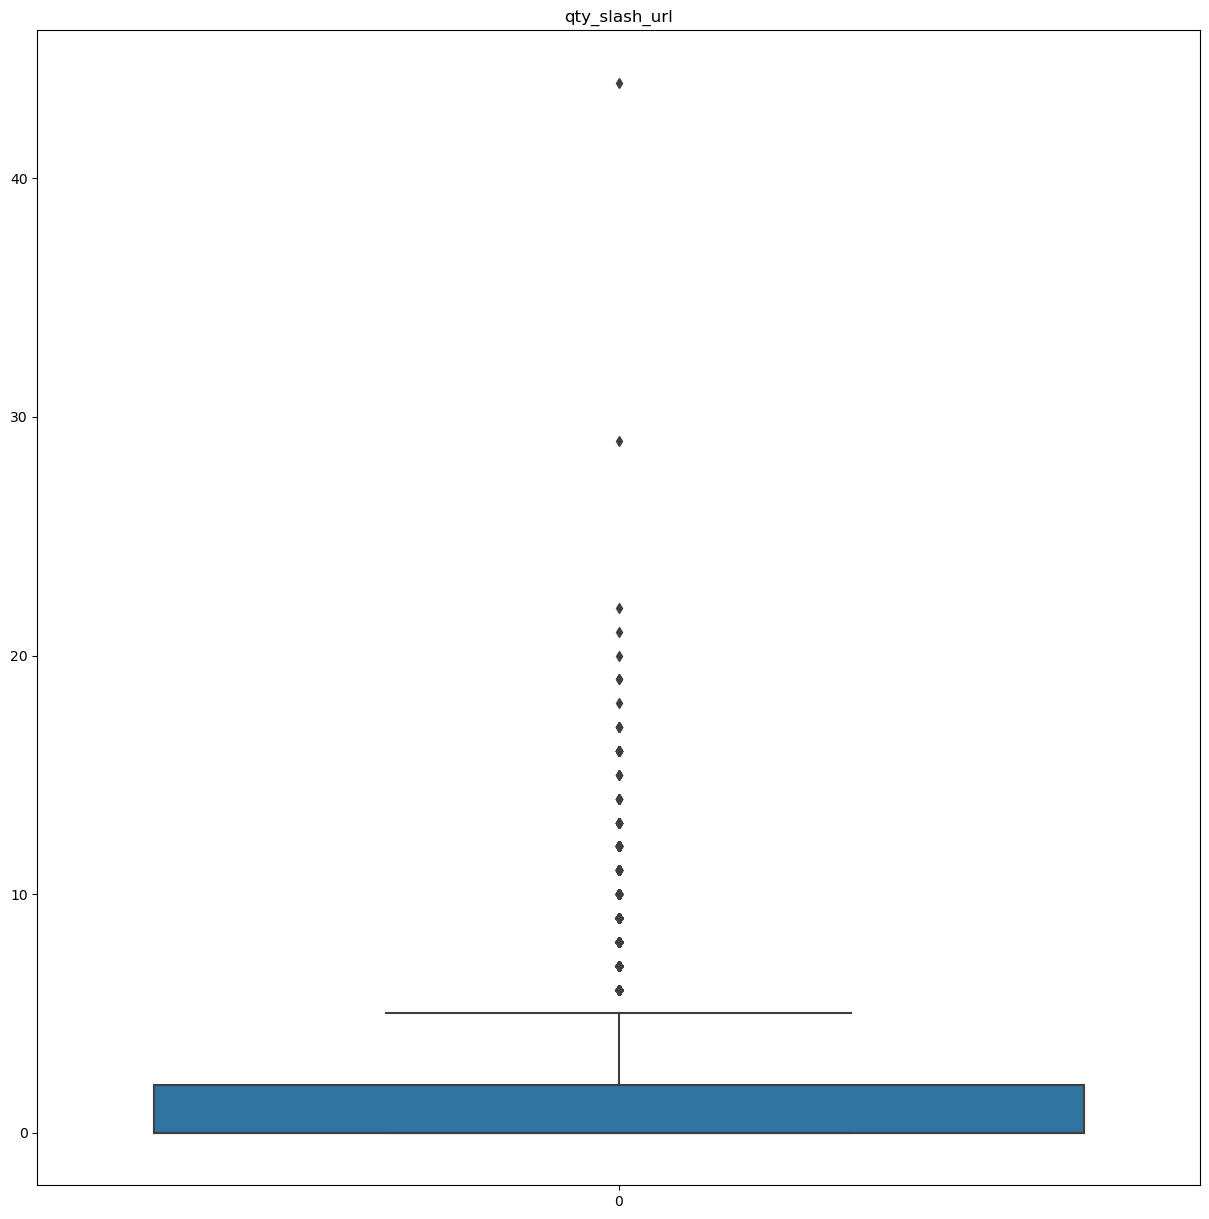

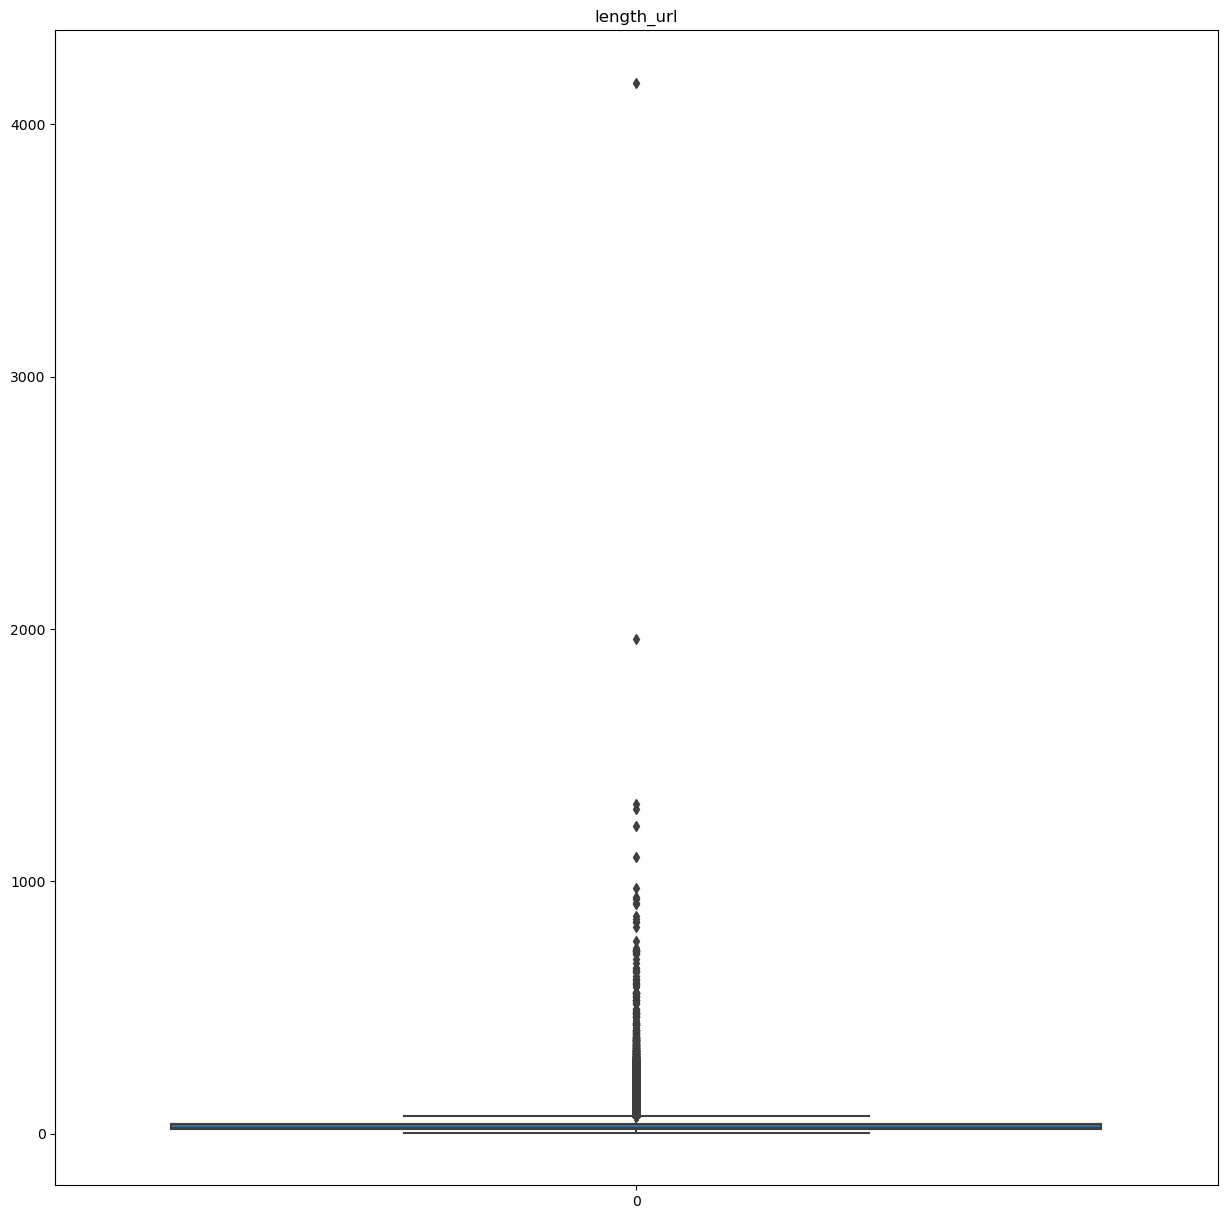

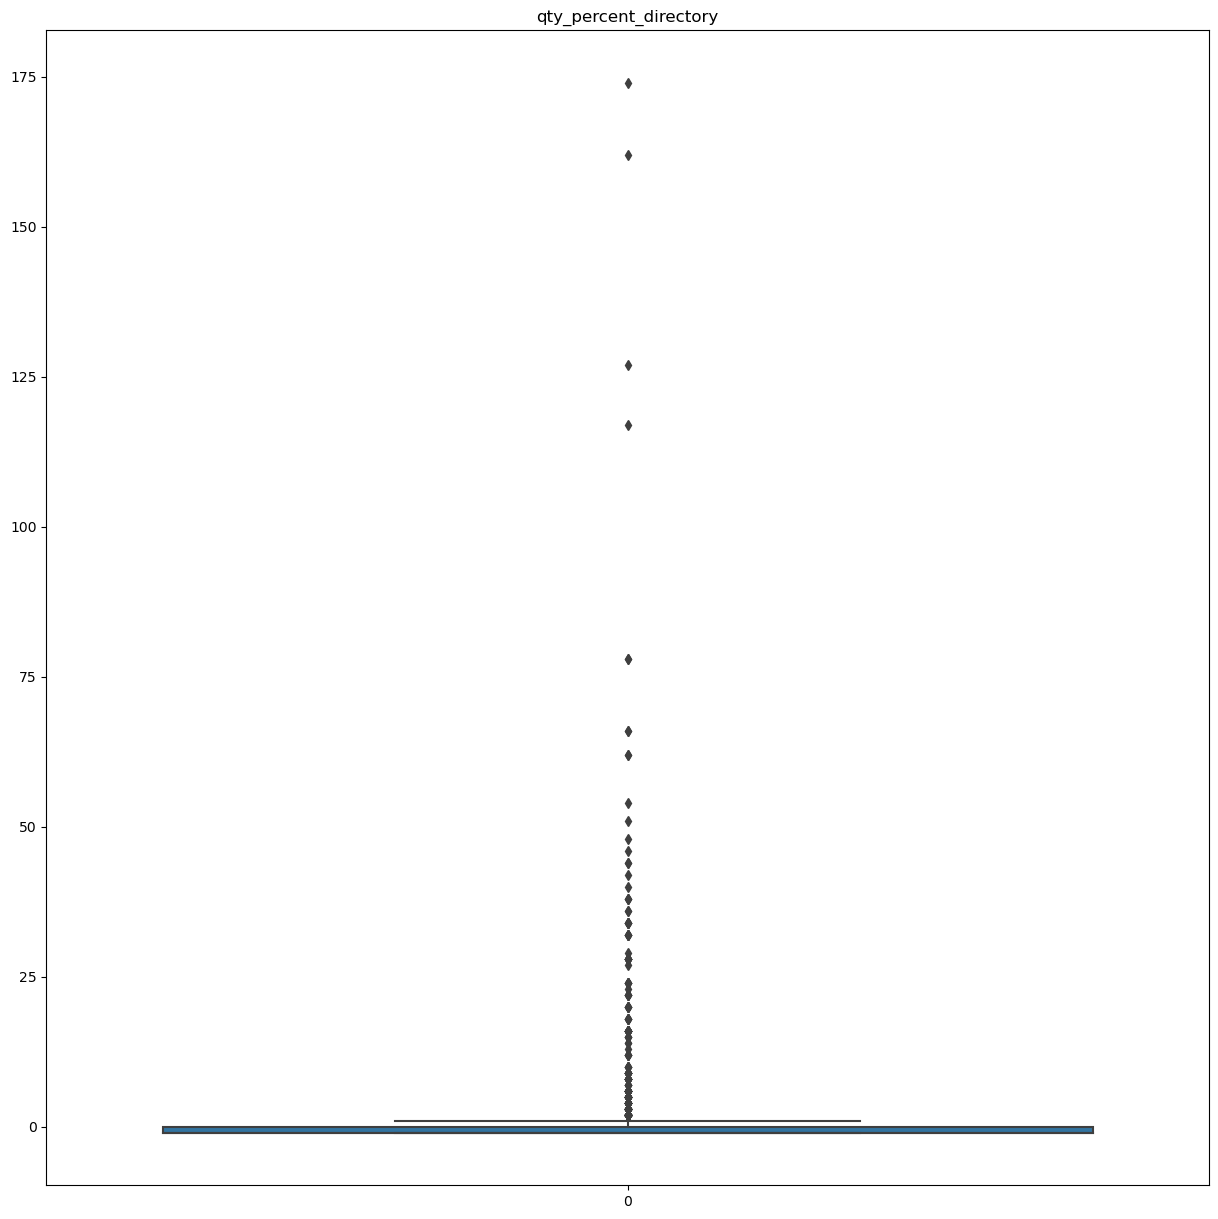

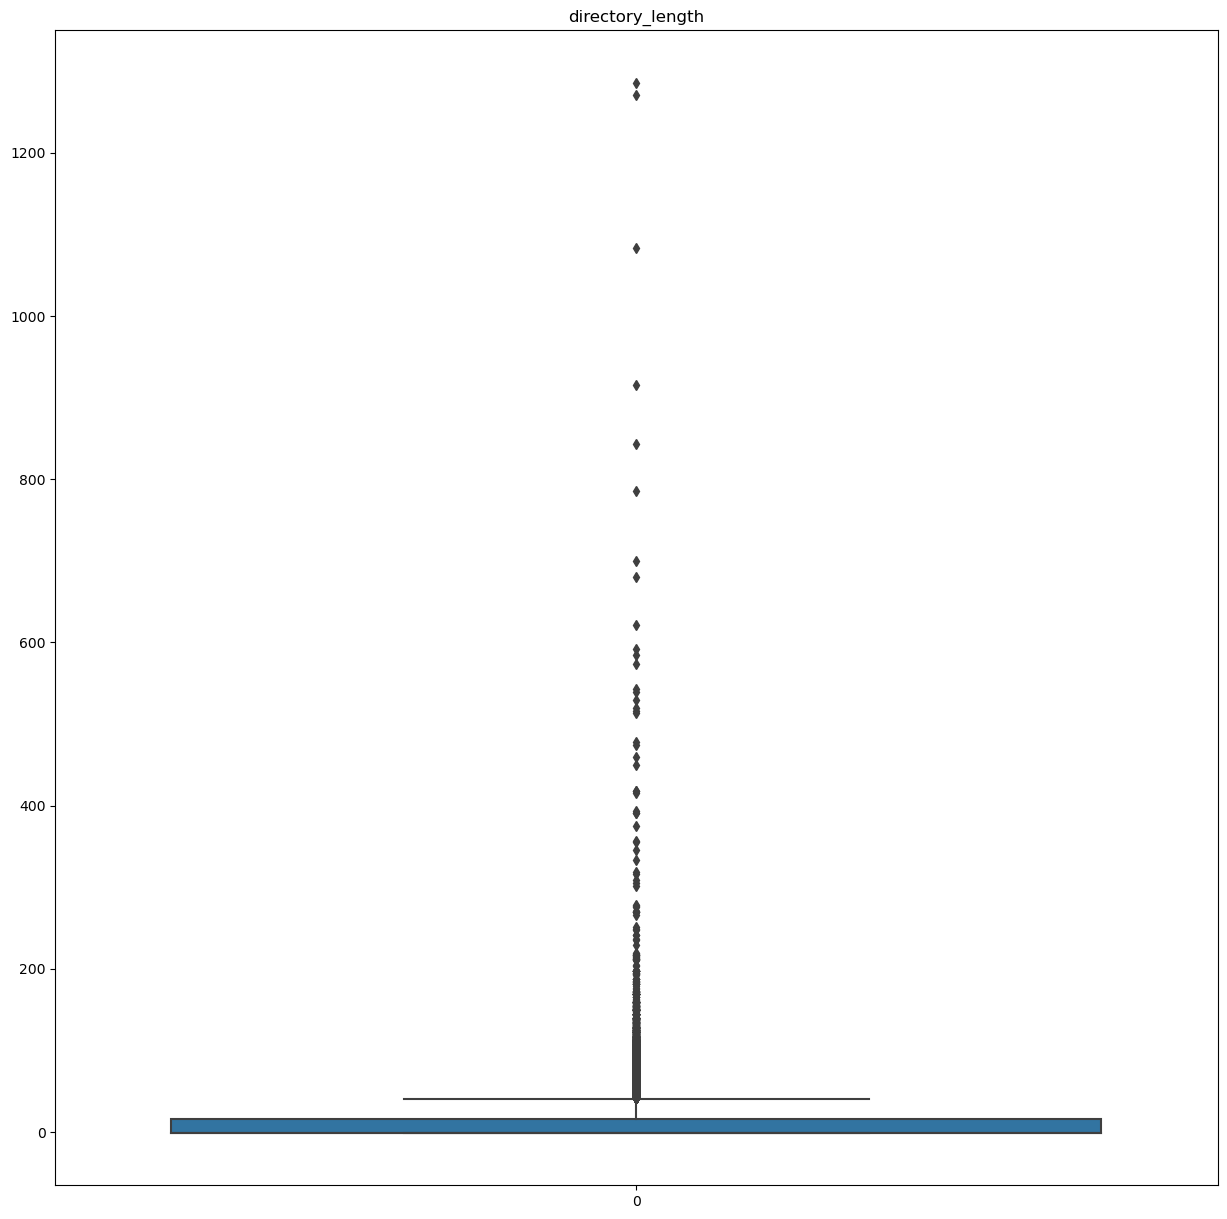

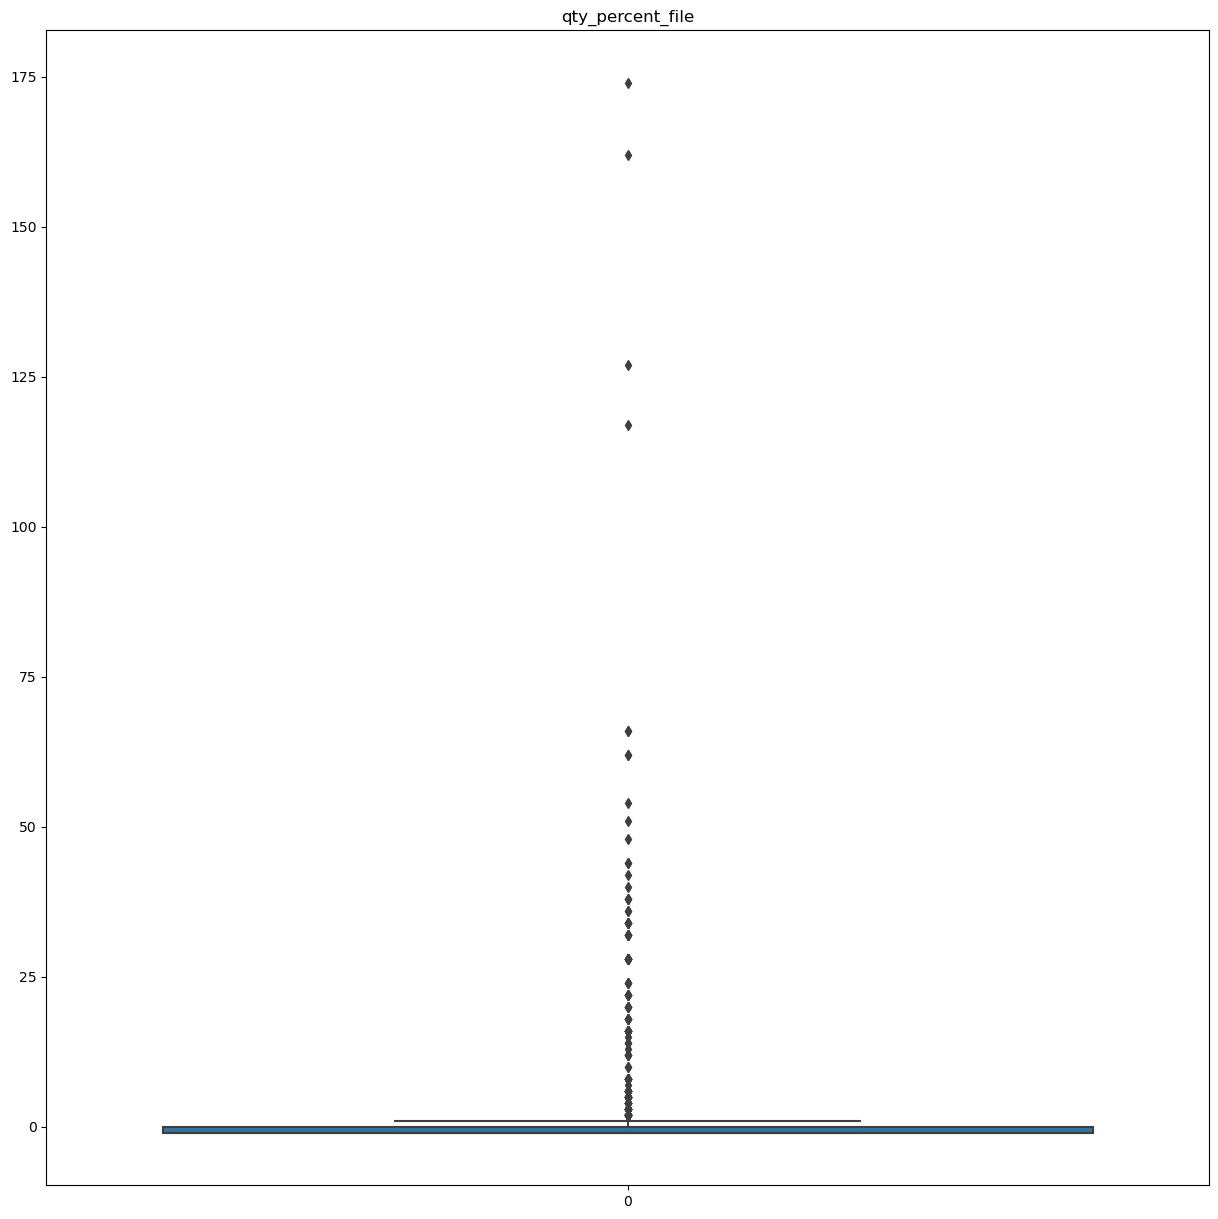

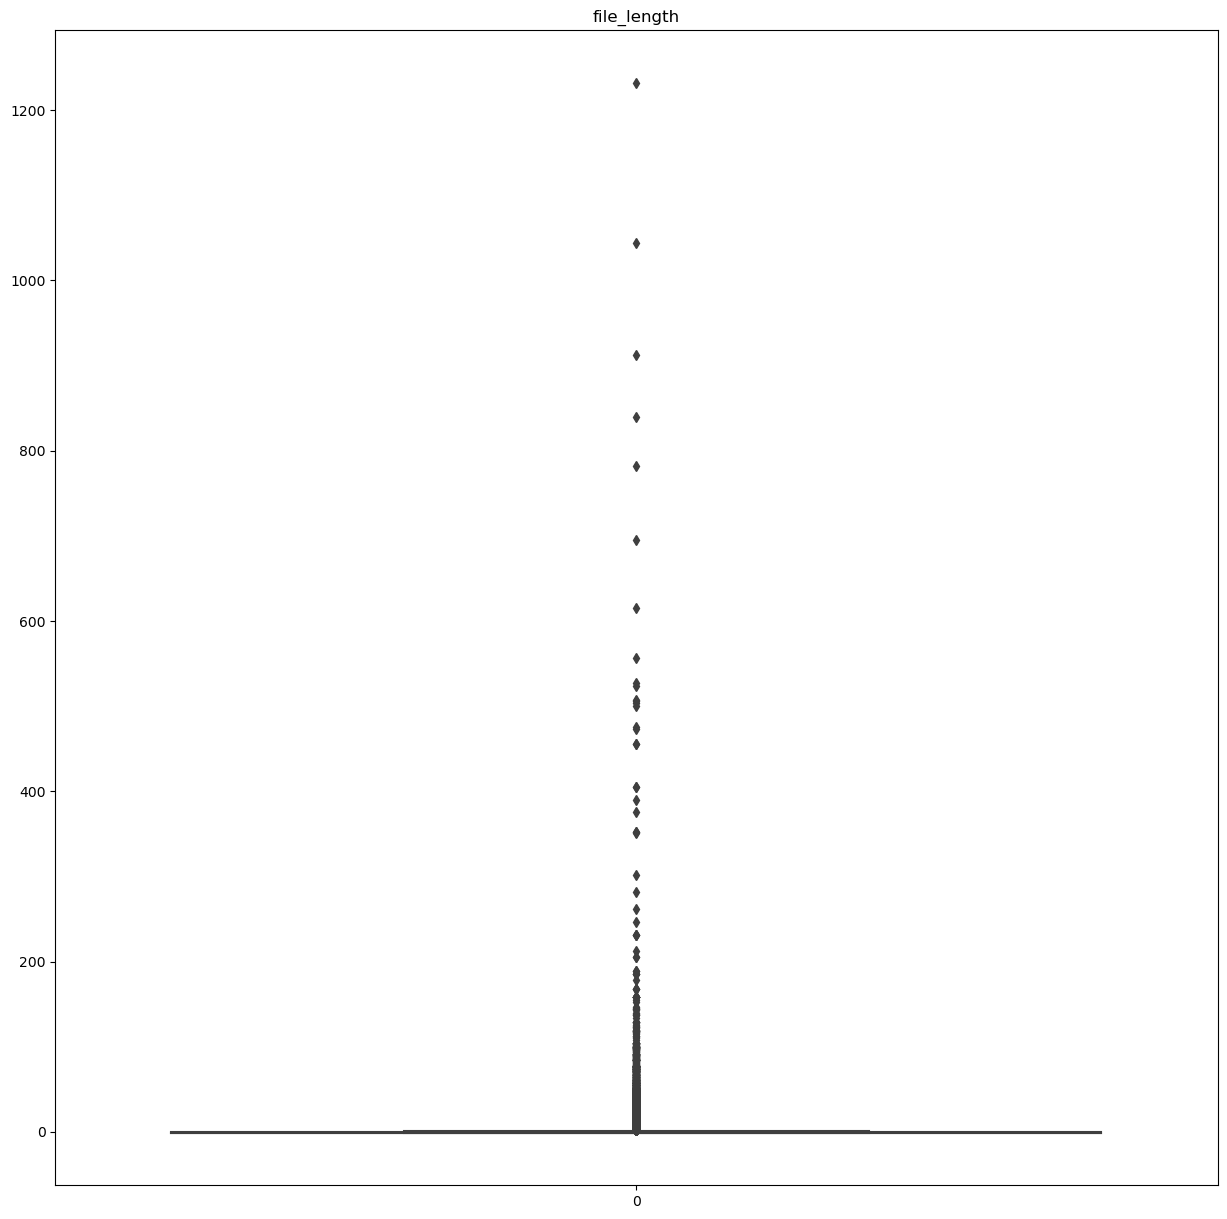

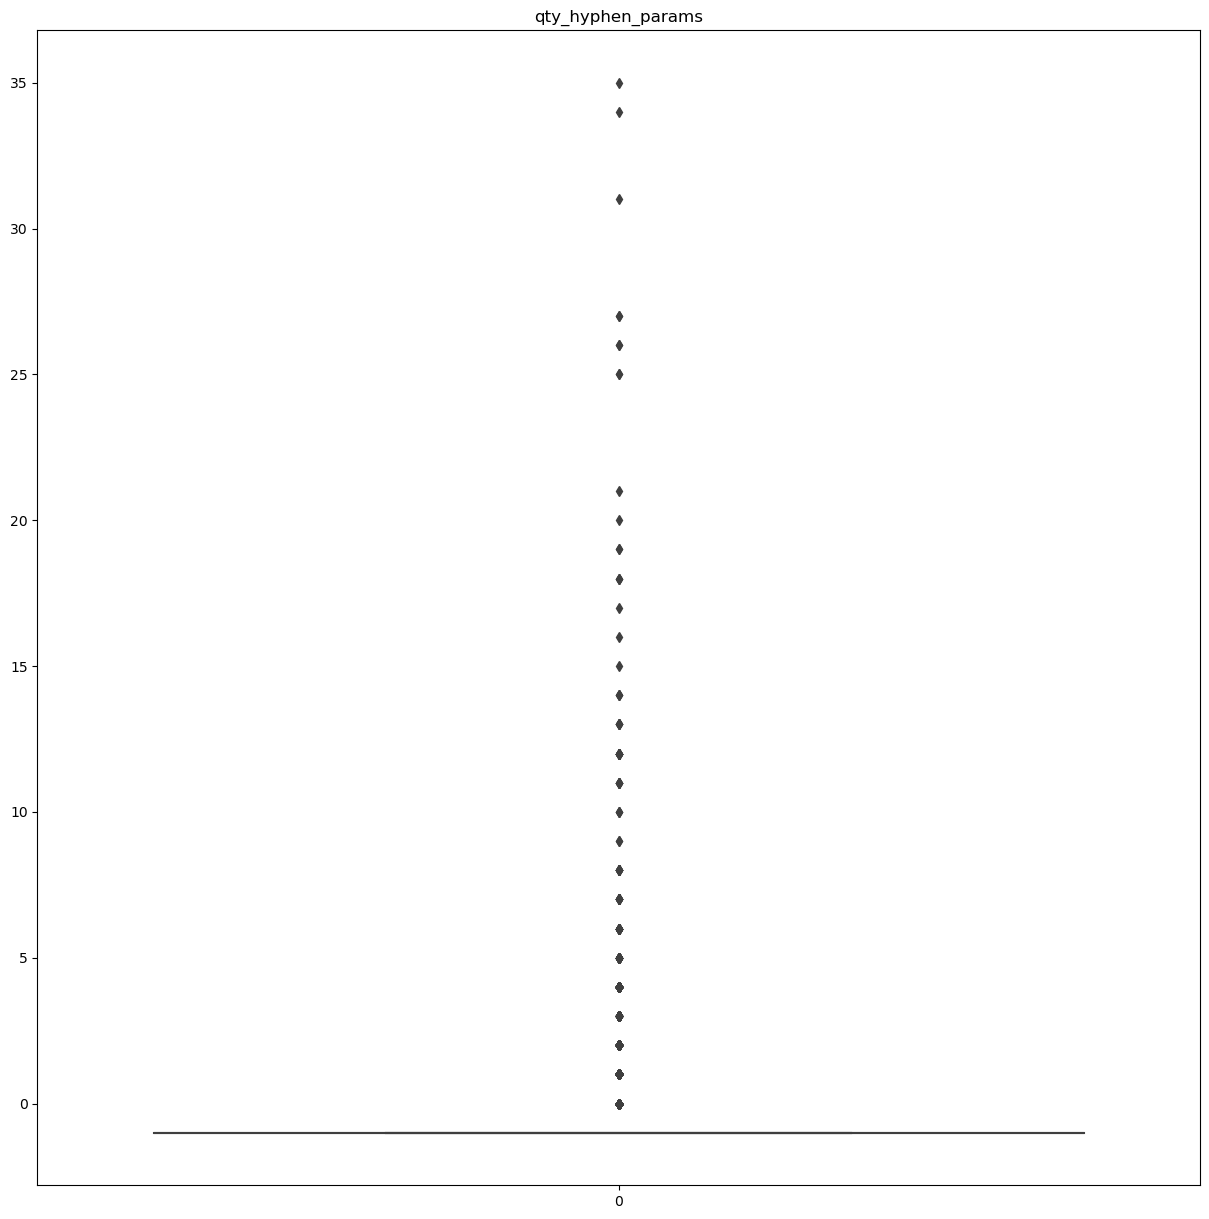

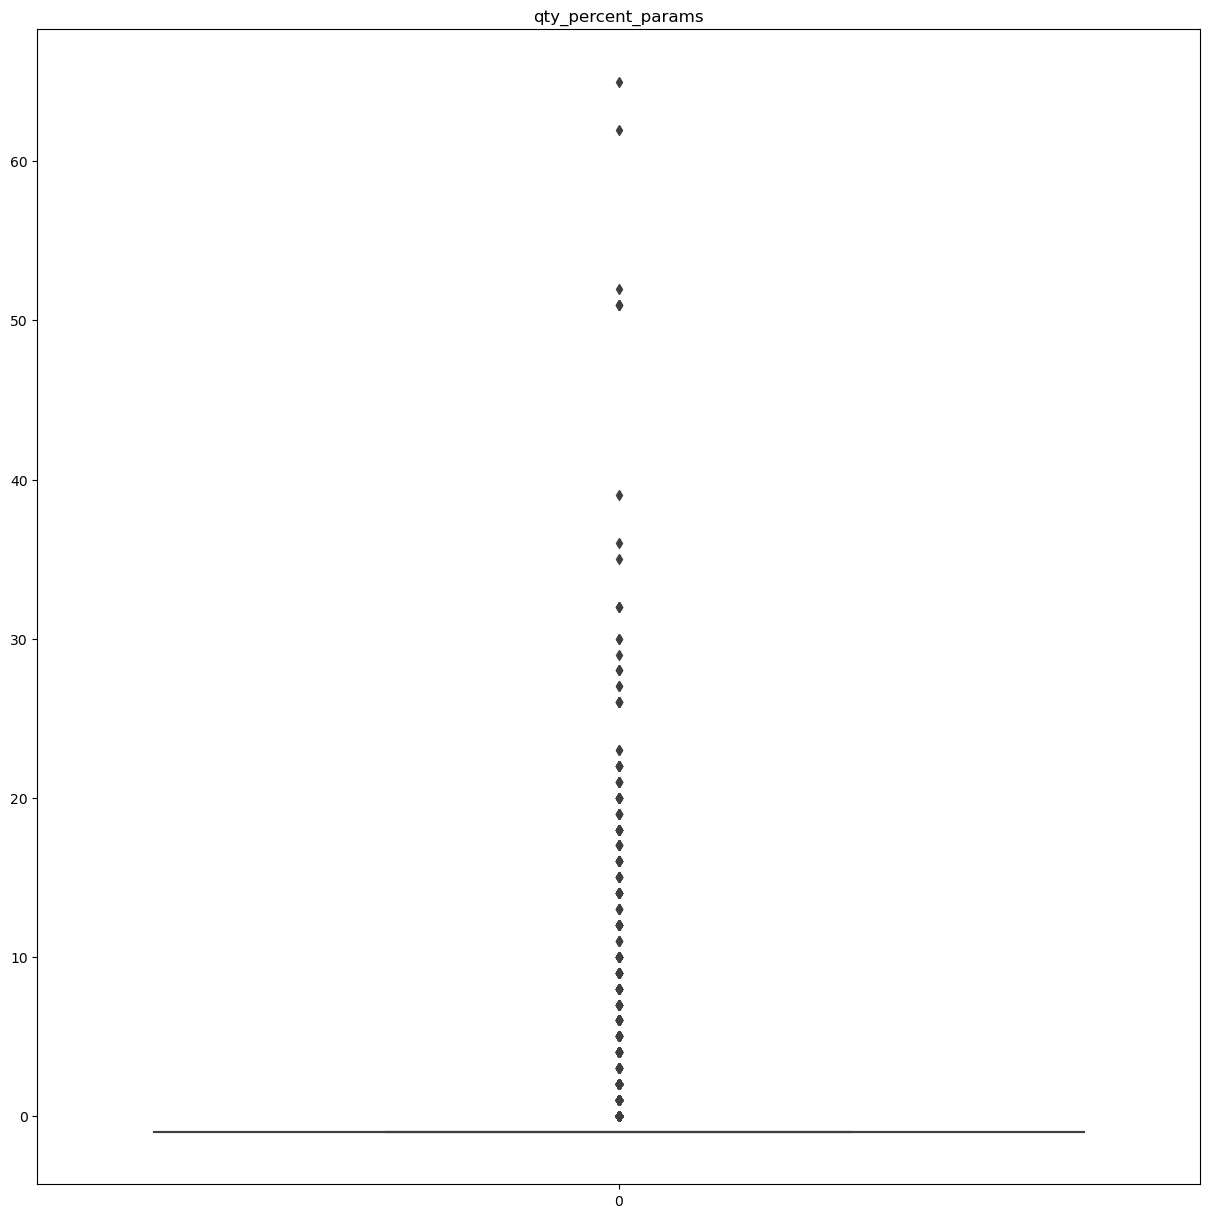

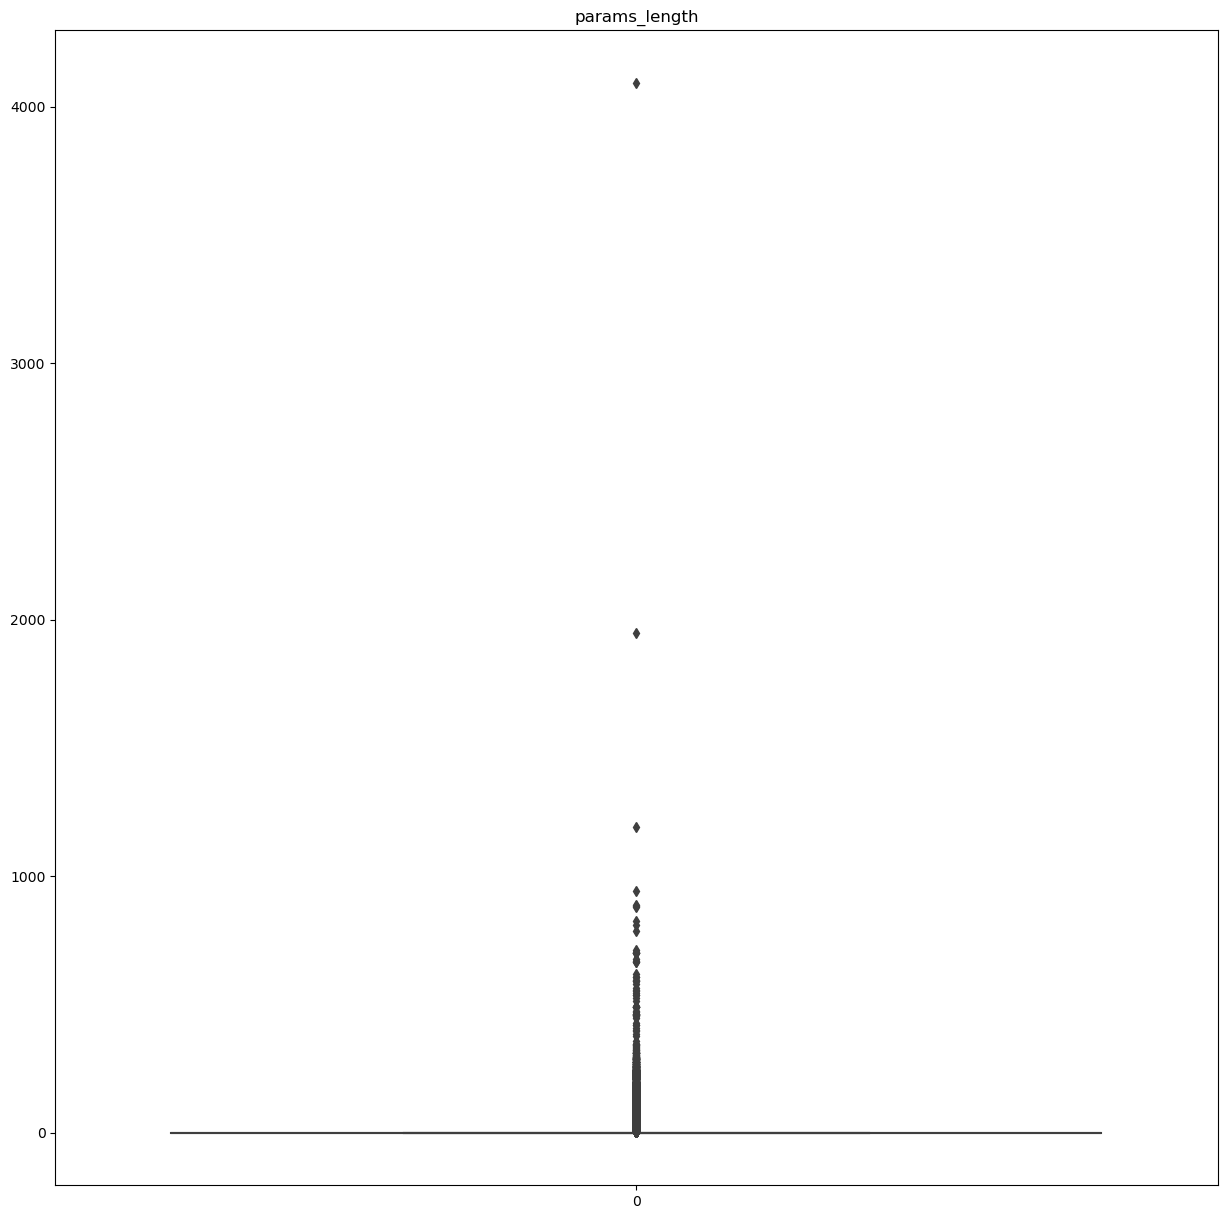

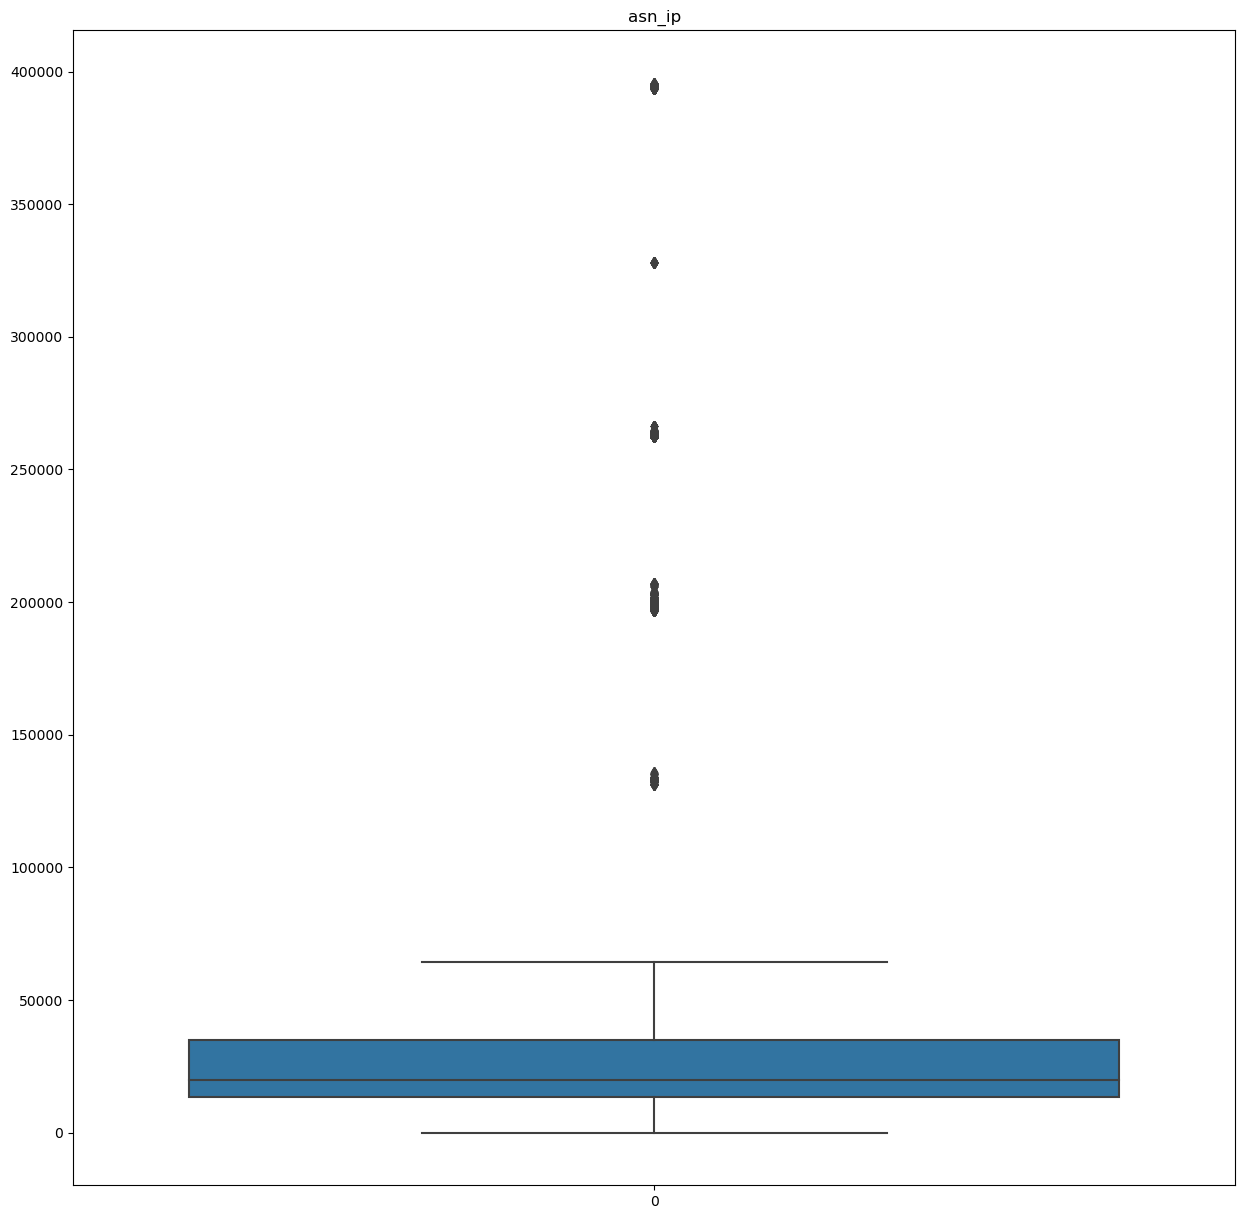

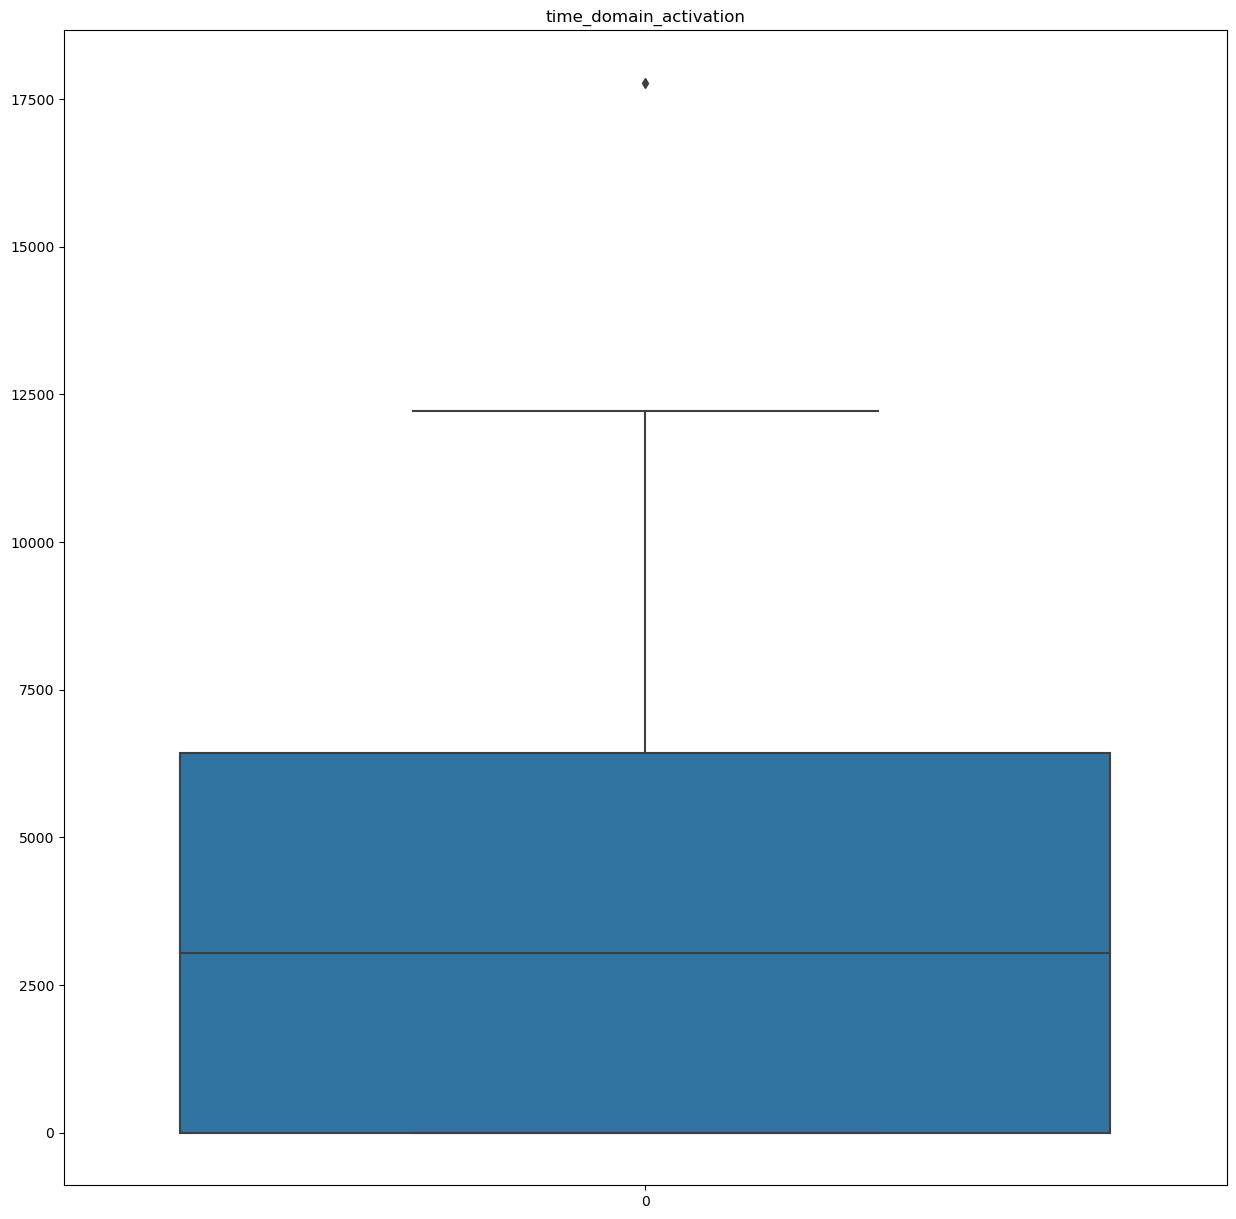

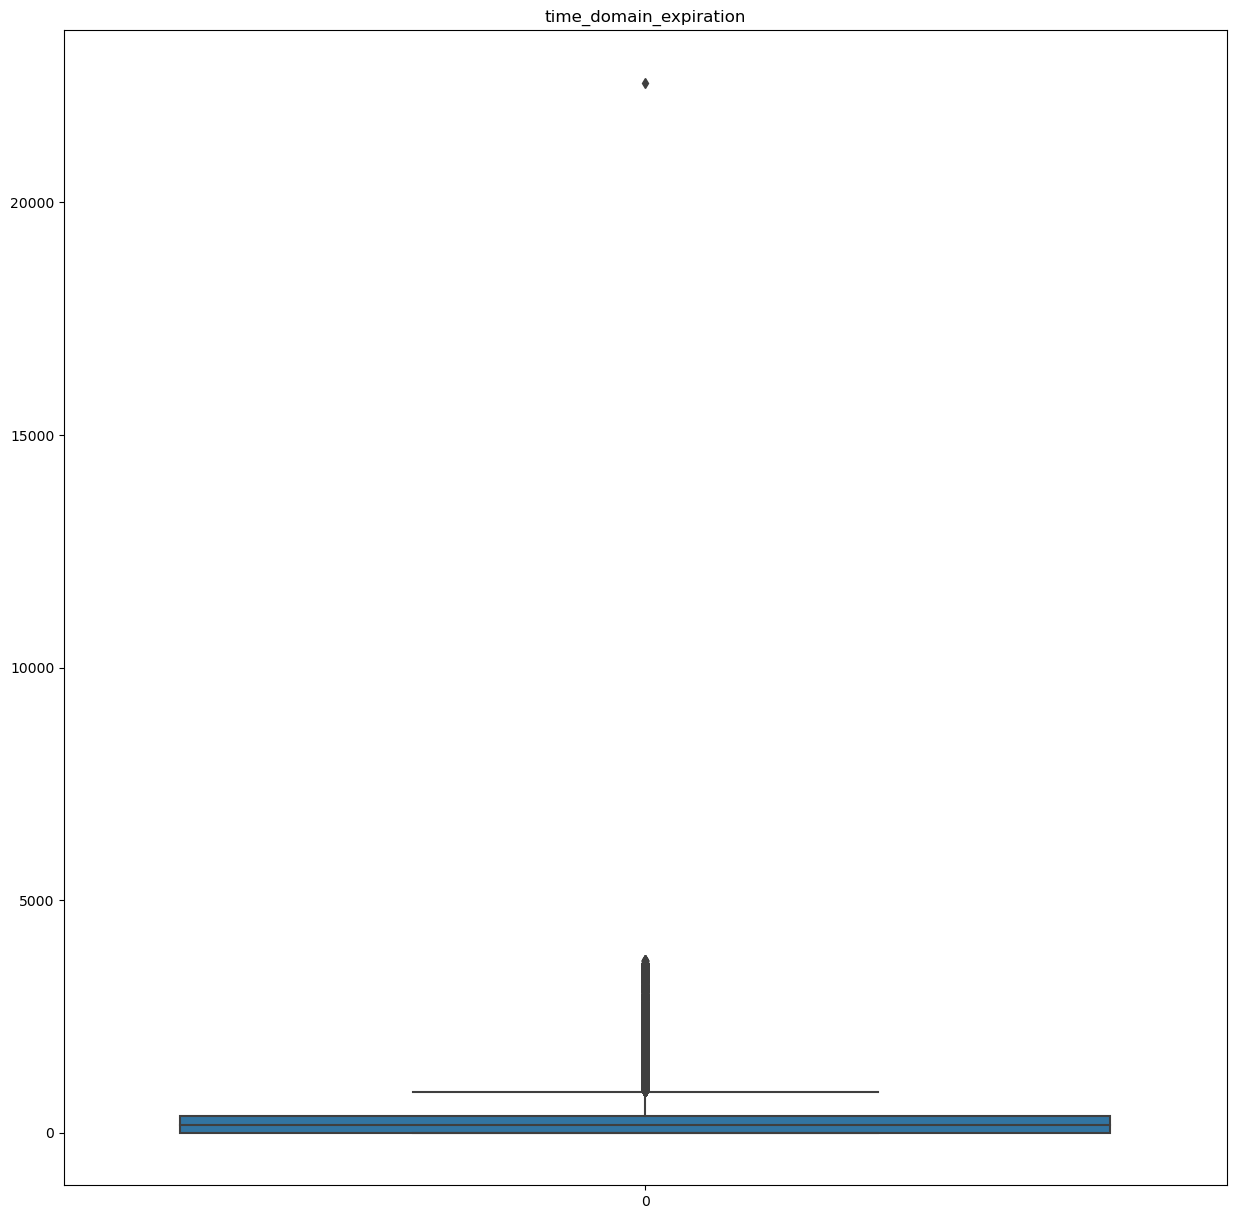

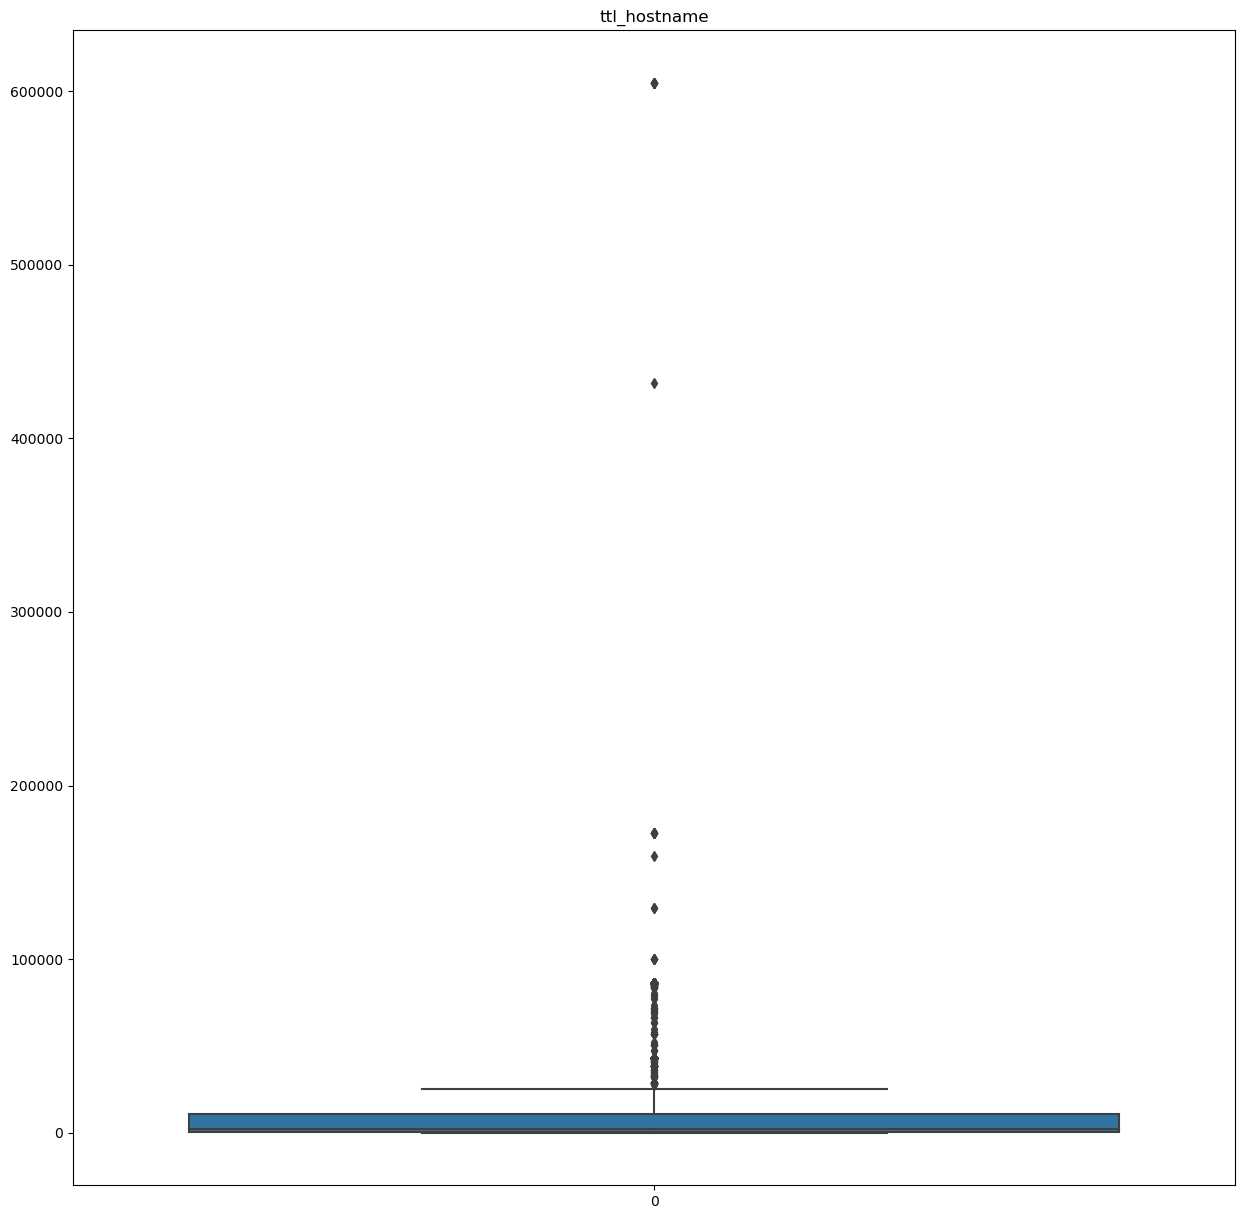

<Figure size 1500x1500 with 0 Axes>

In [46]:
#checking if outliers are present
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/674888940.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,15))


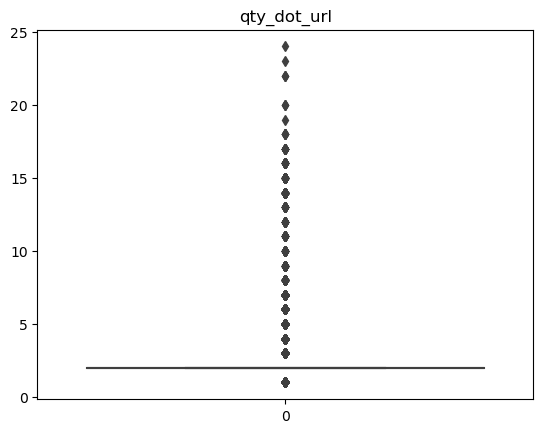

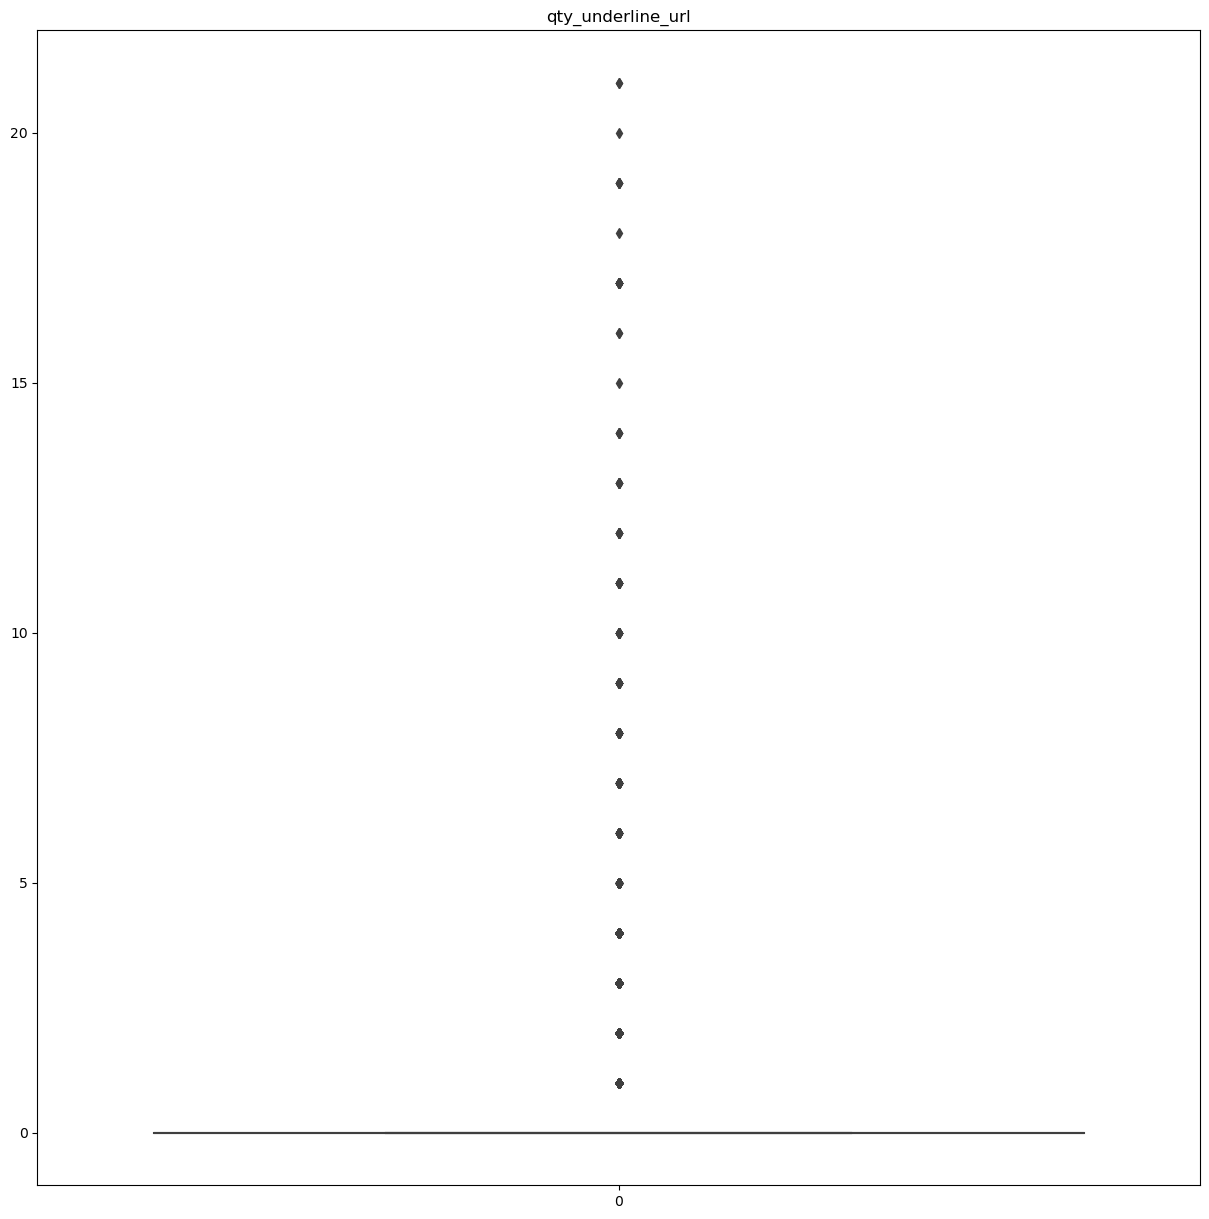

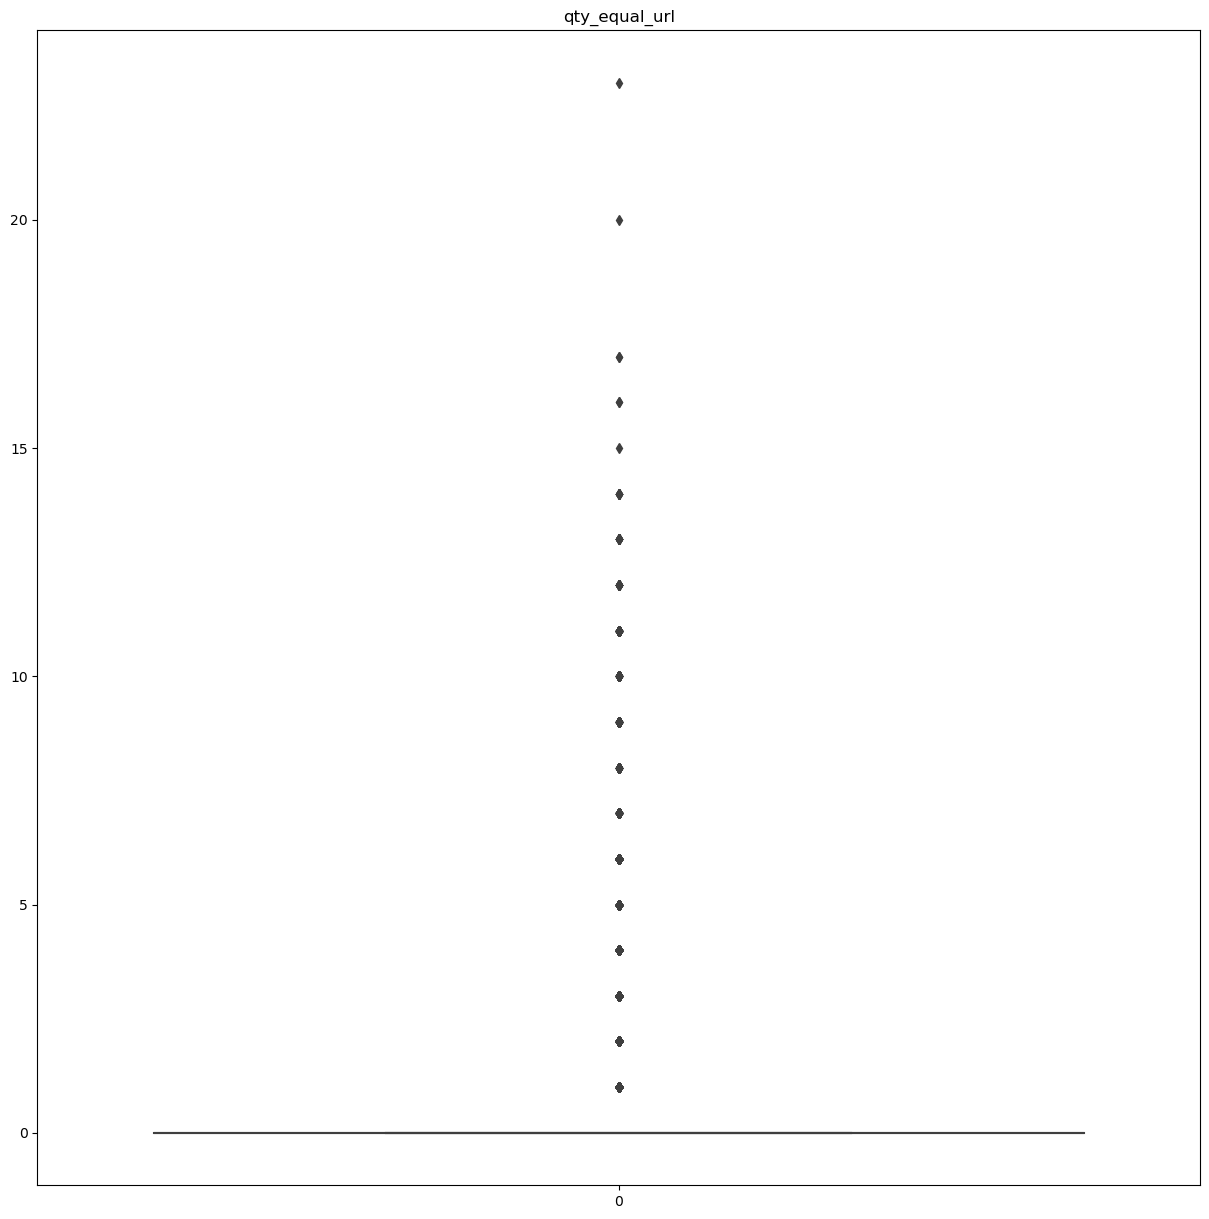

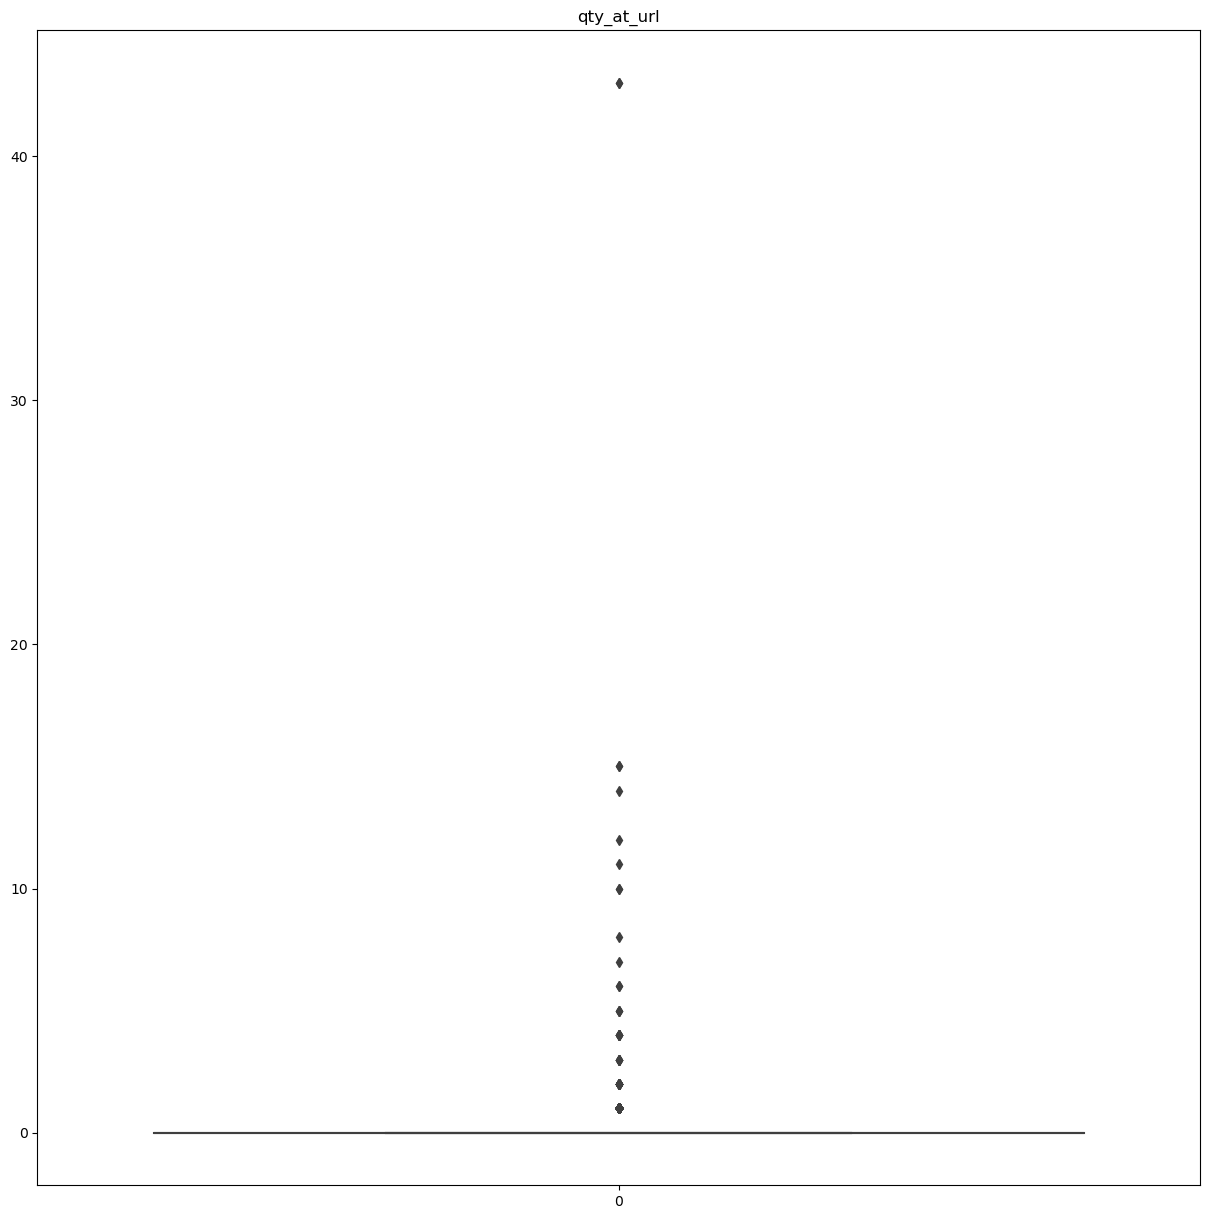

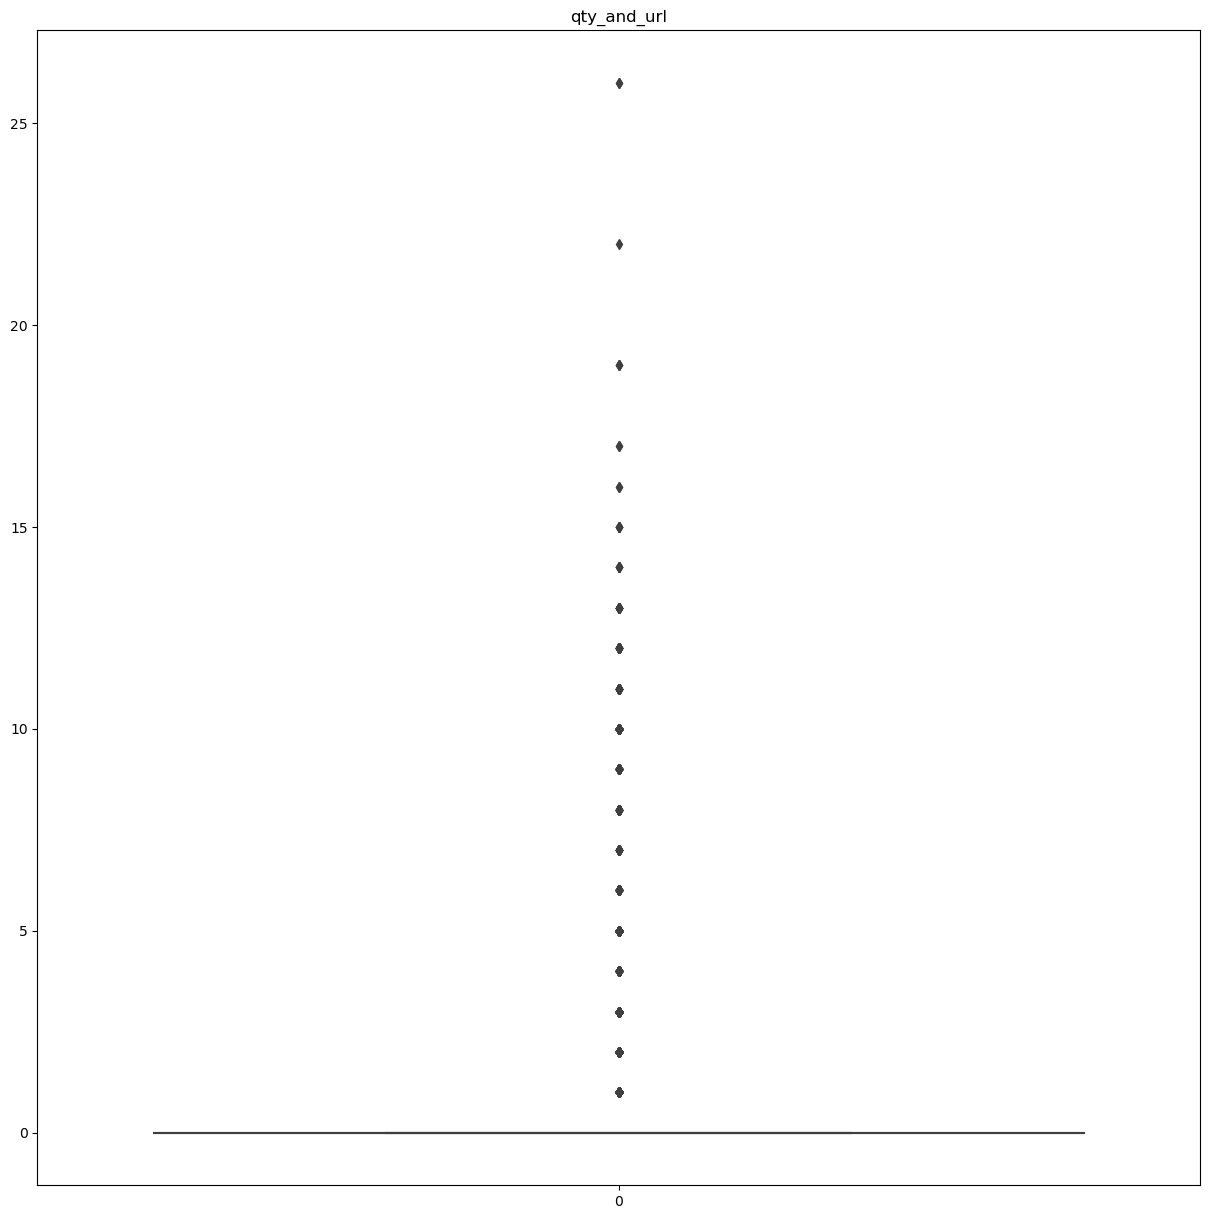

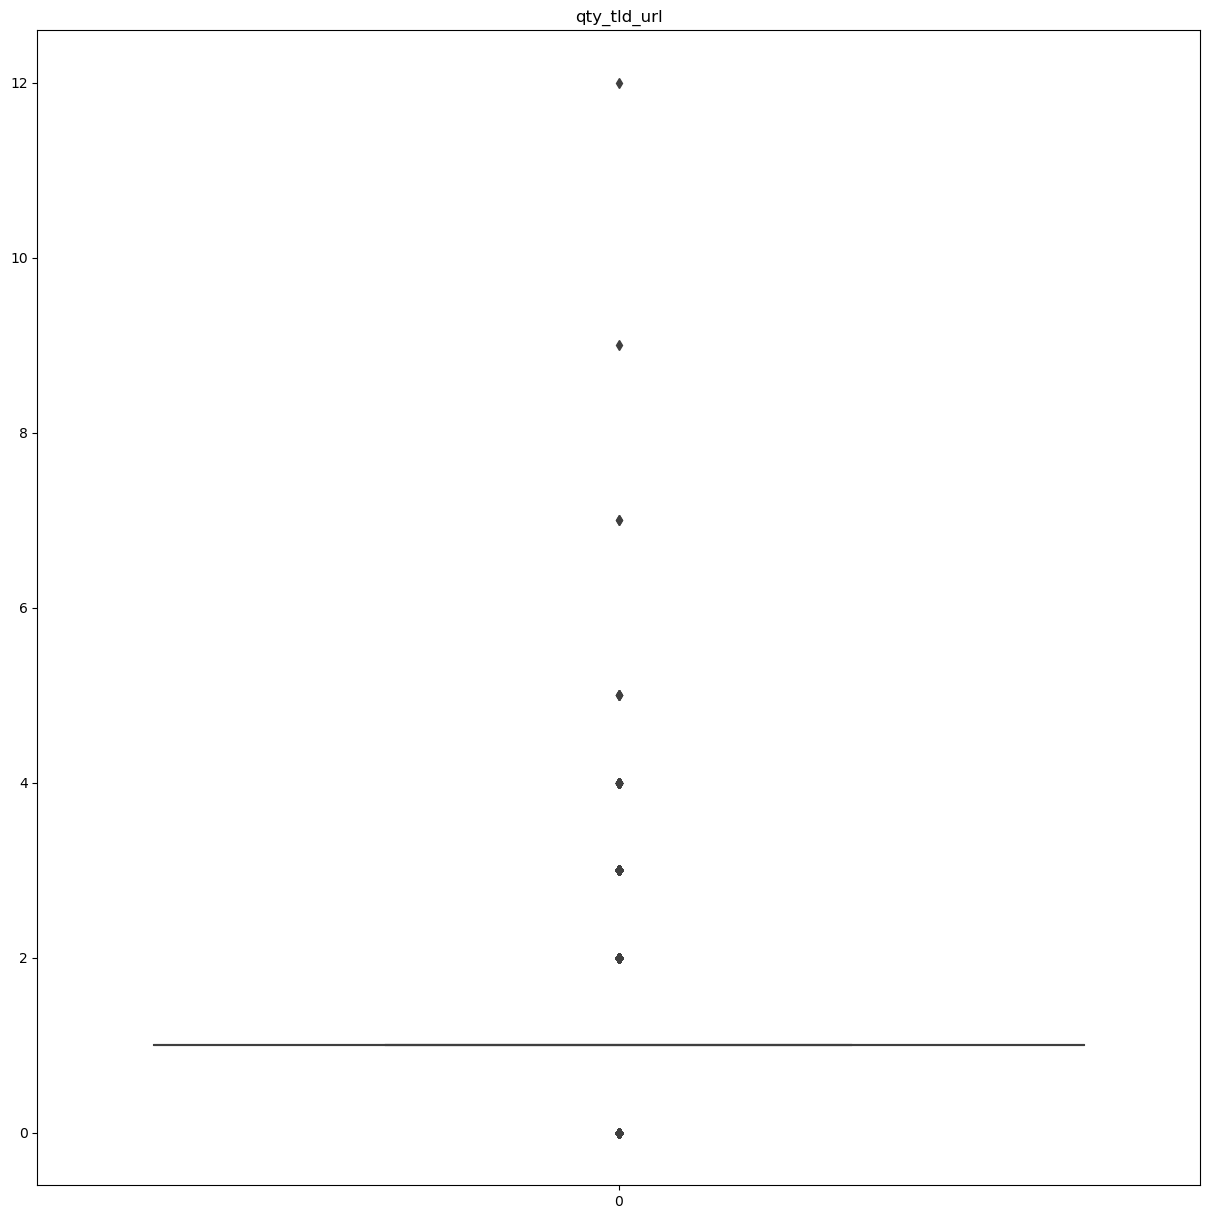

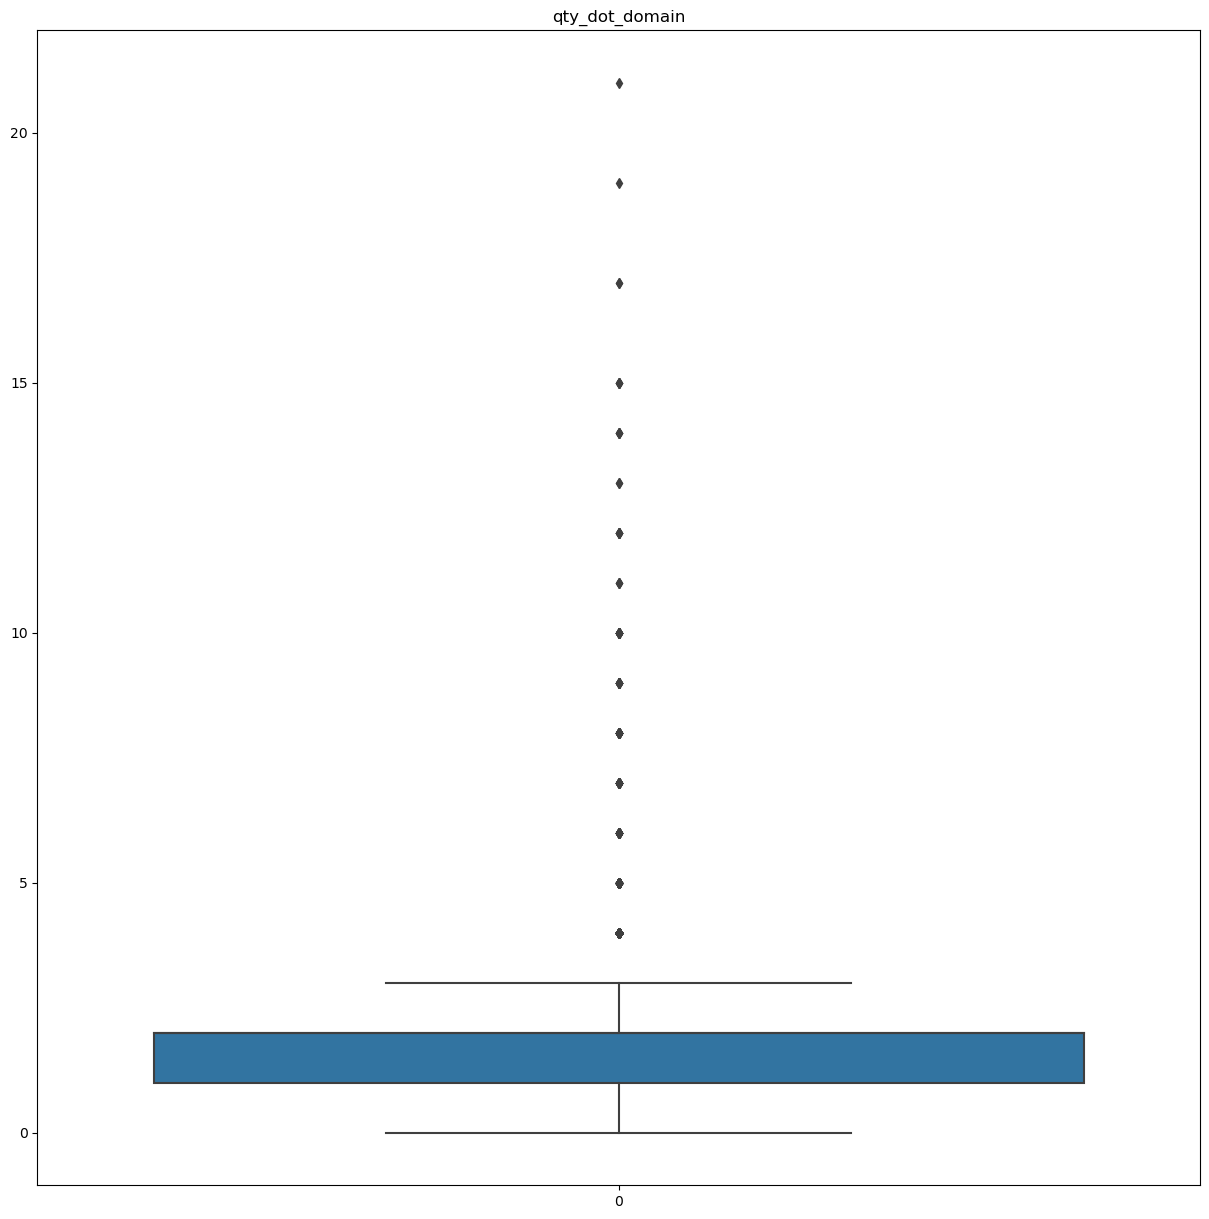

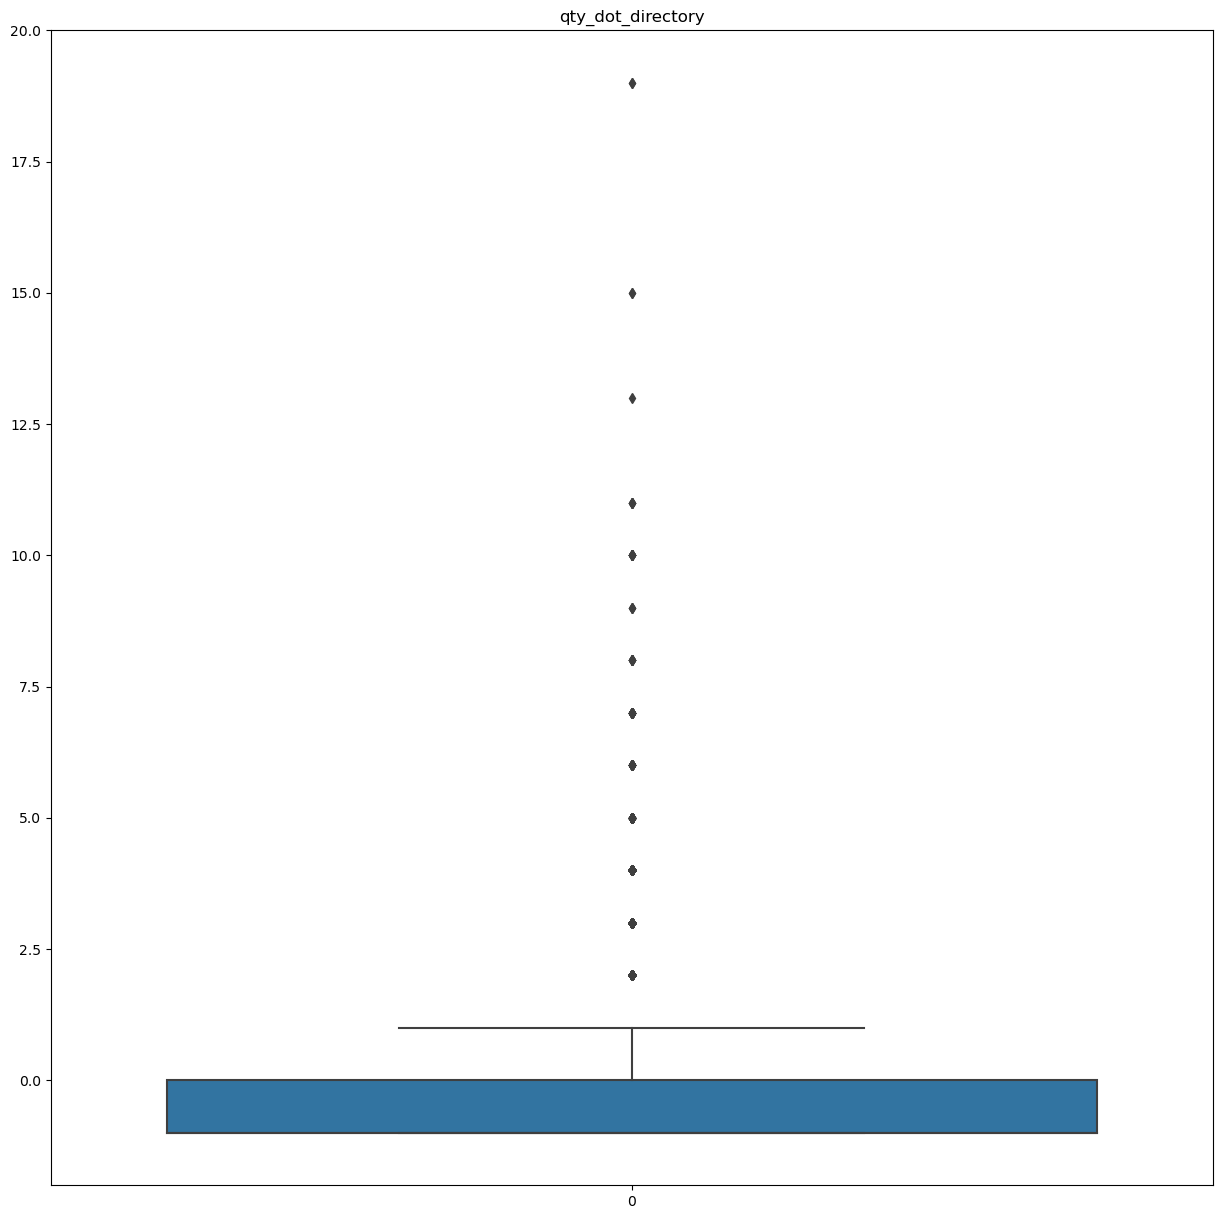

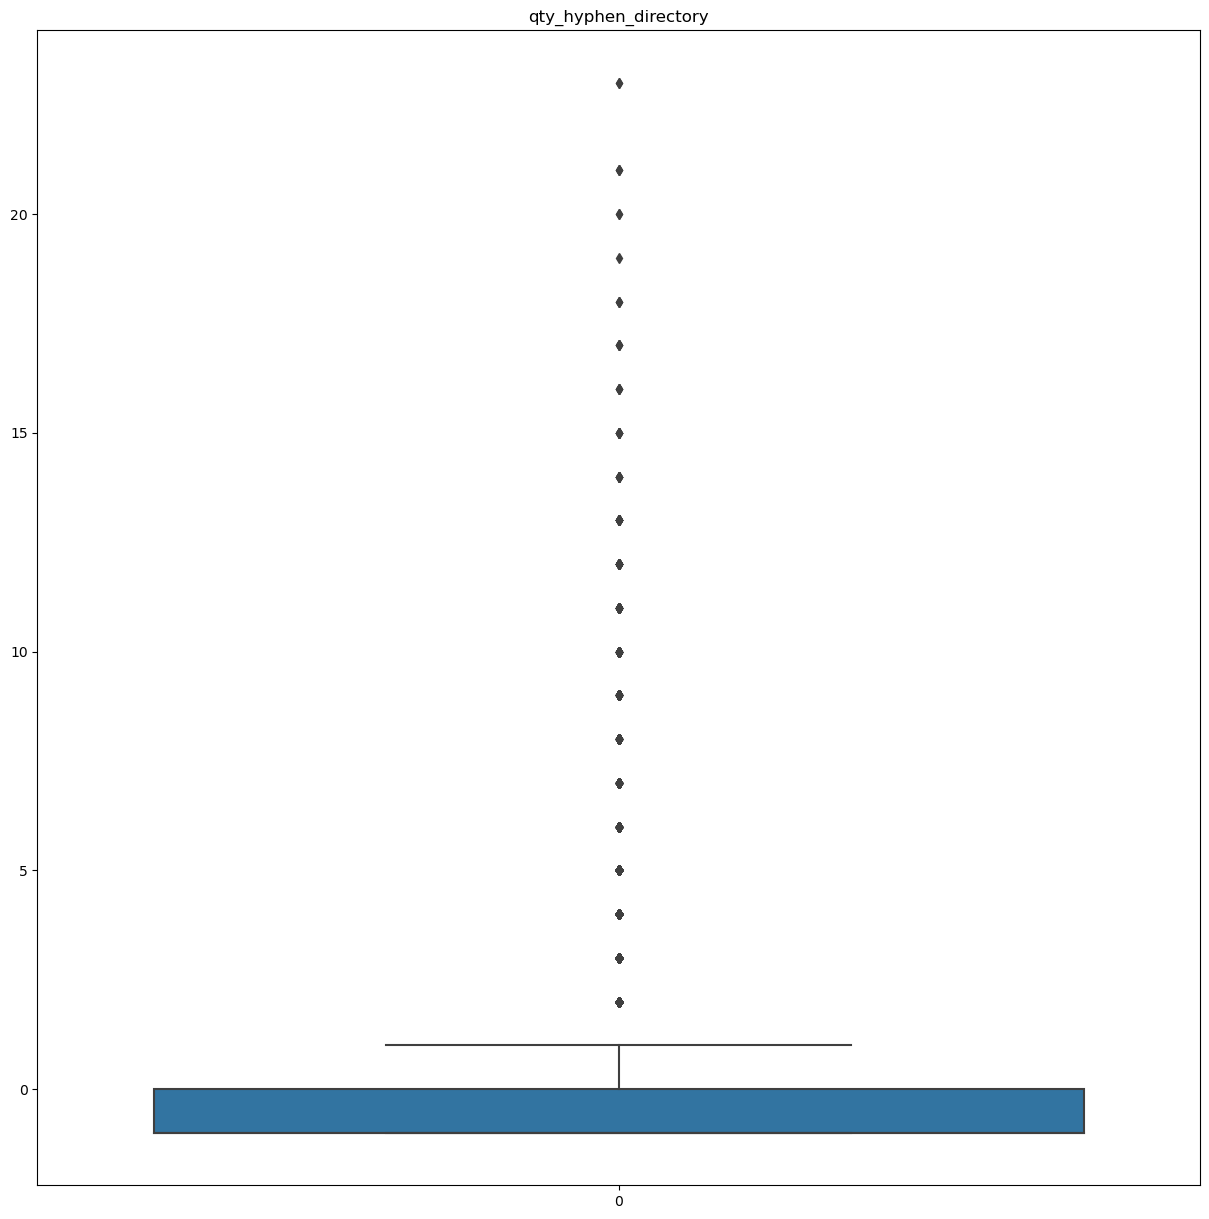

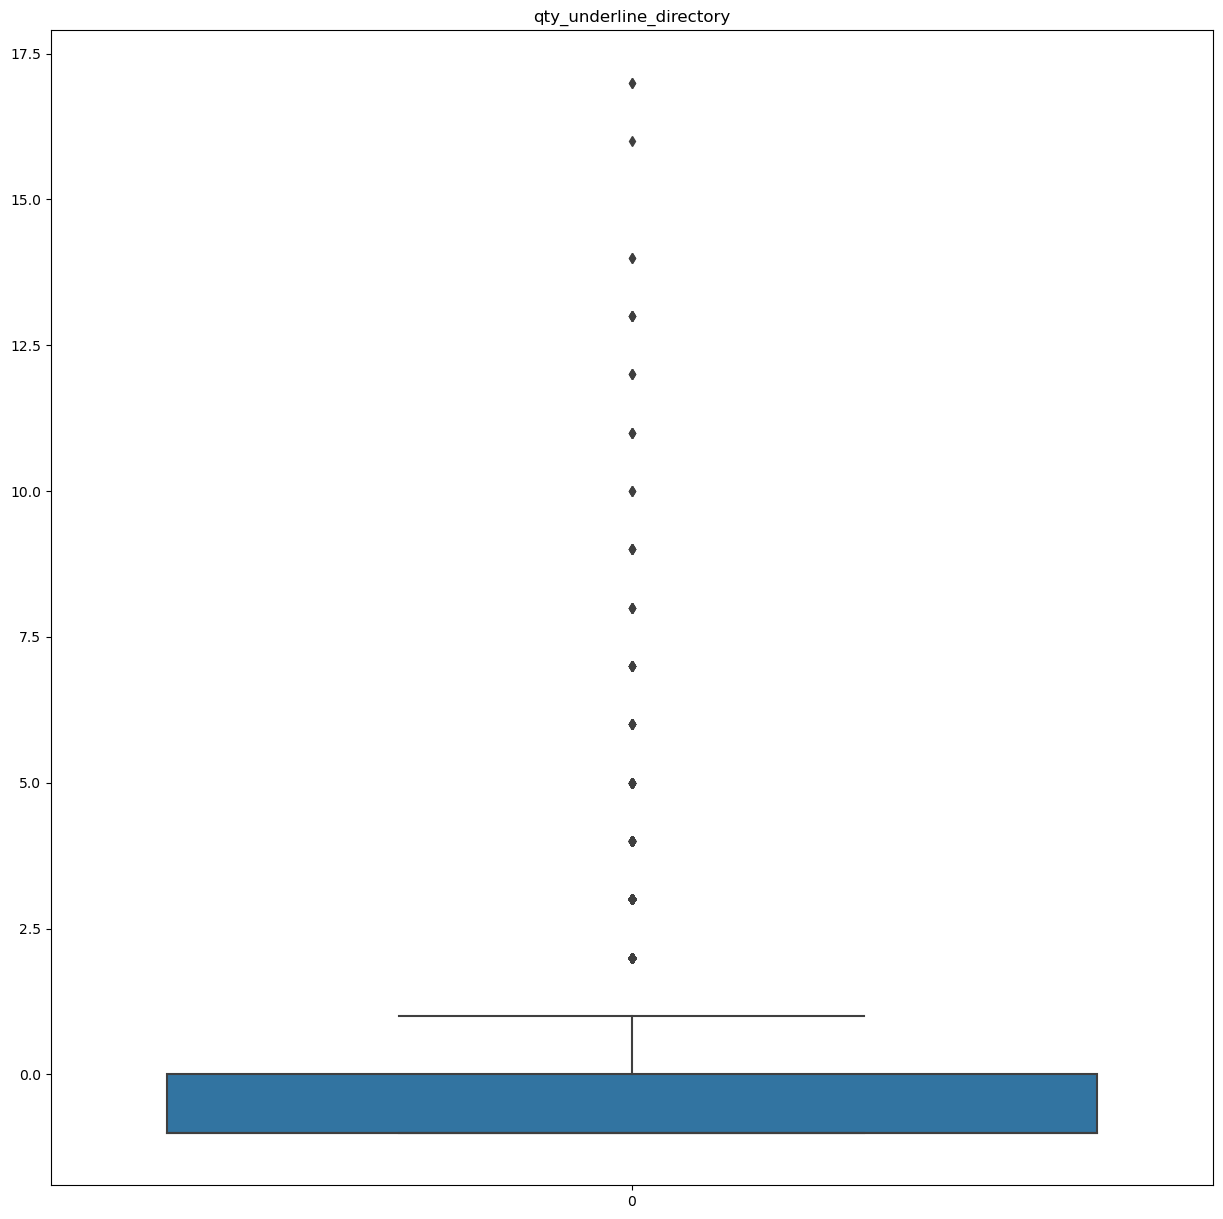

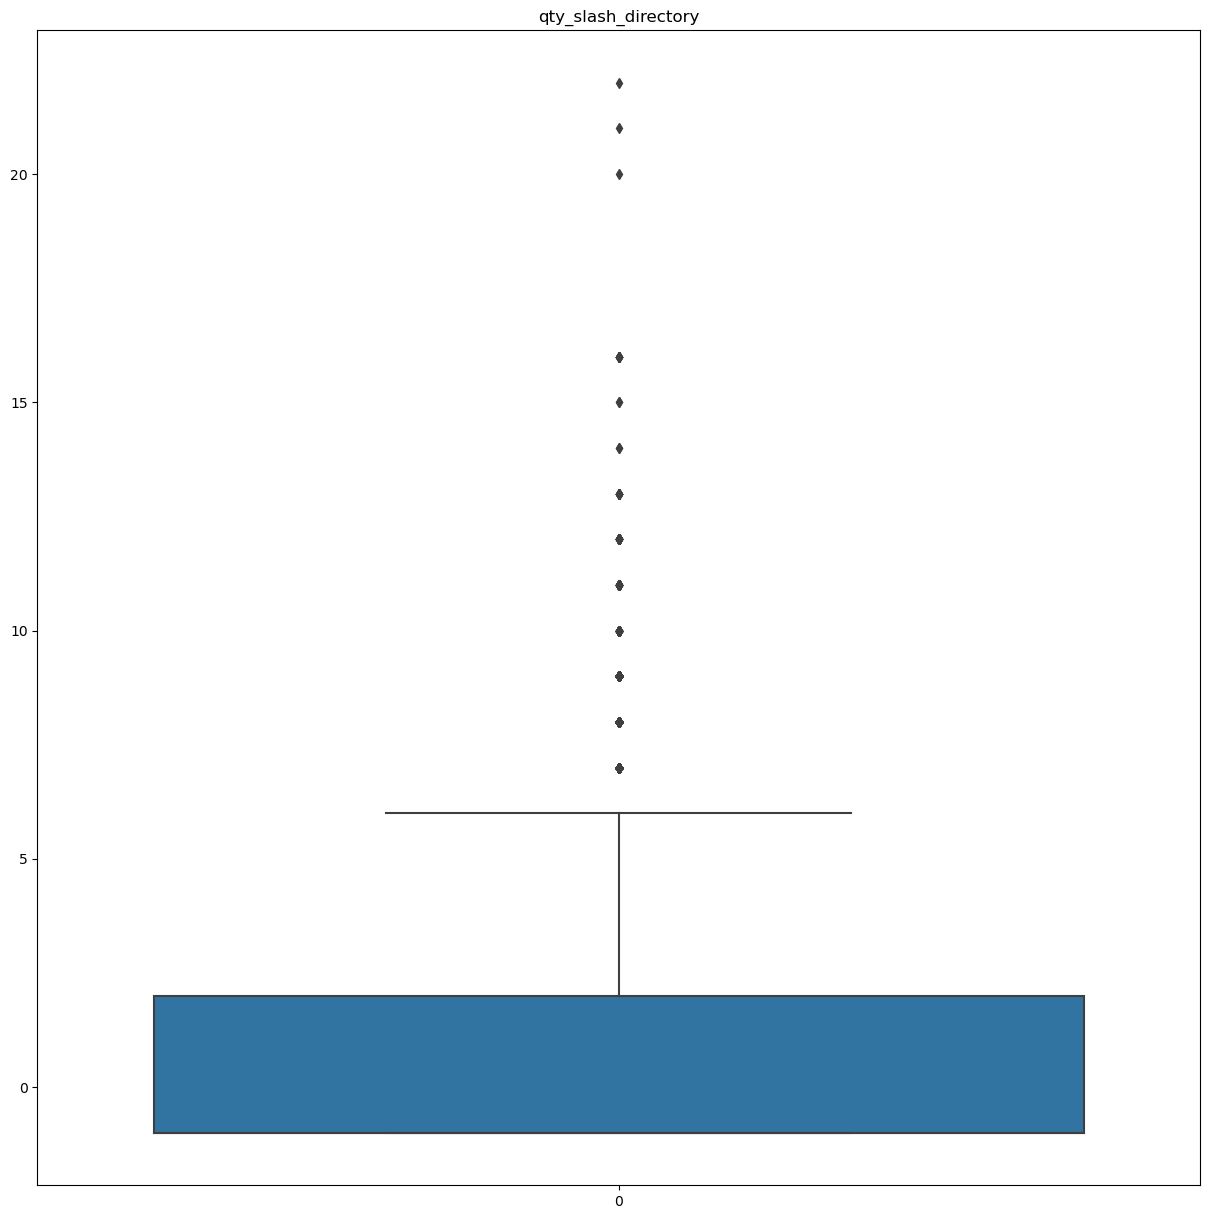

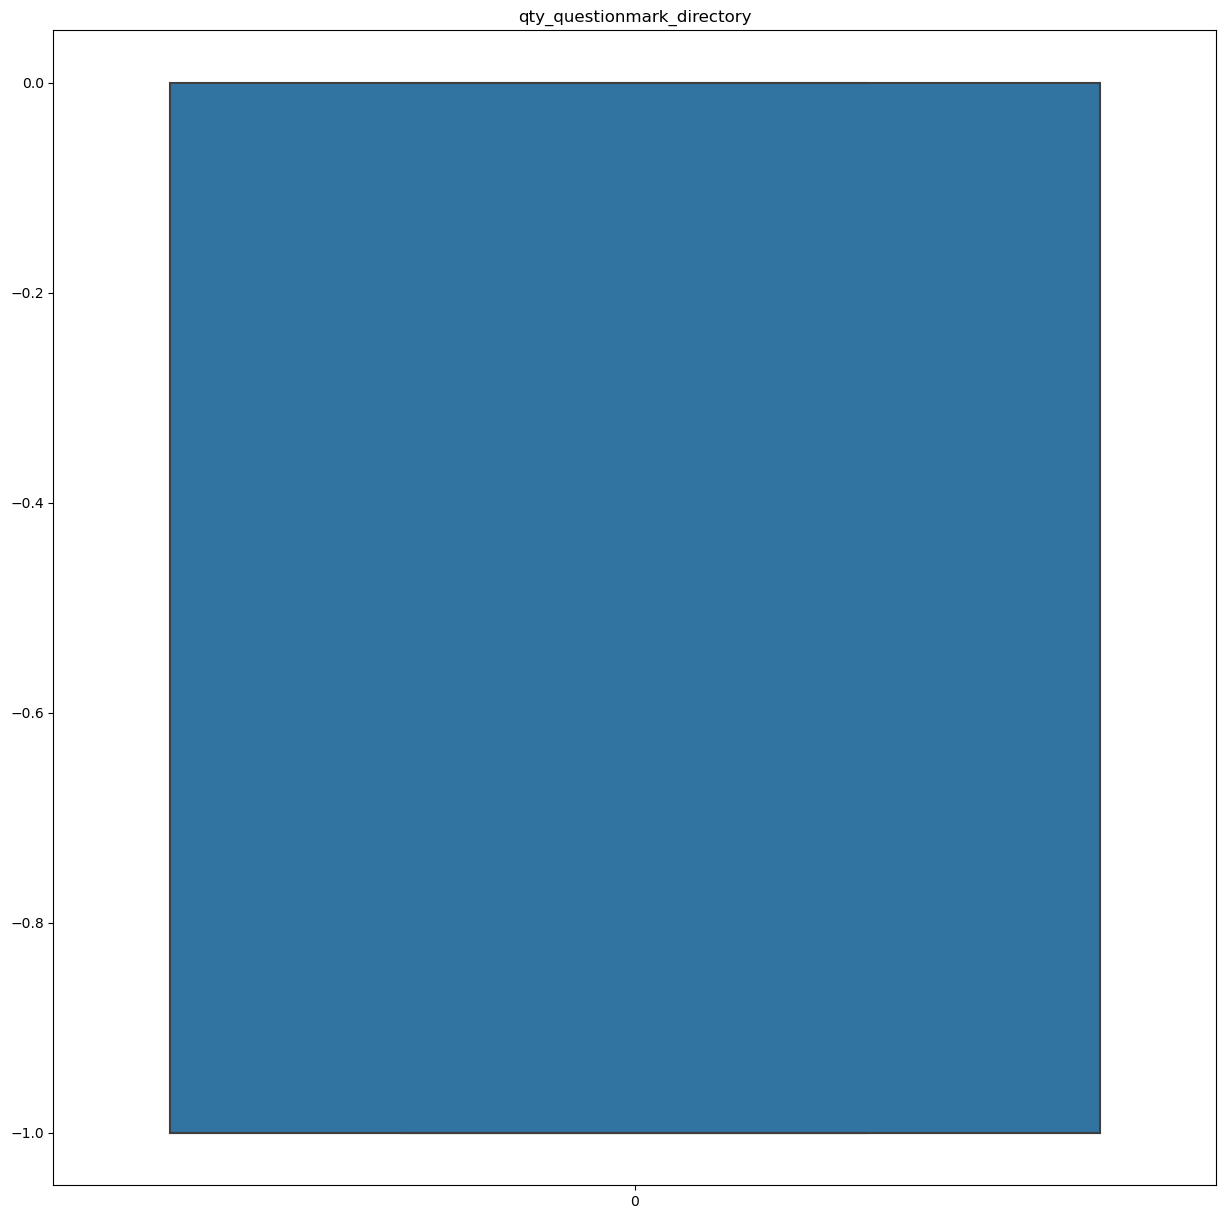

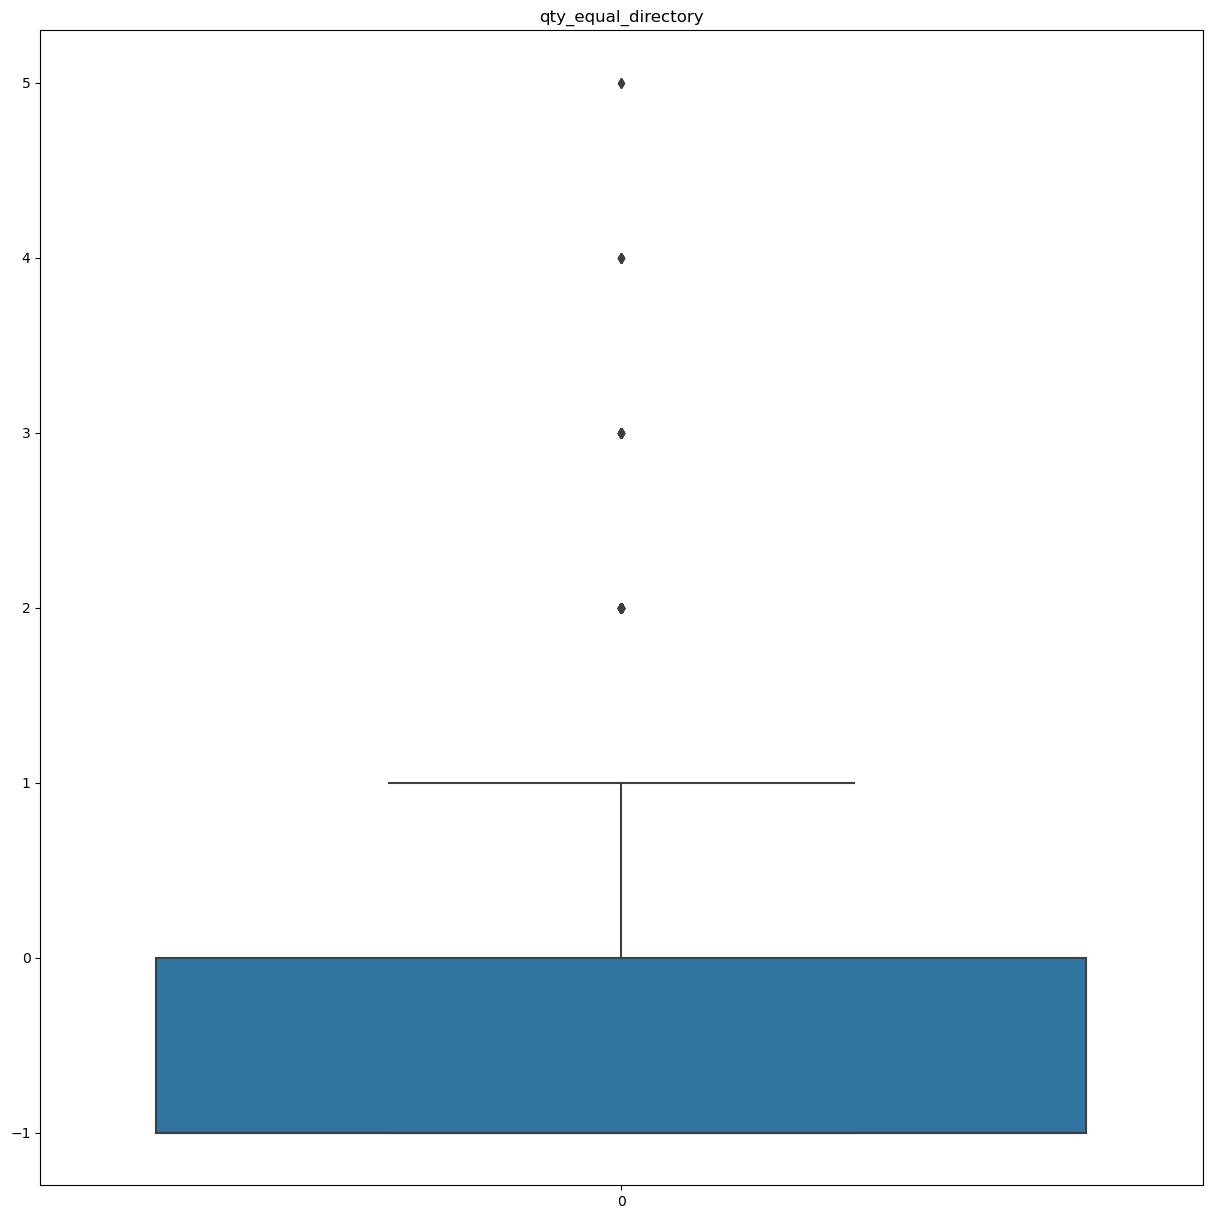

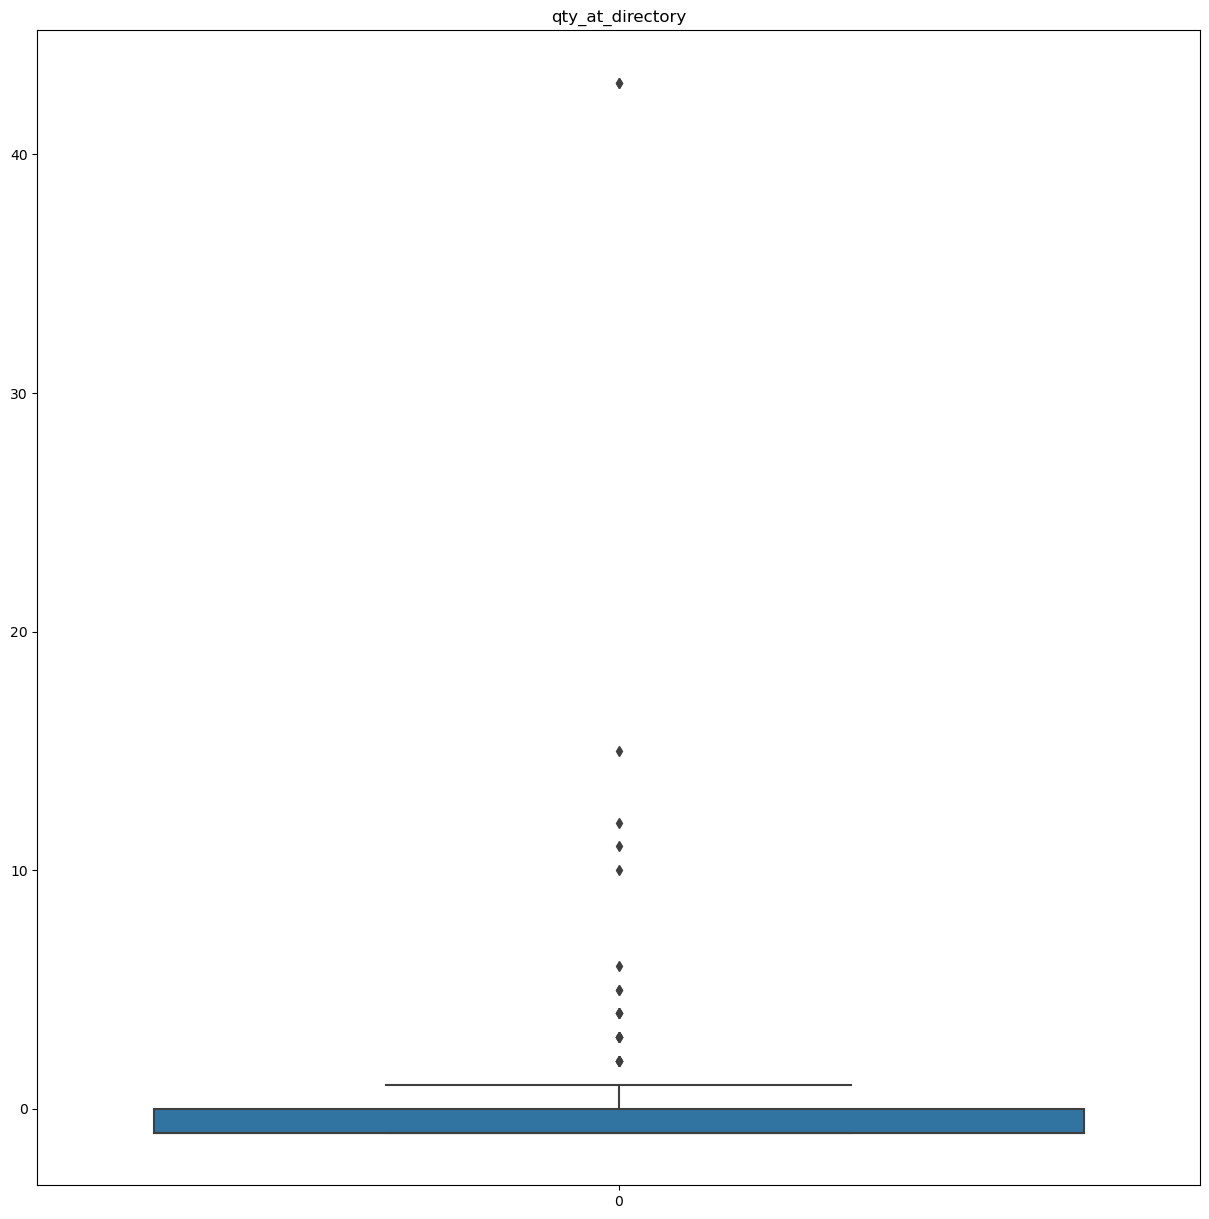

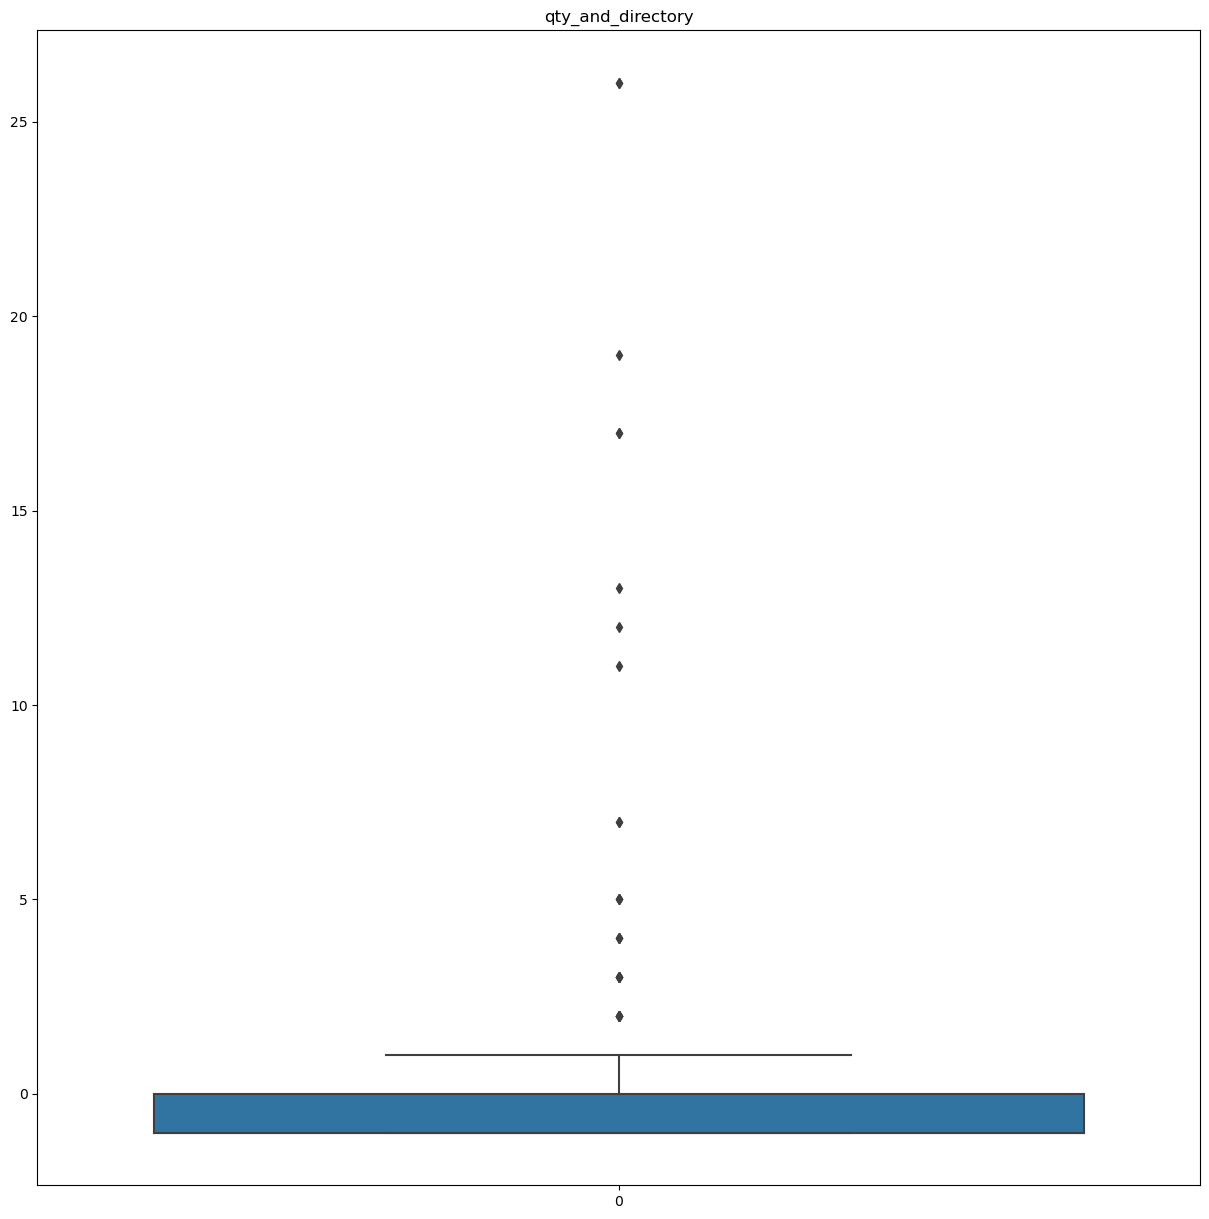

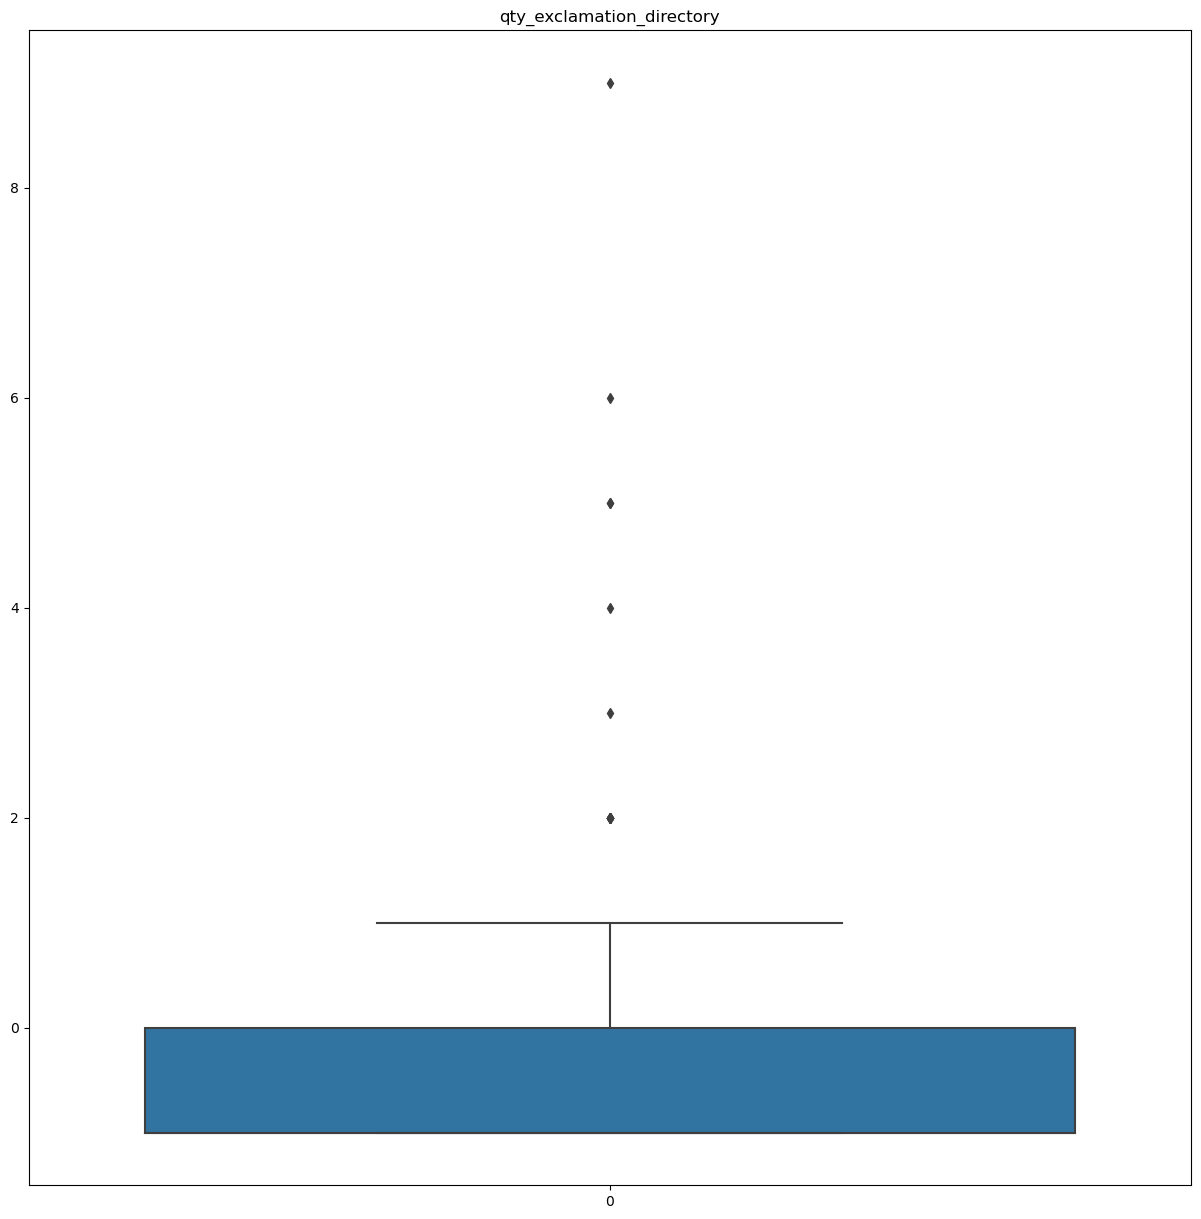

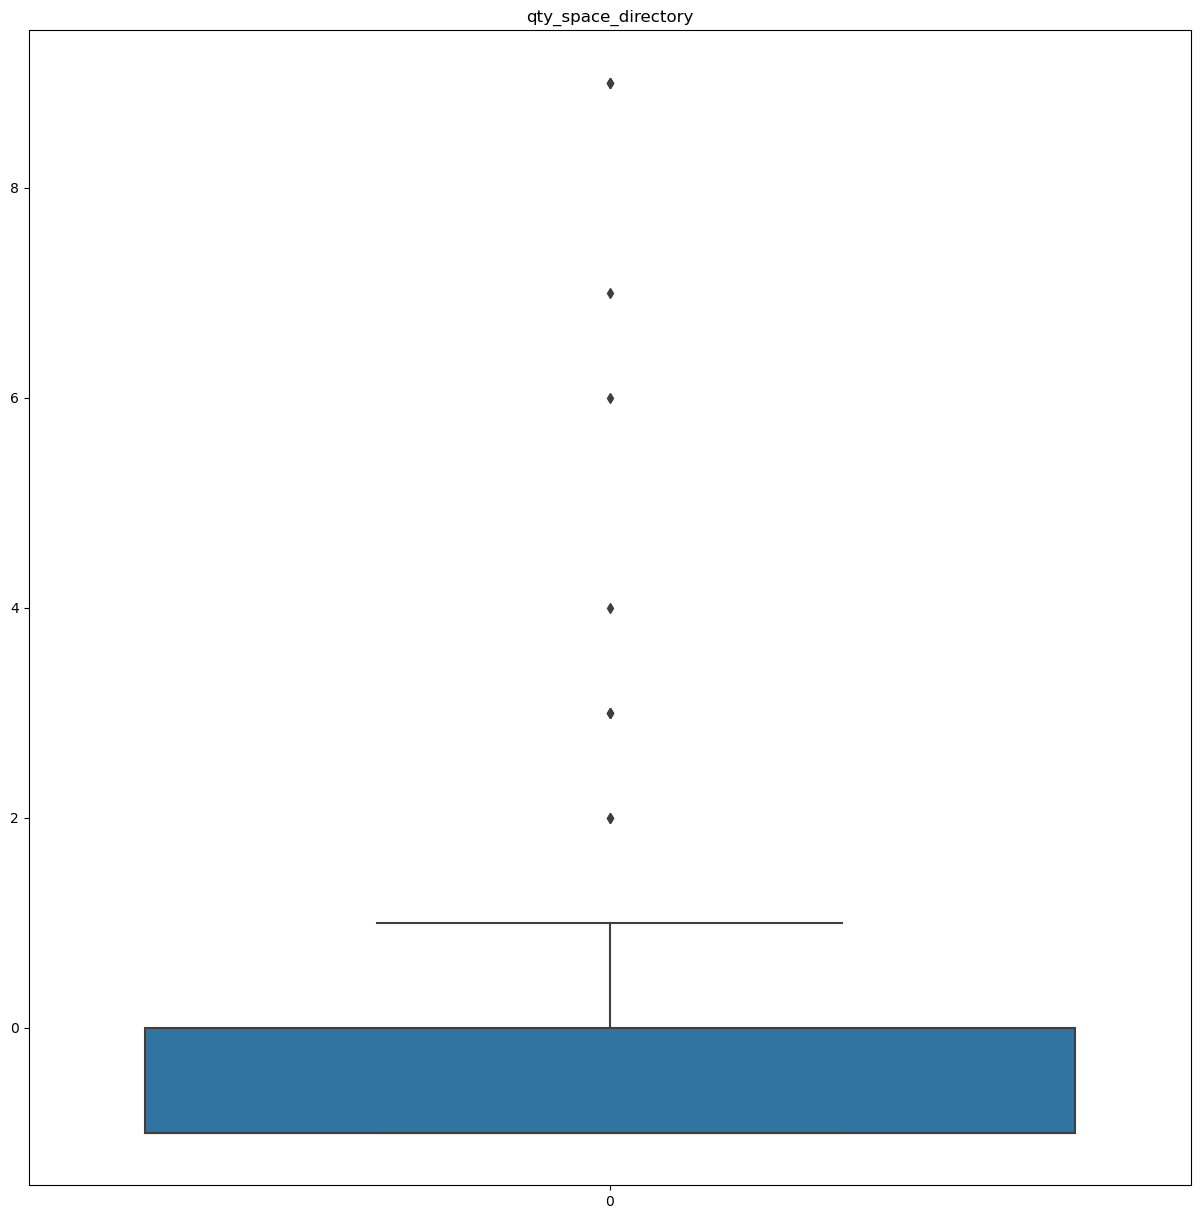

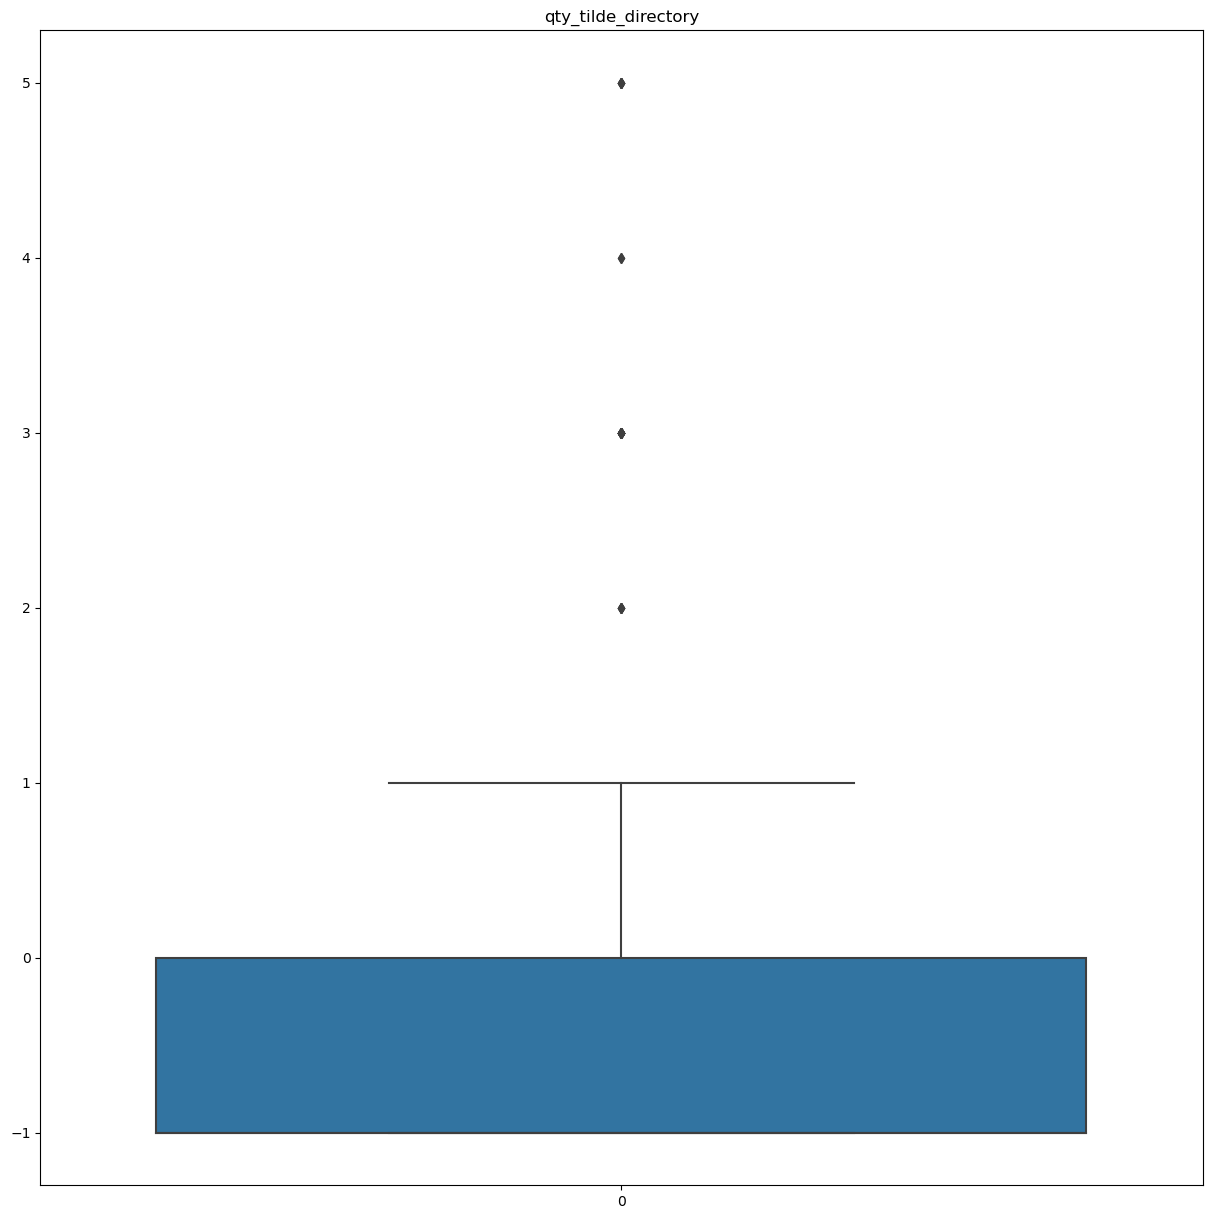

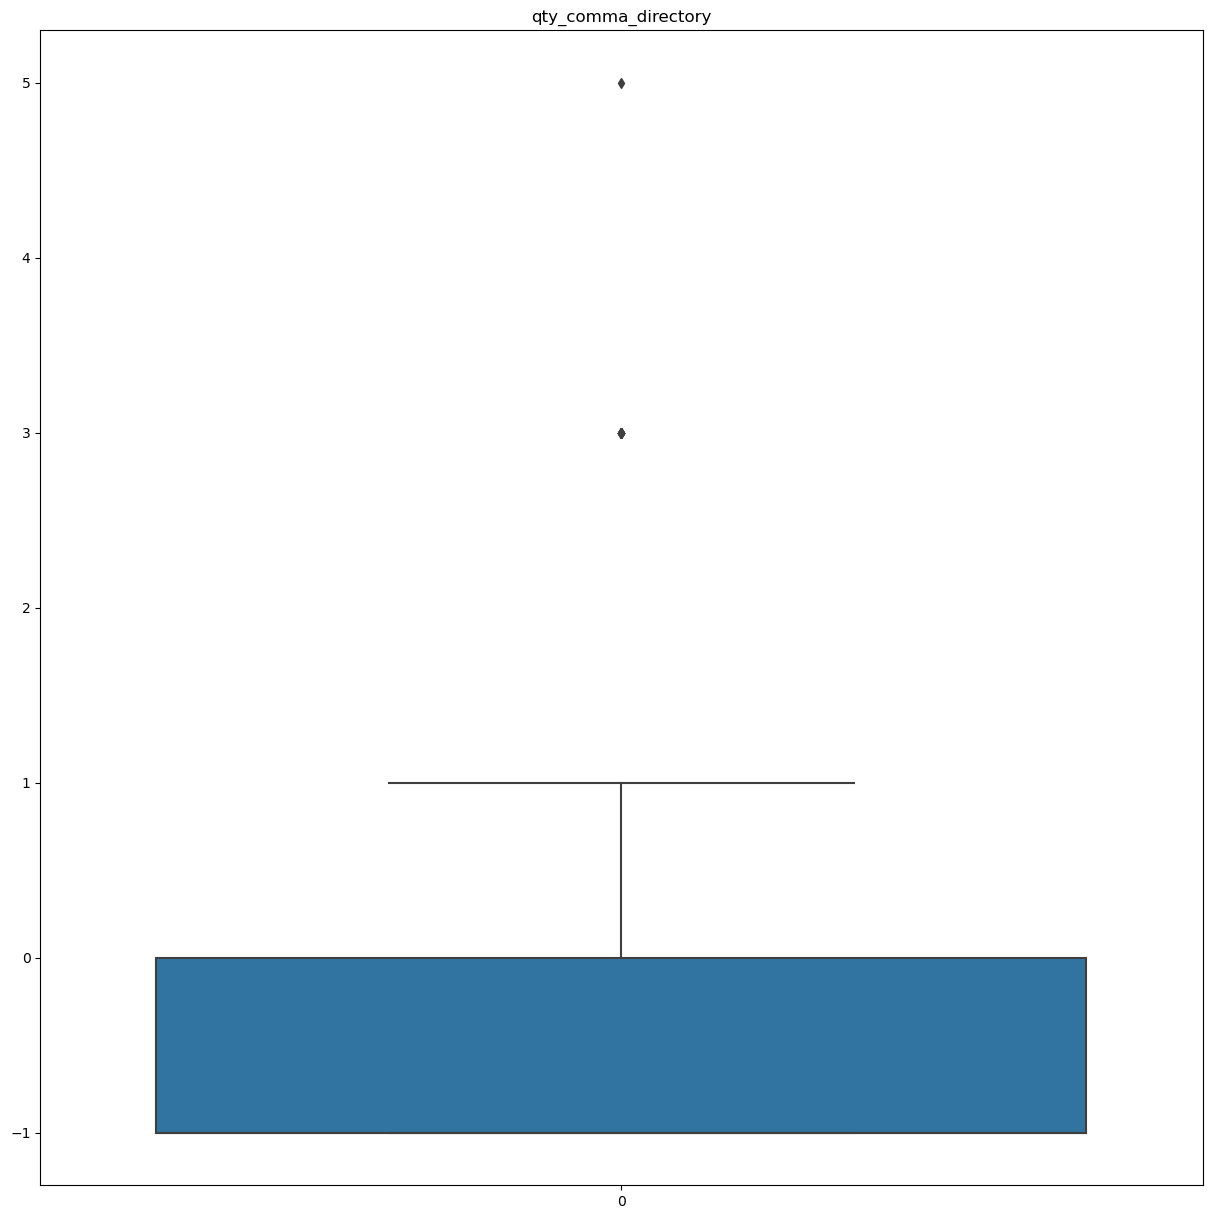

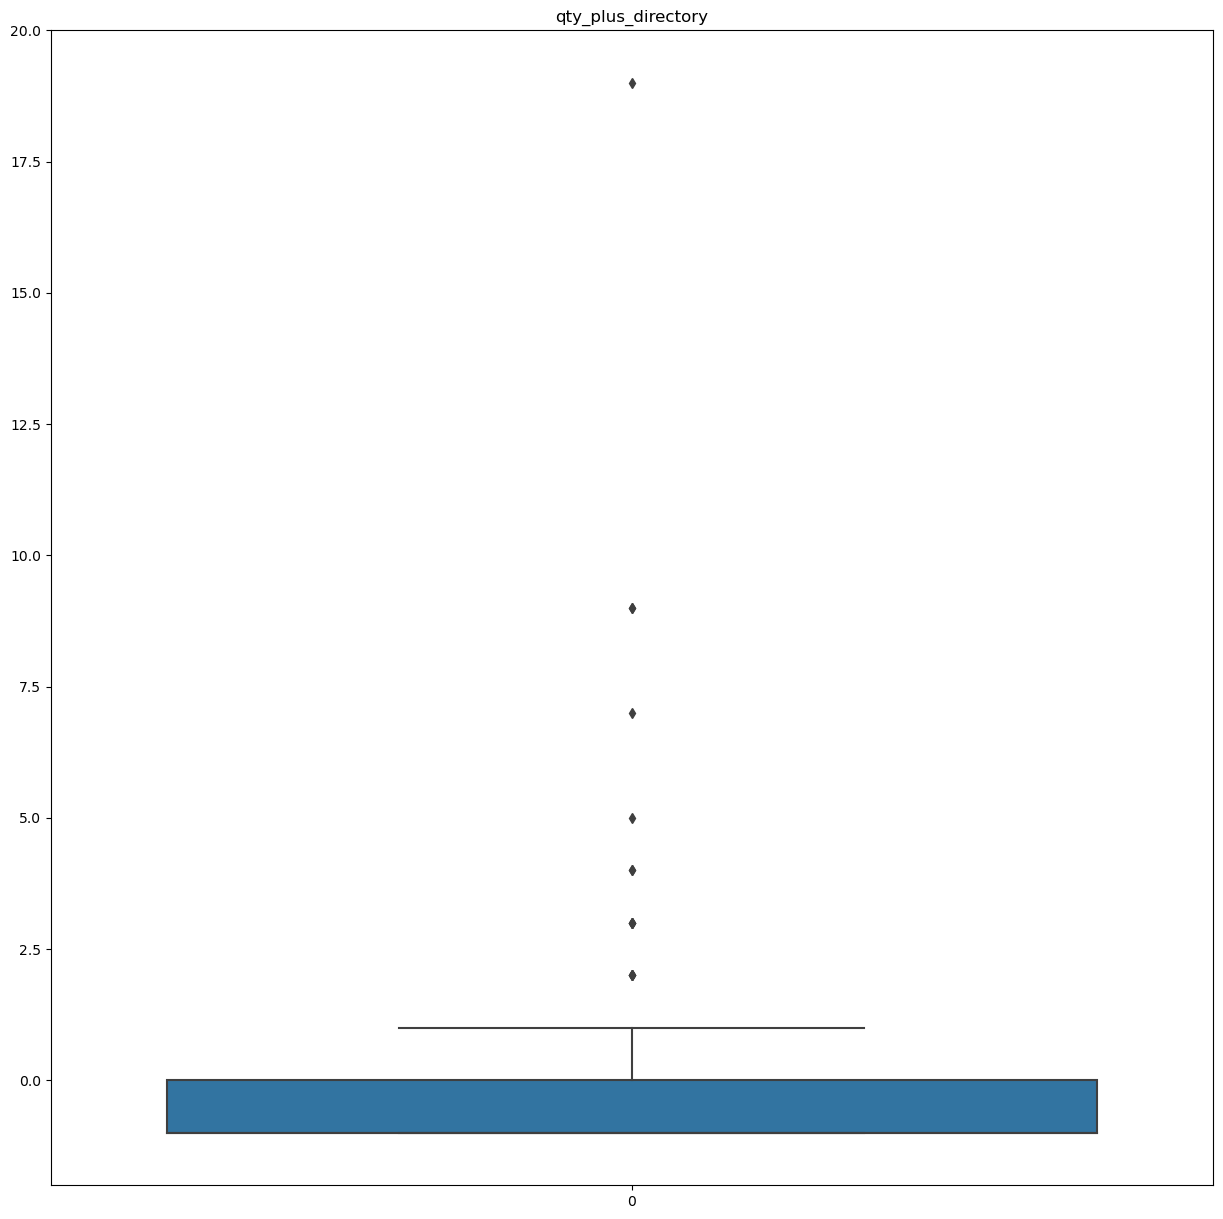

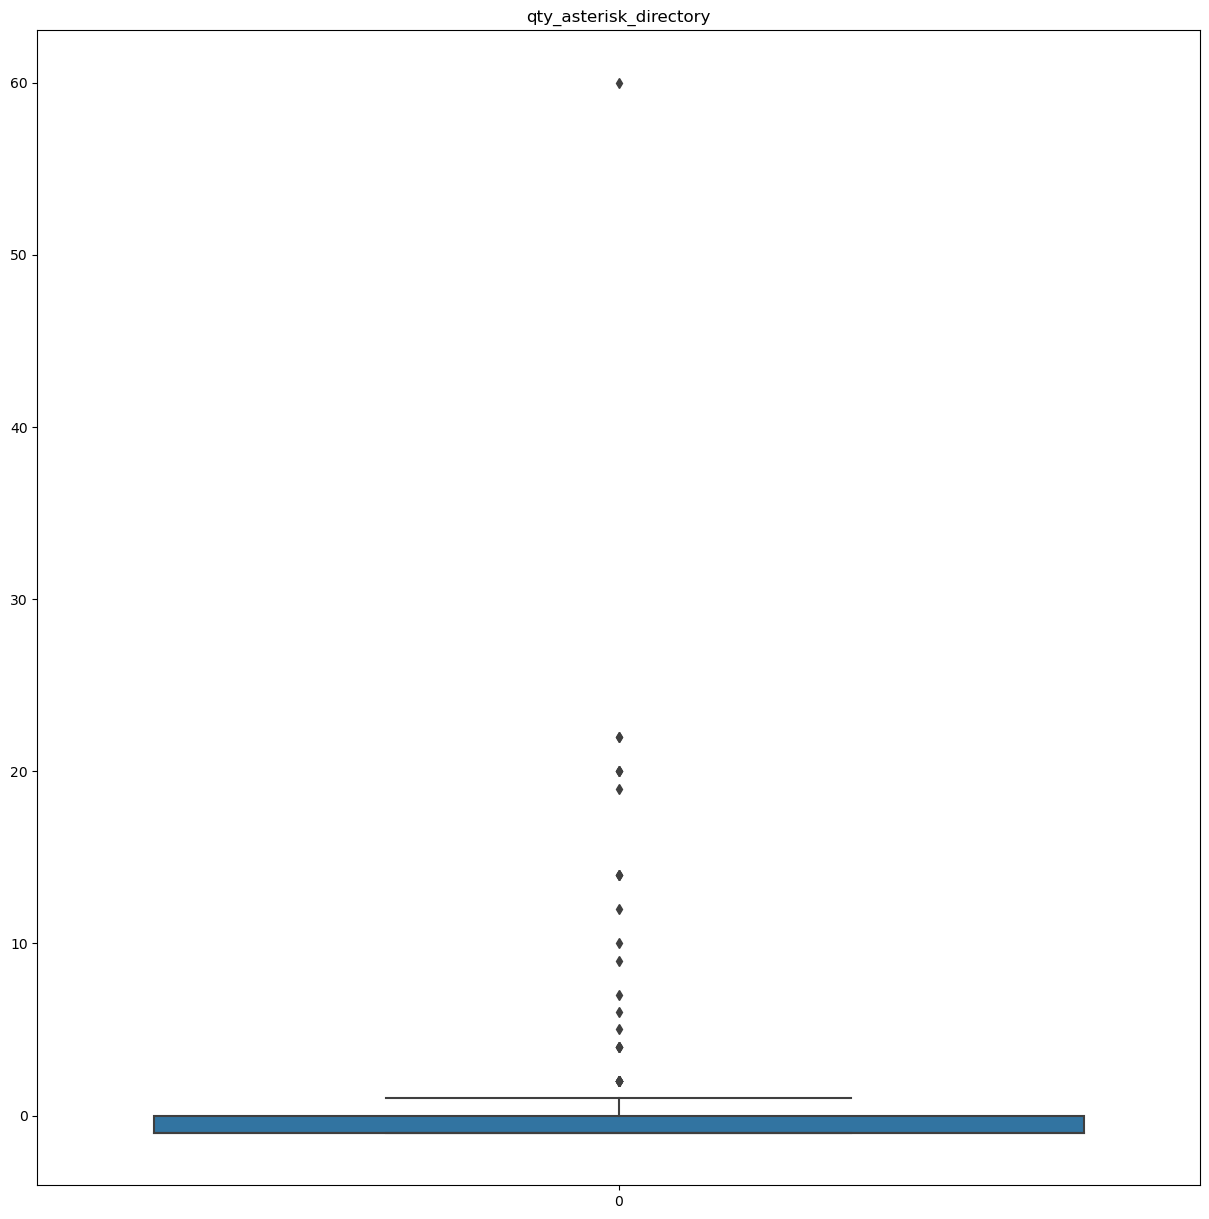

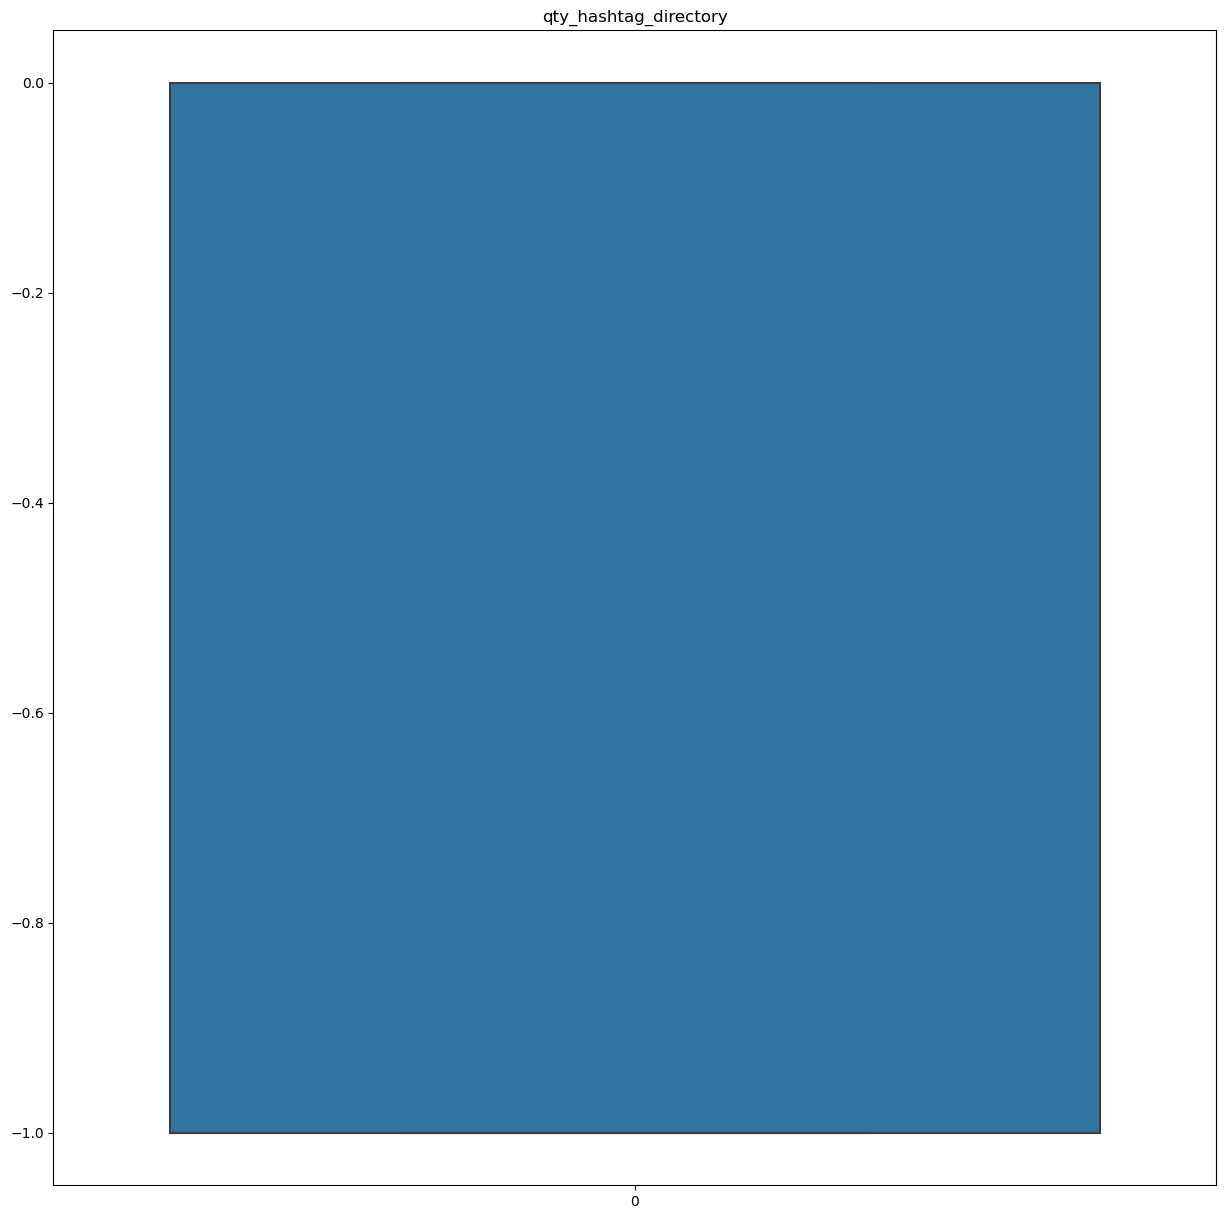

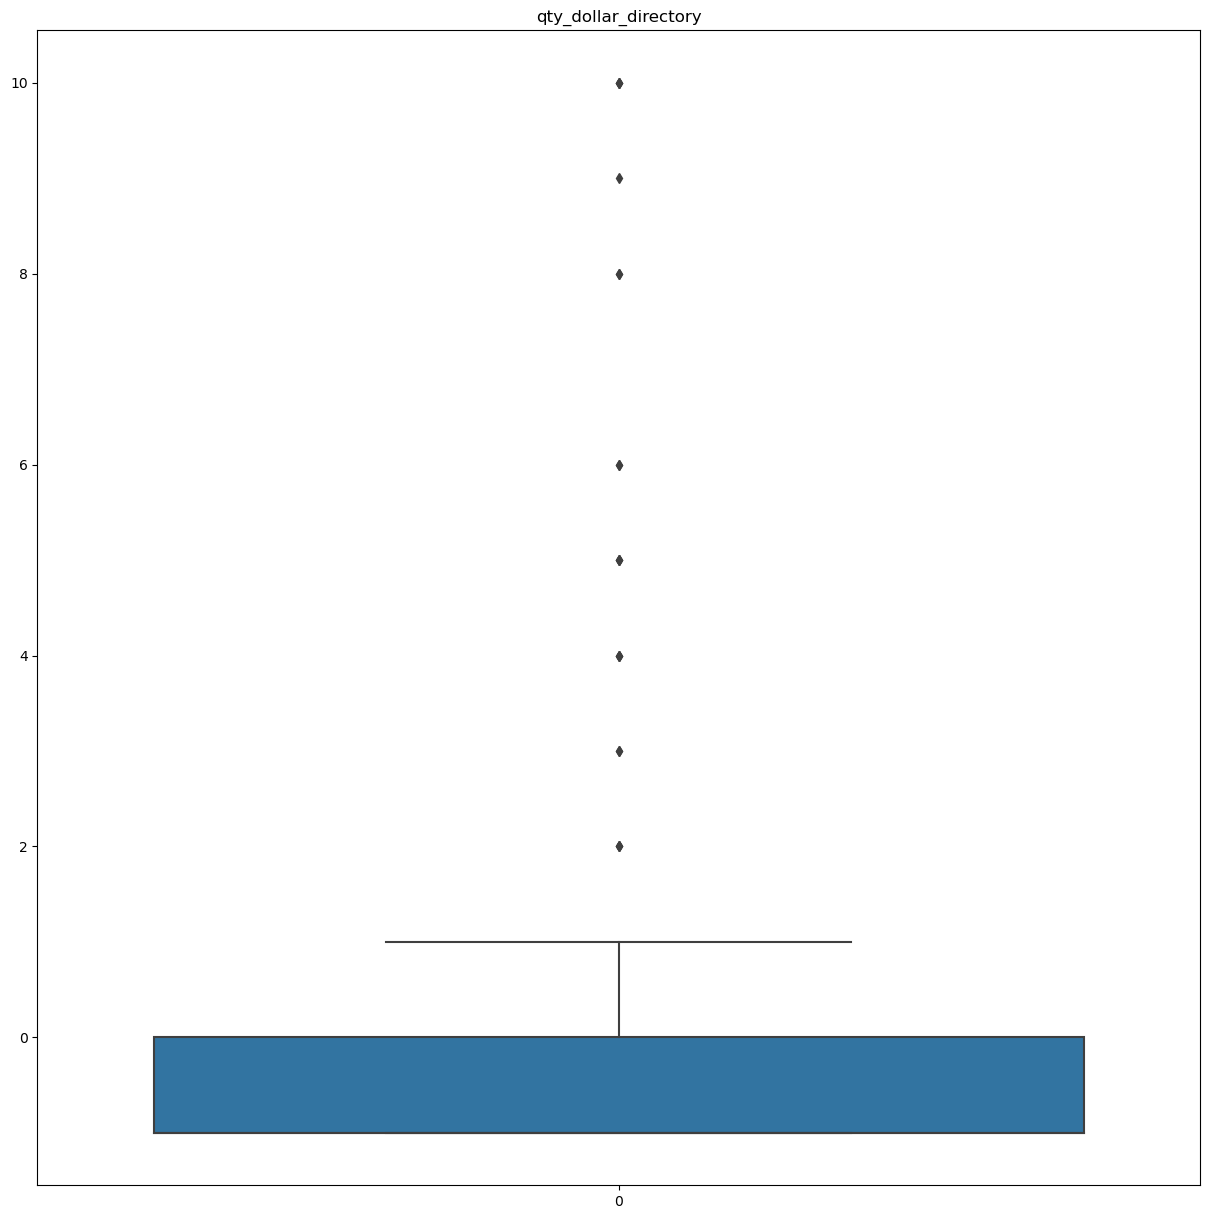

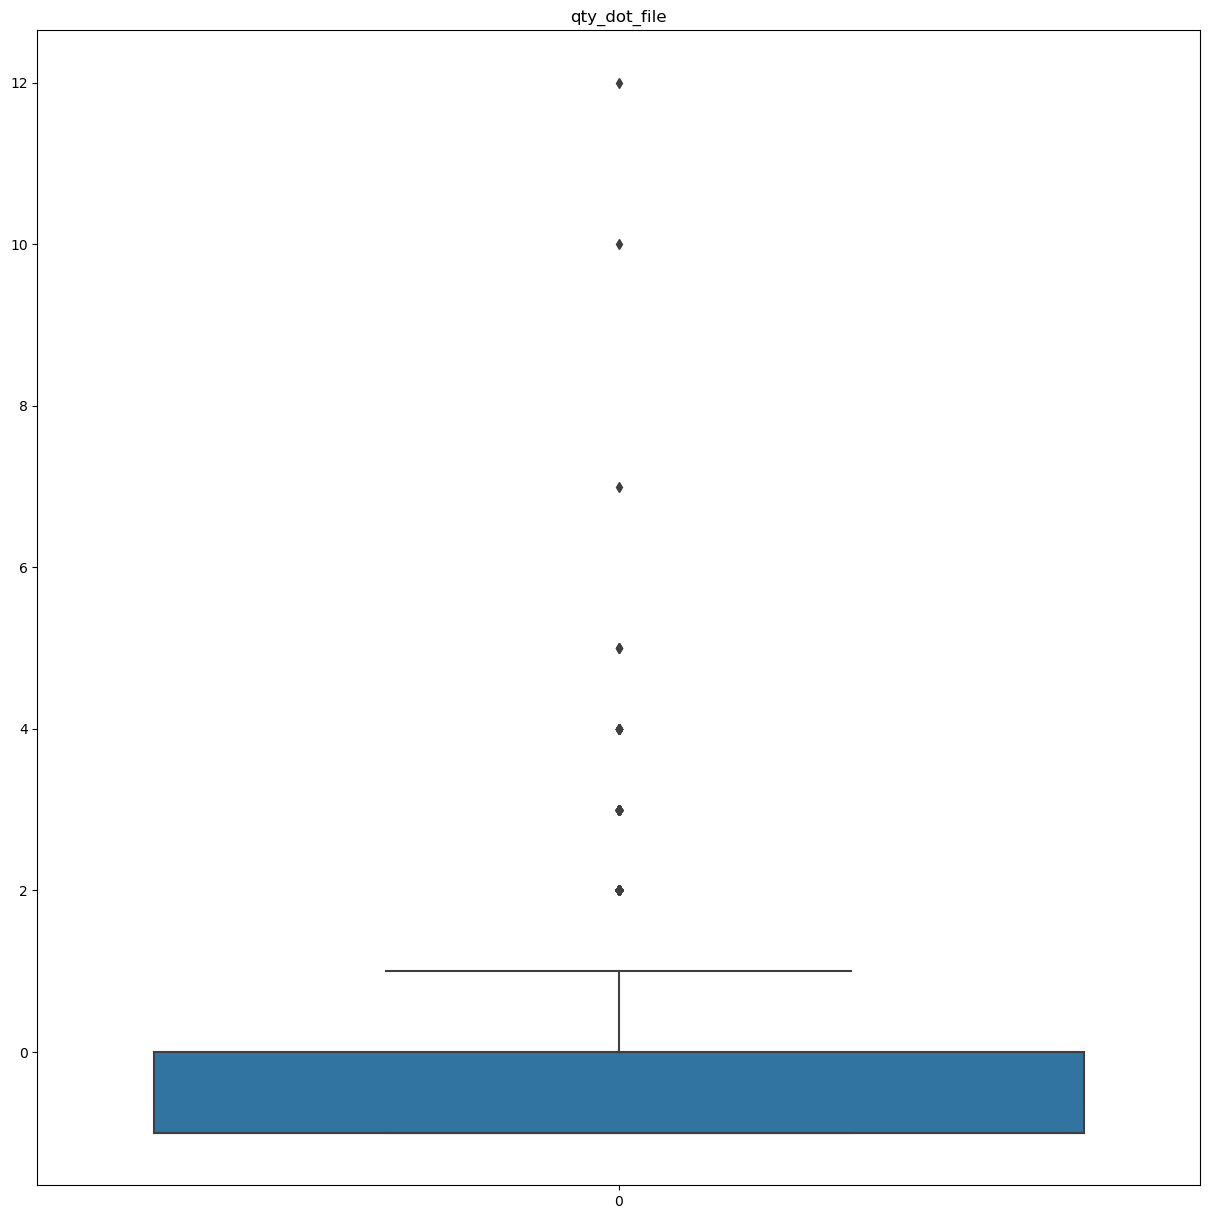

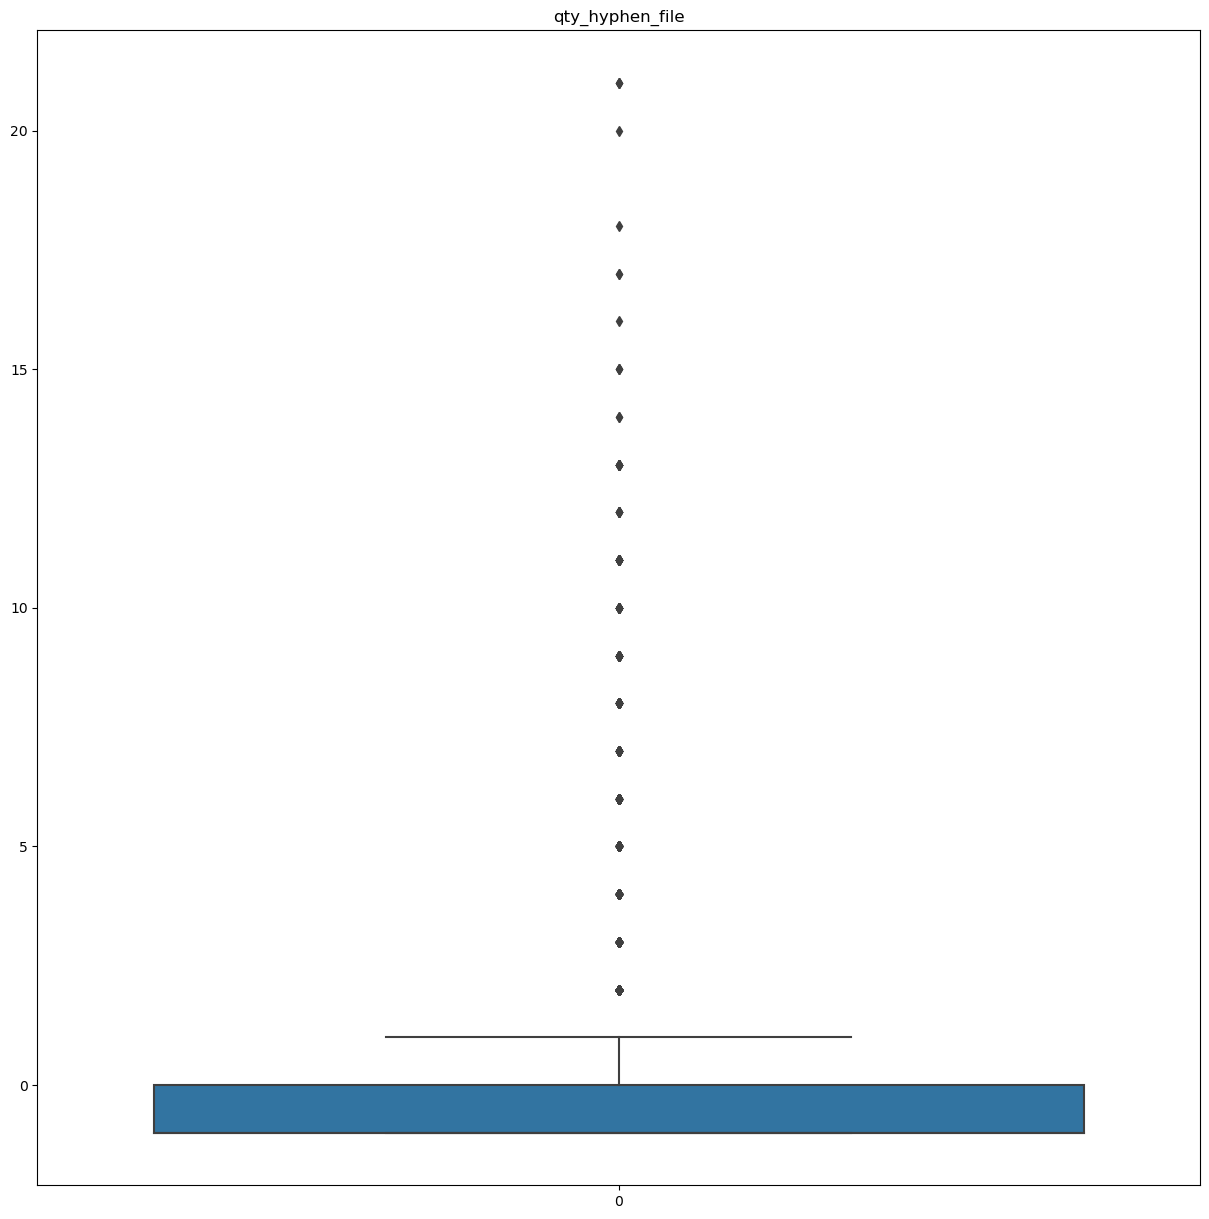

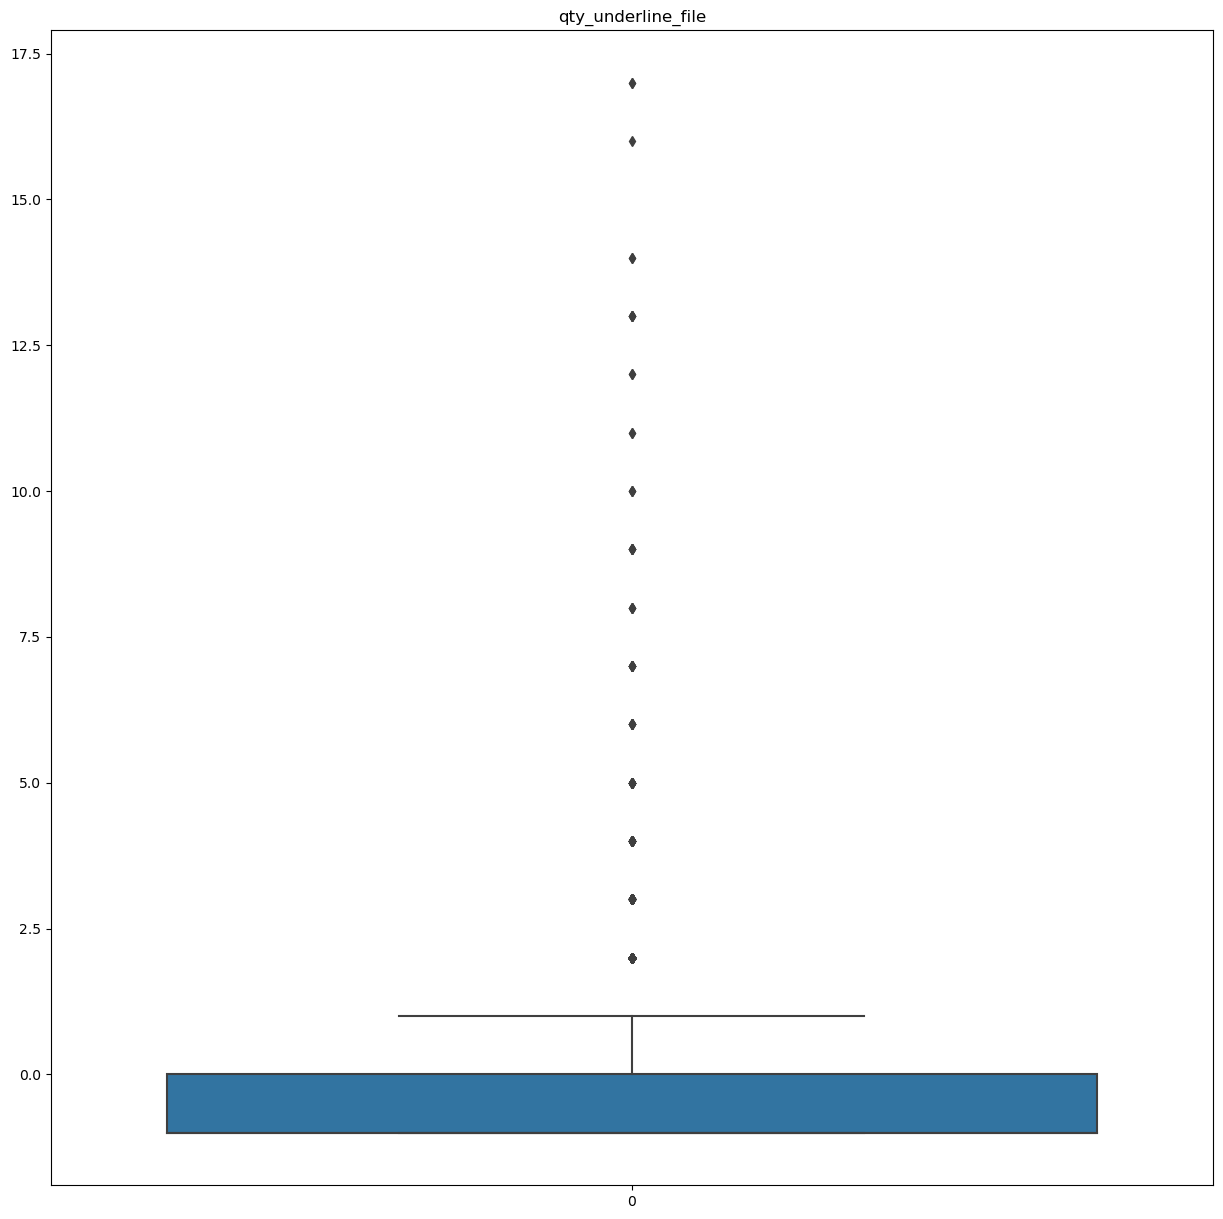

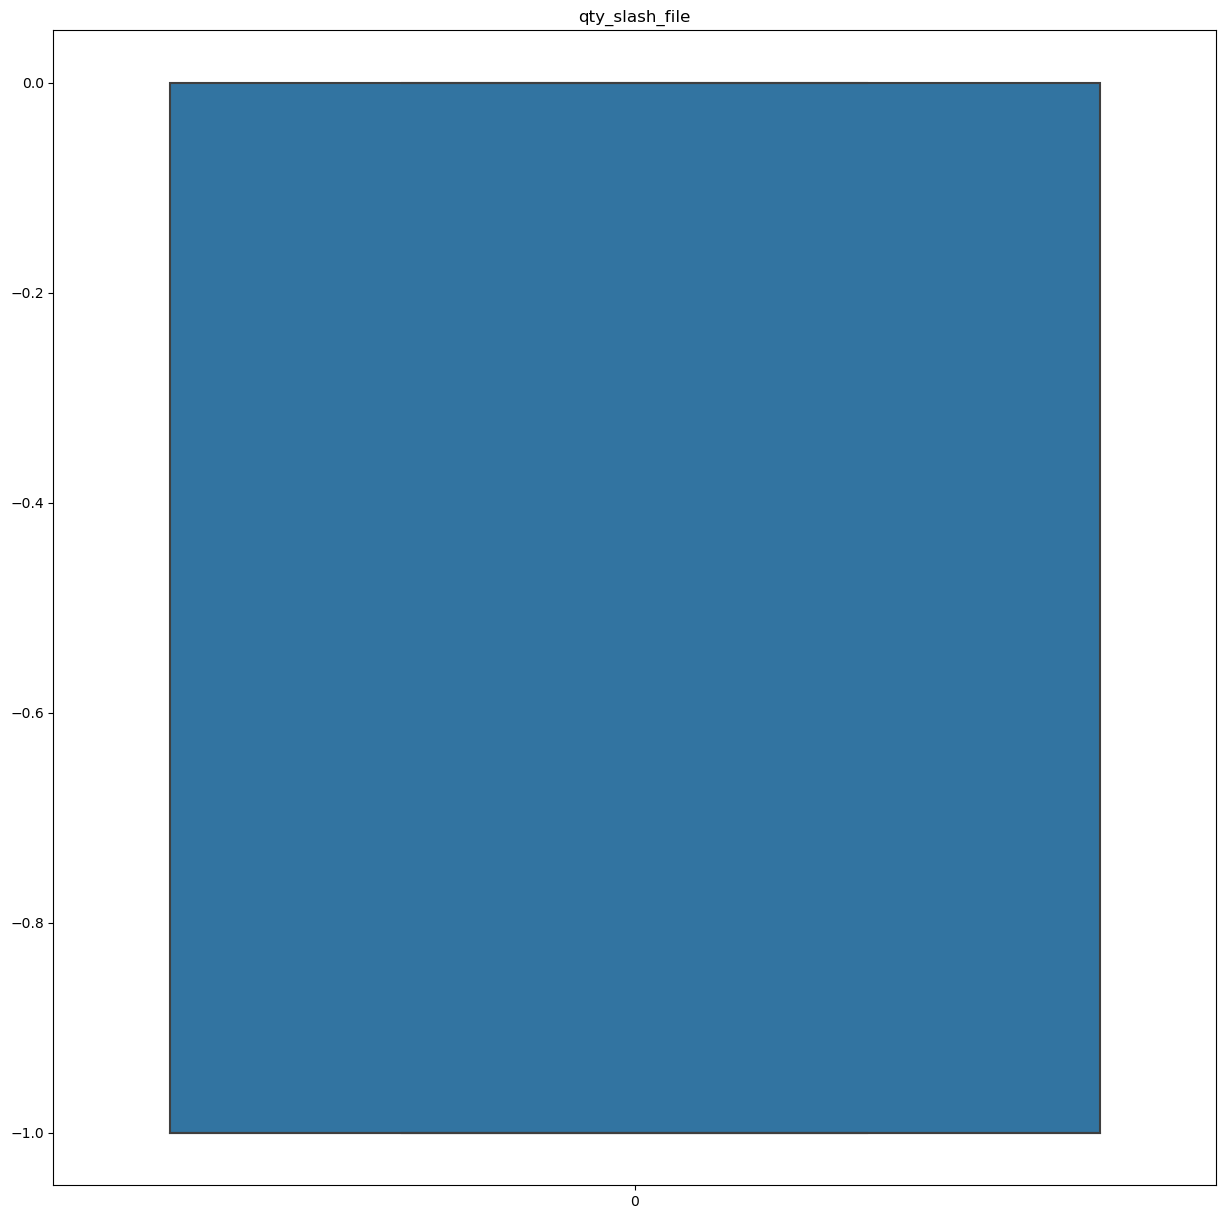

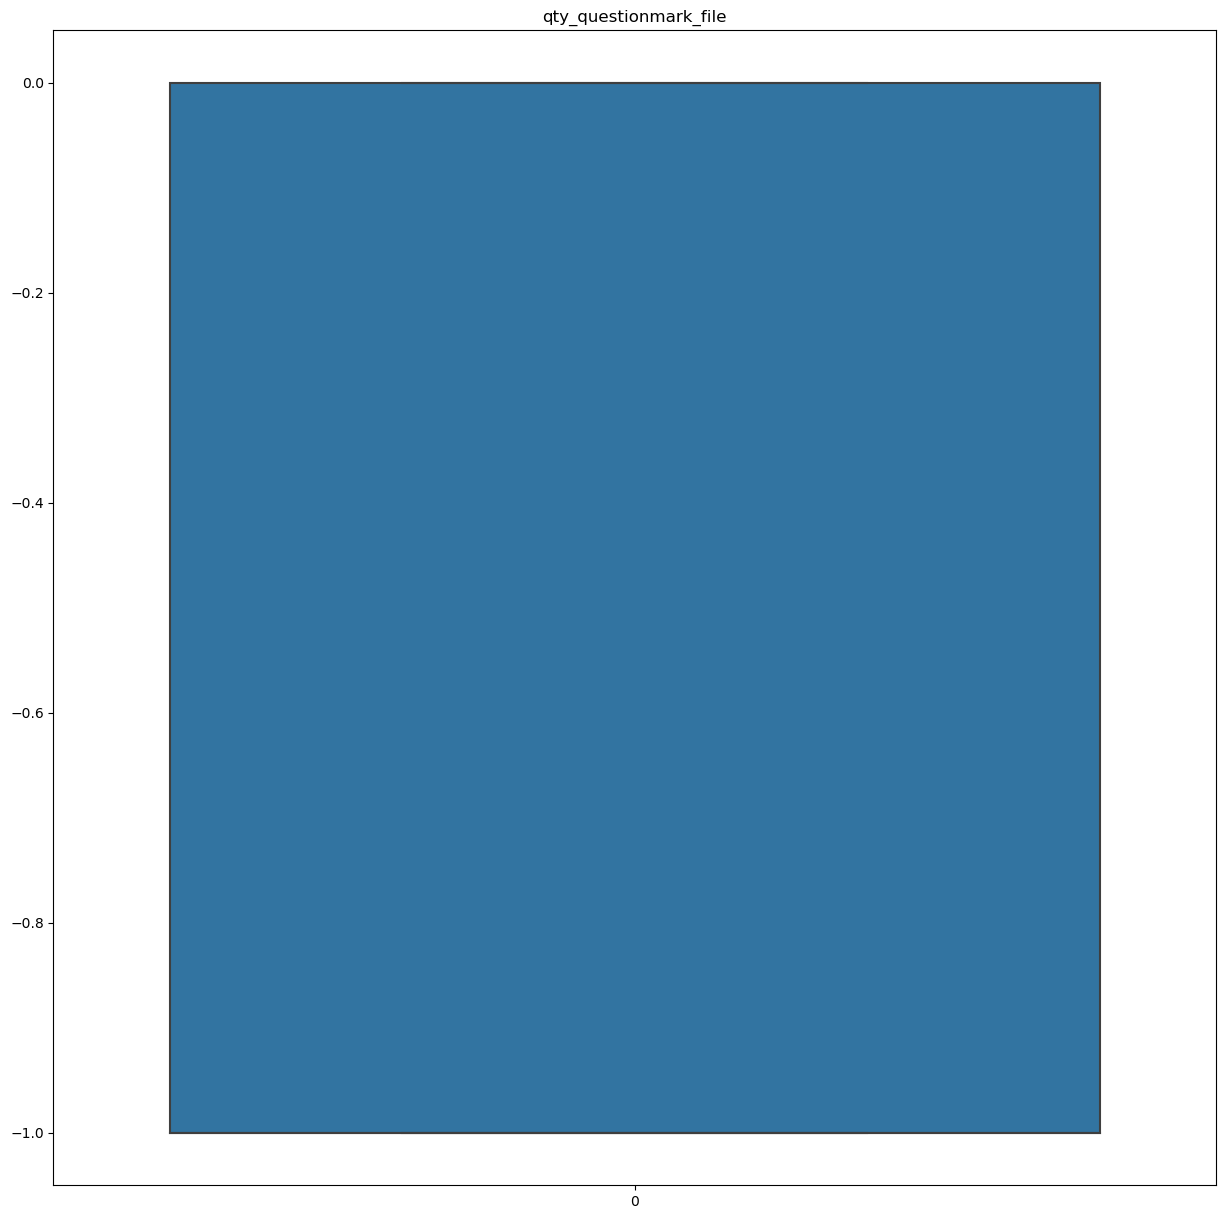

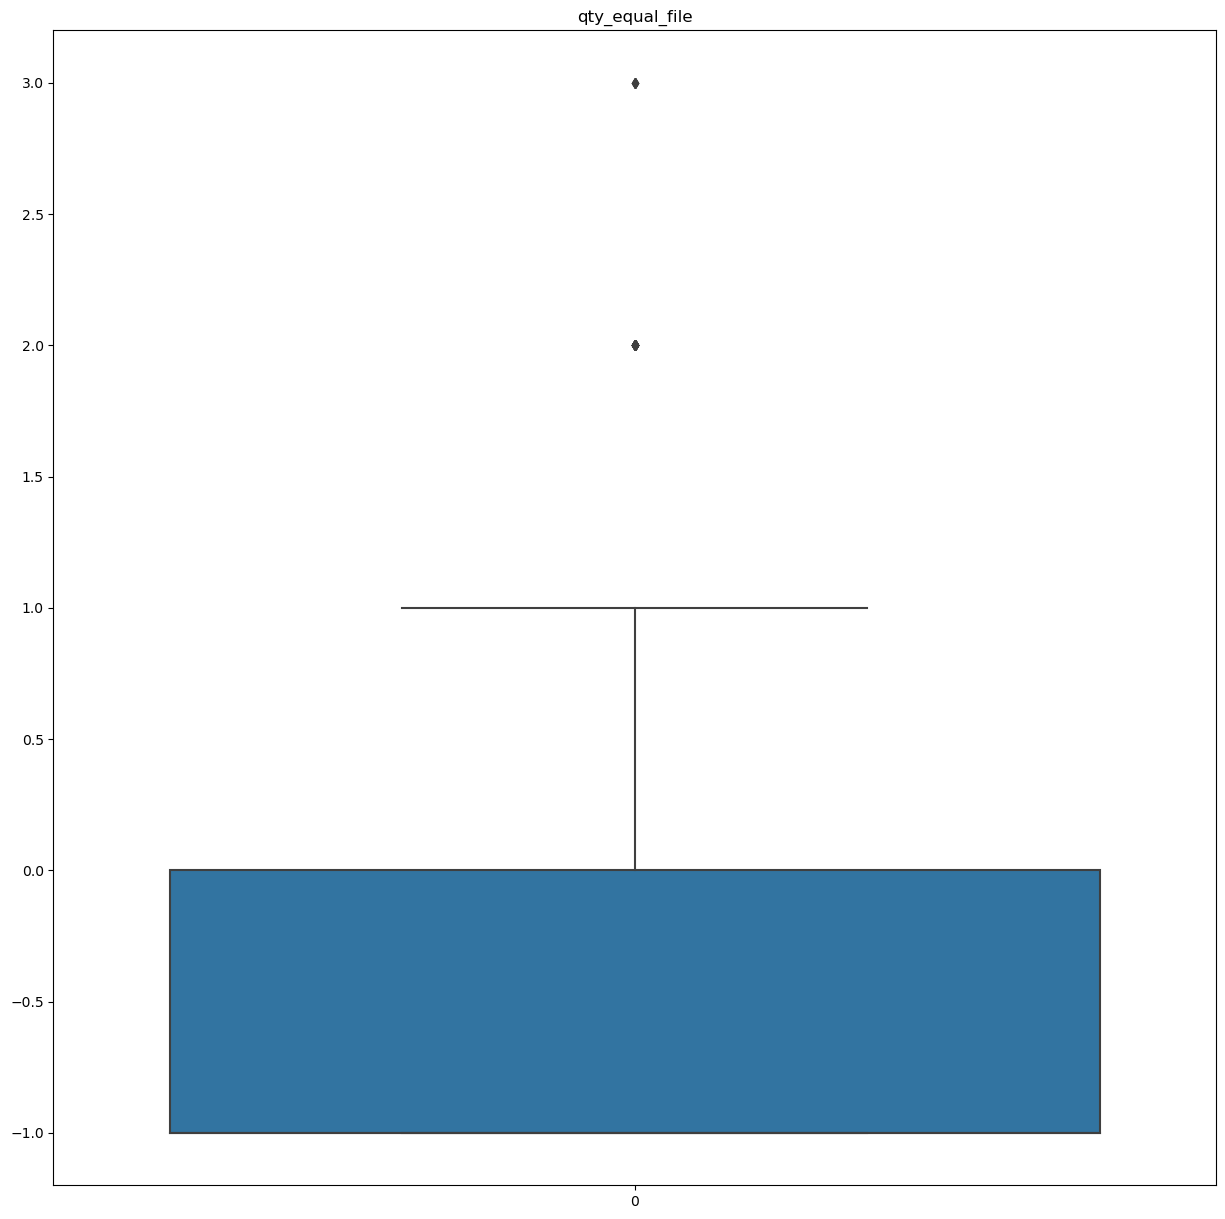

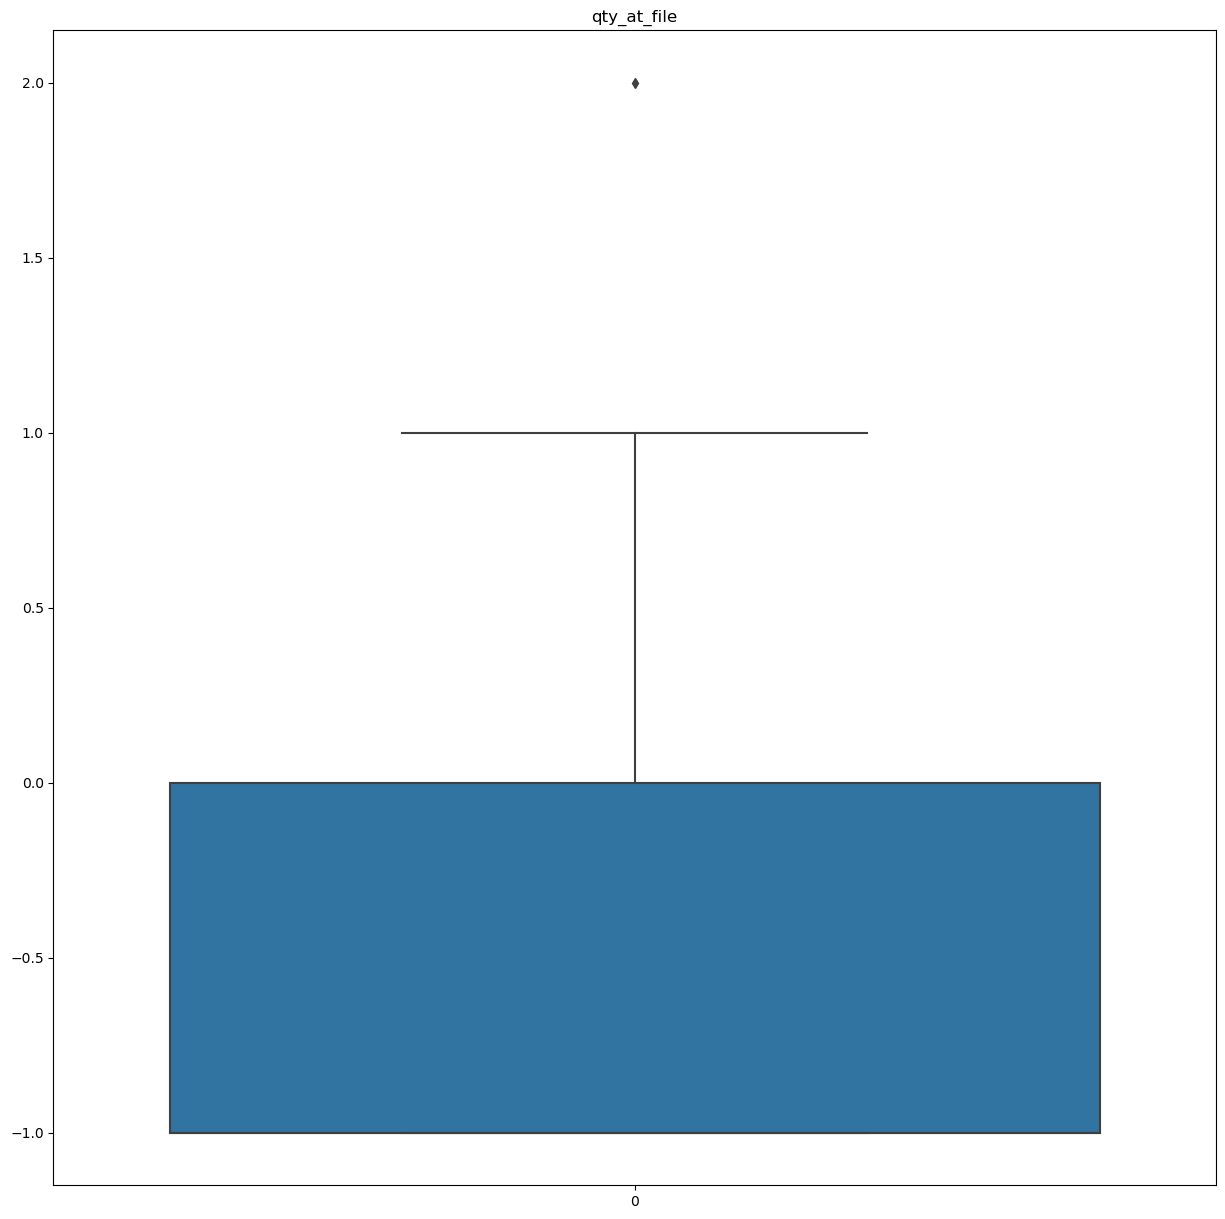

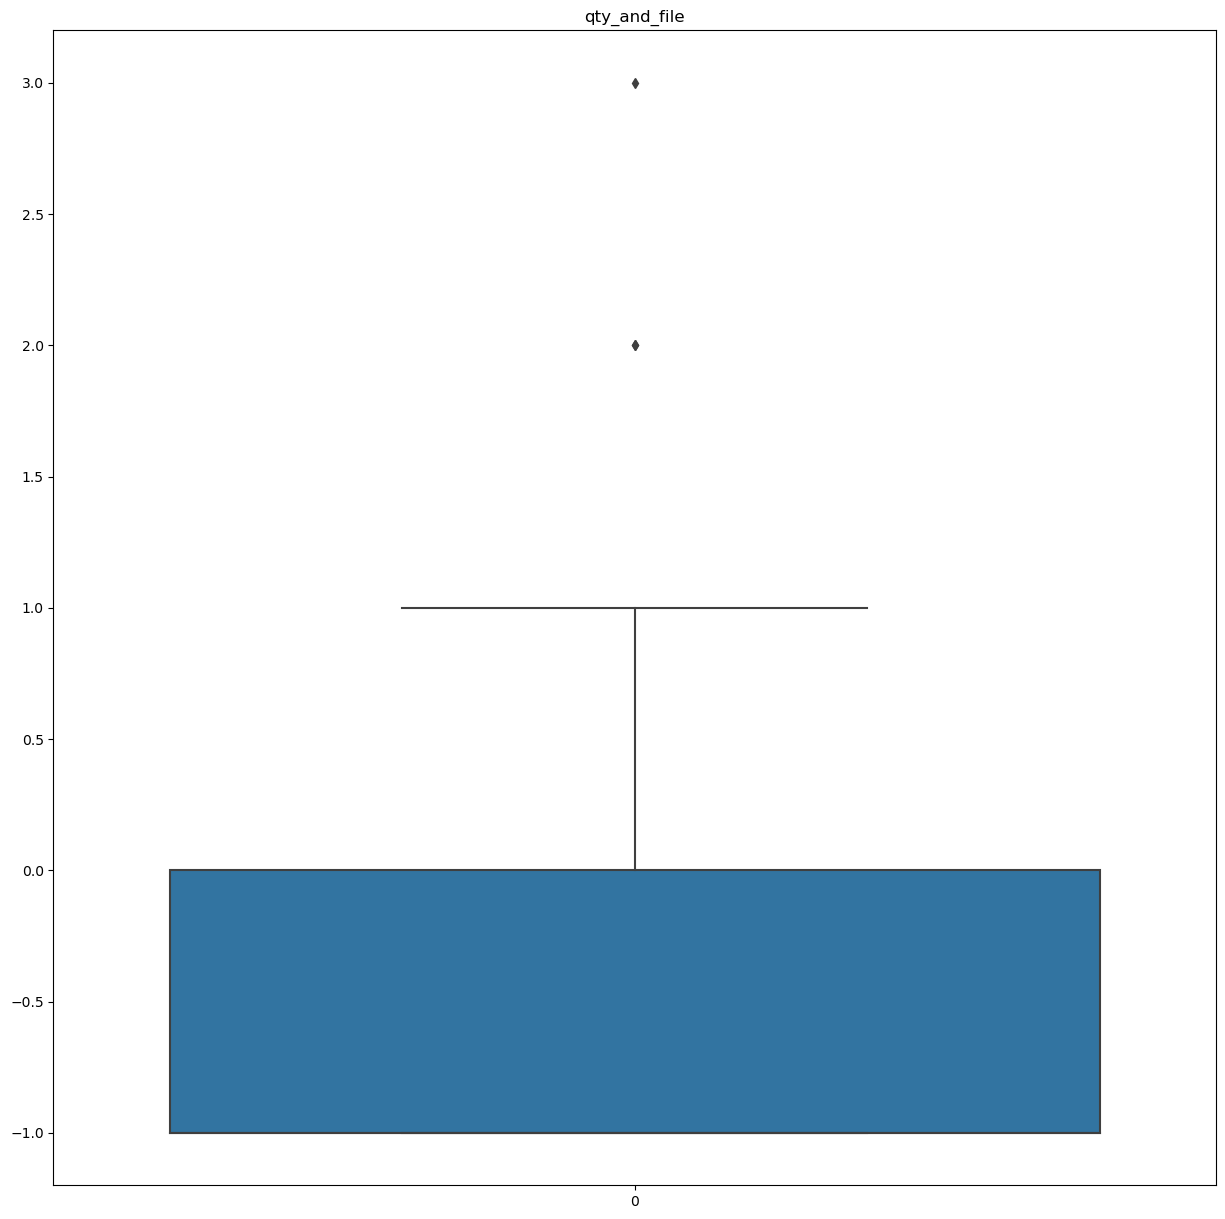

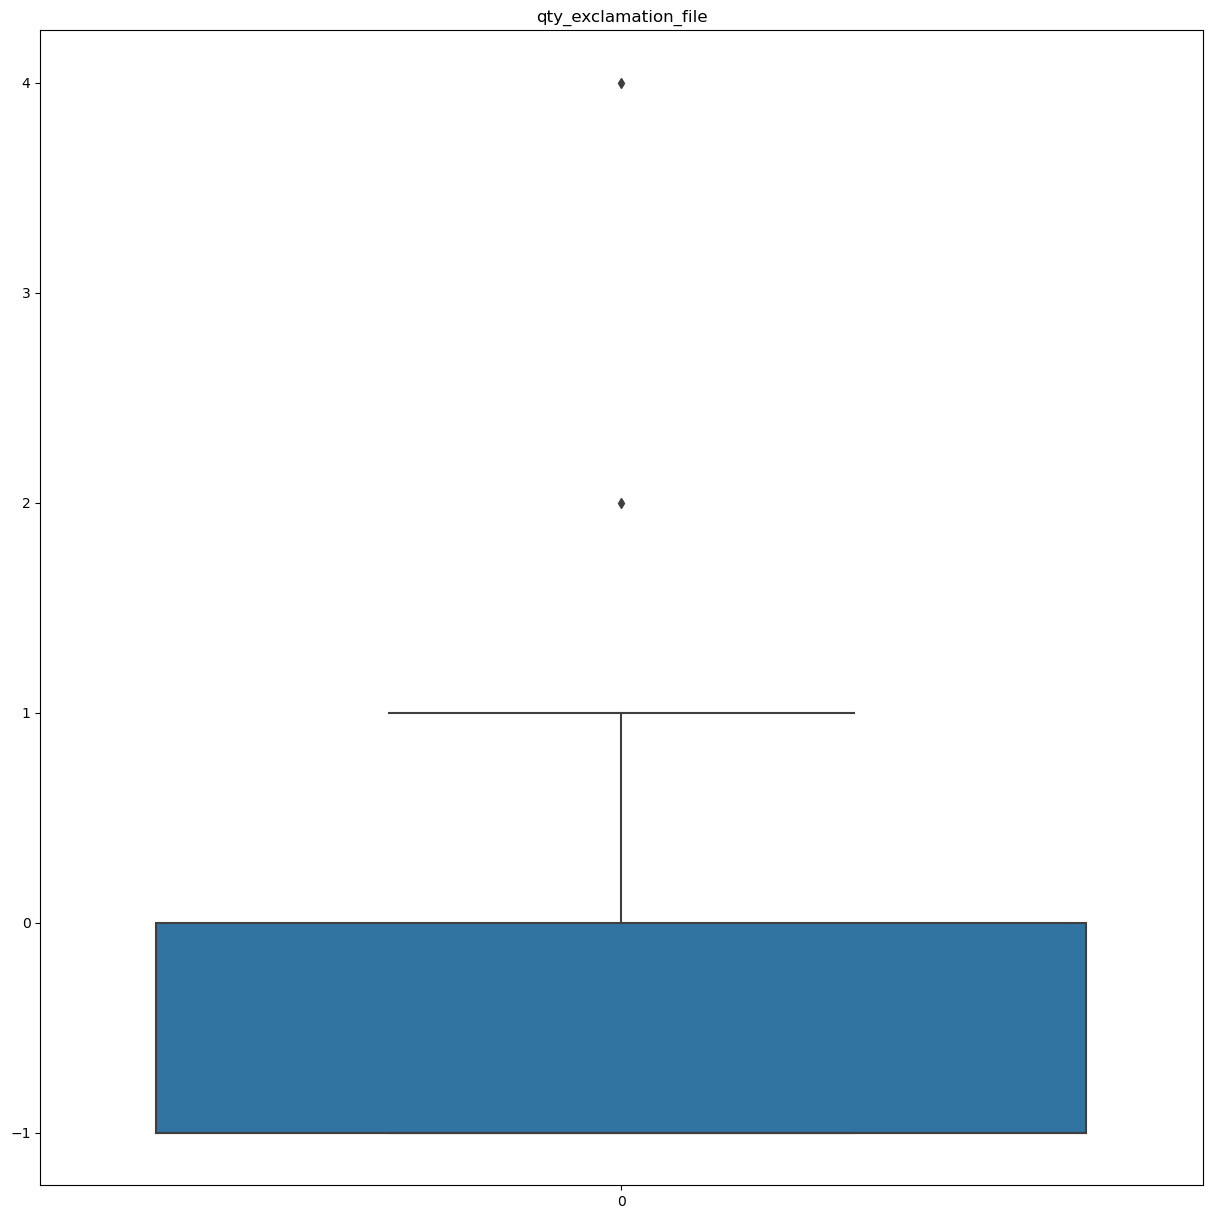

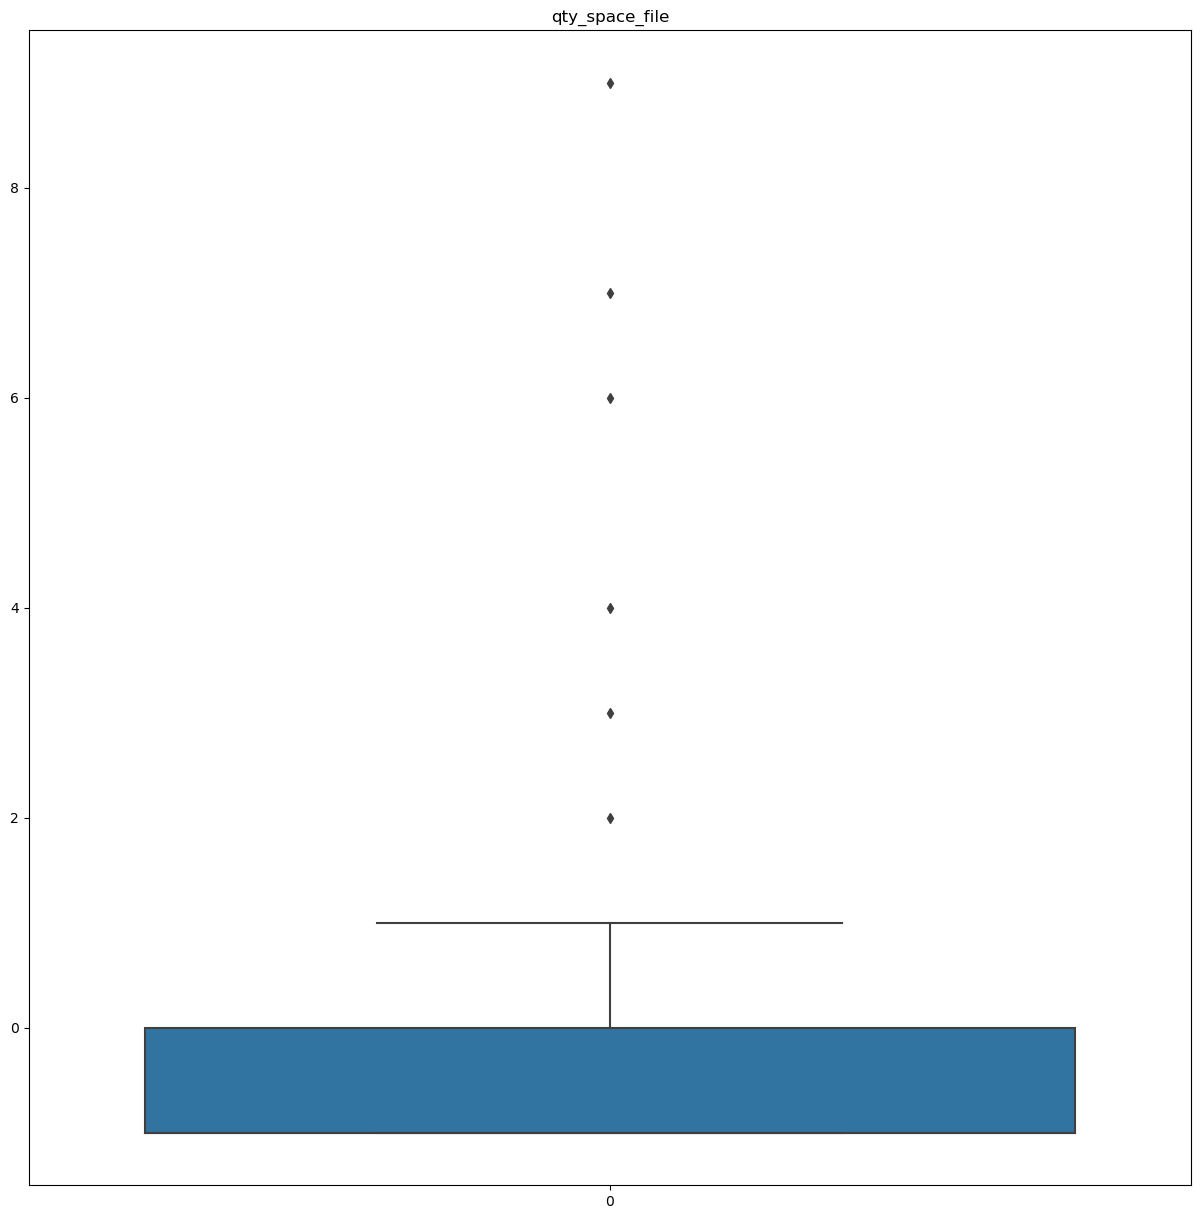

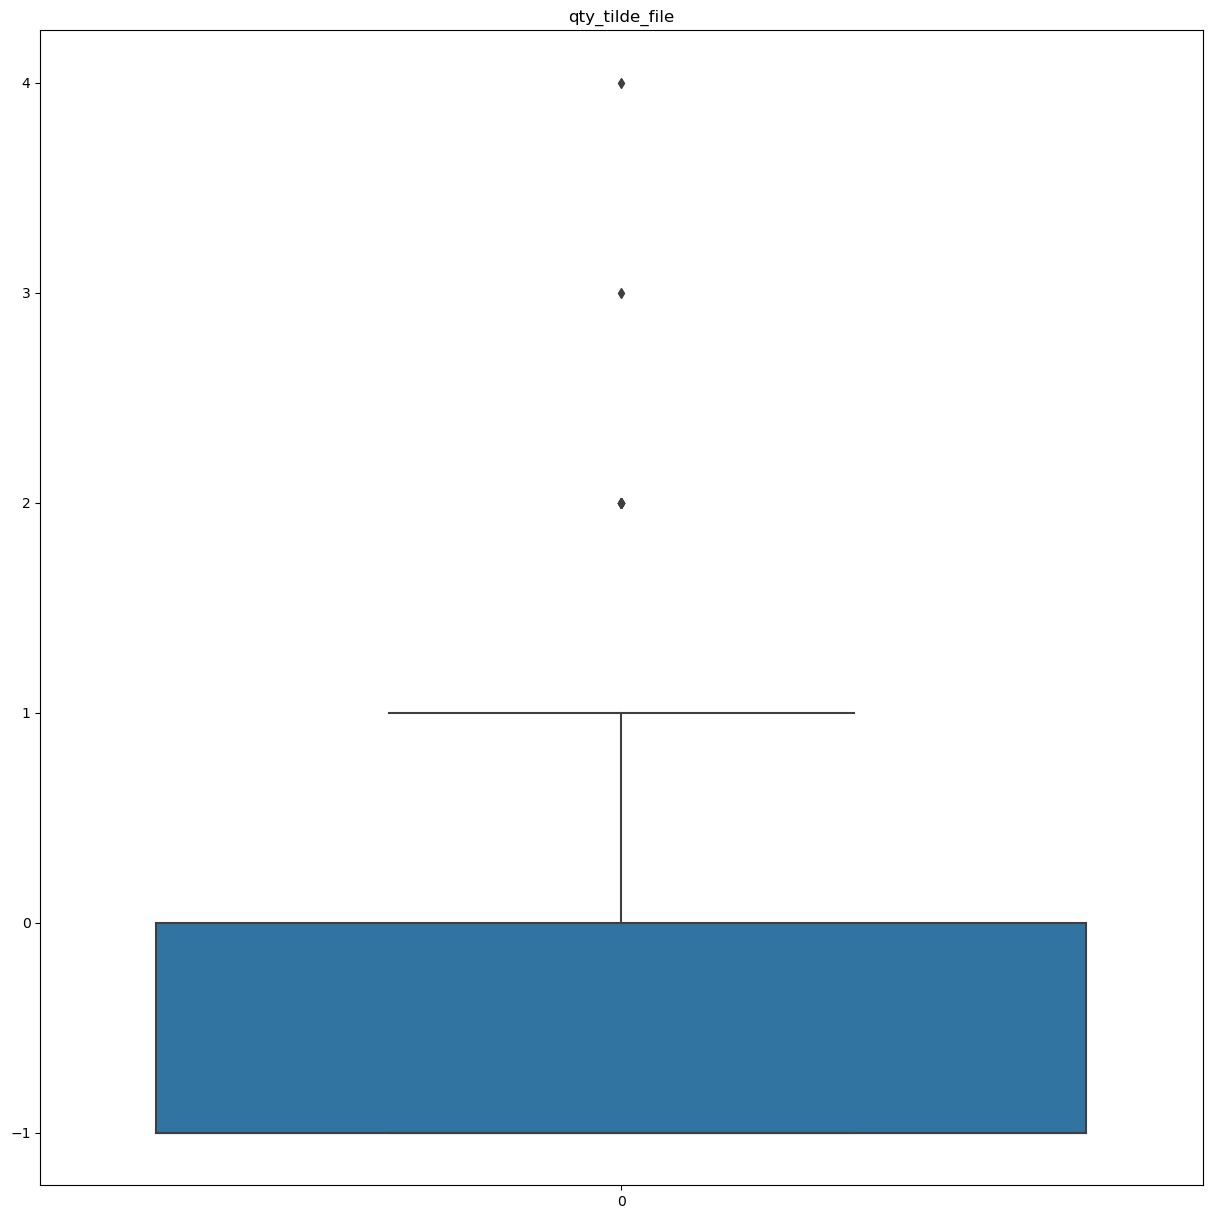

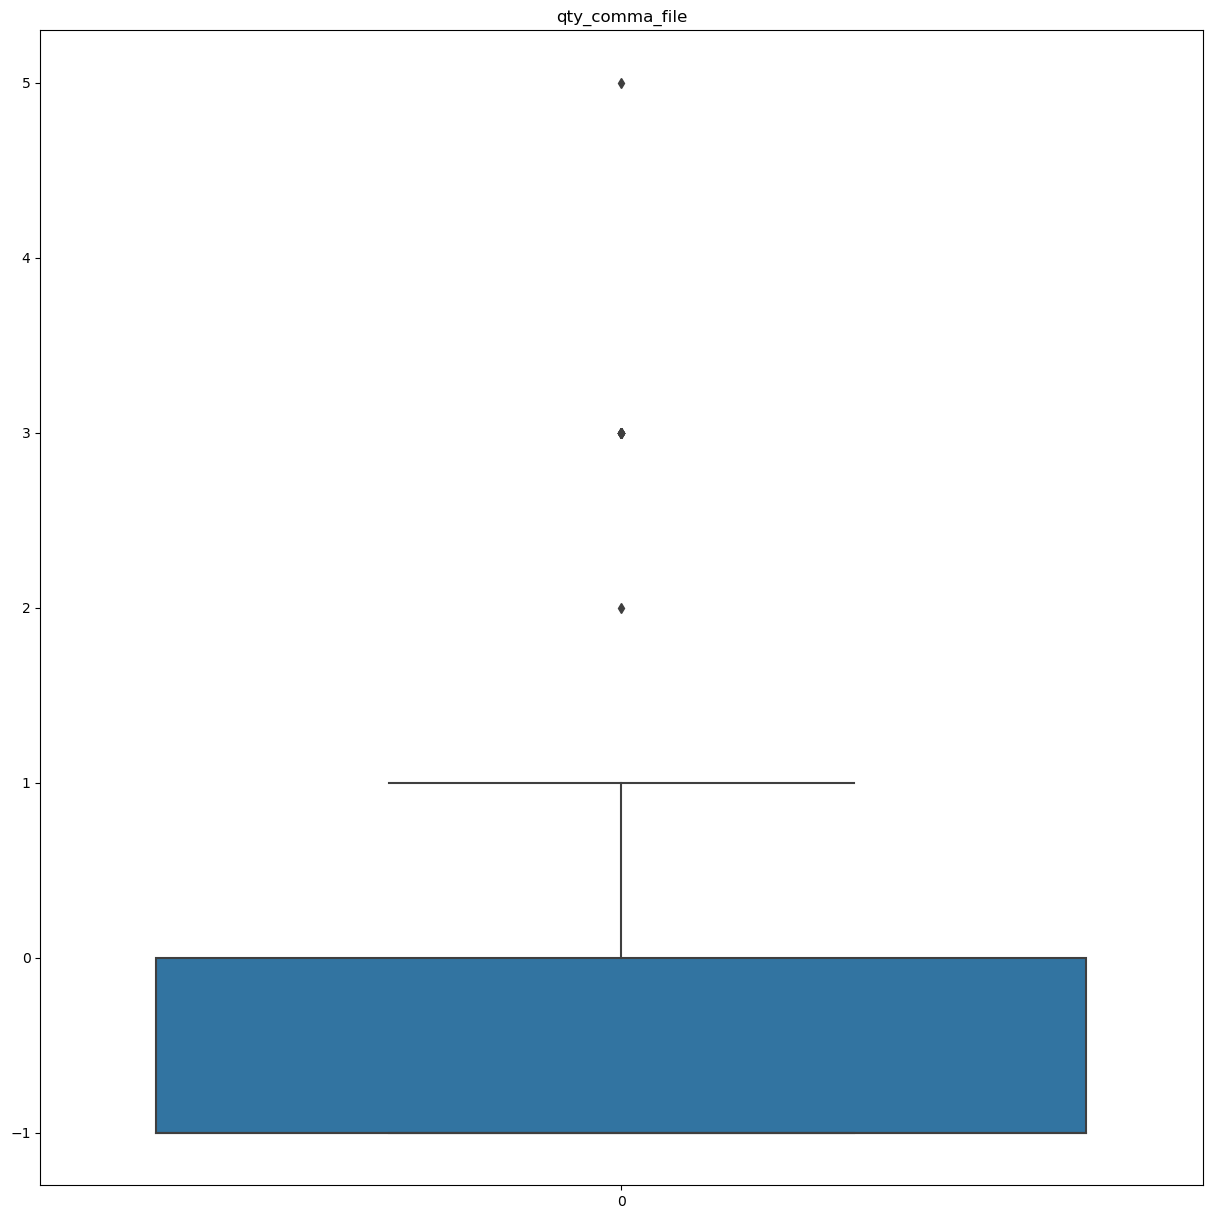

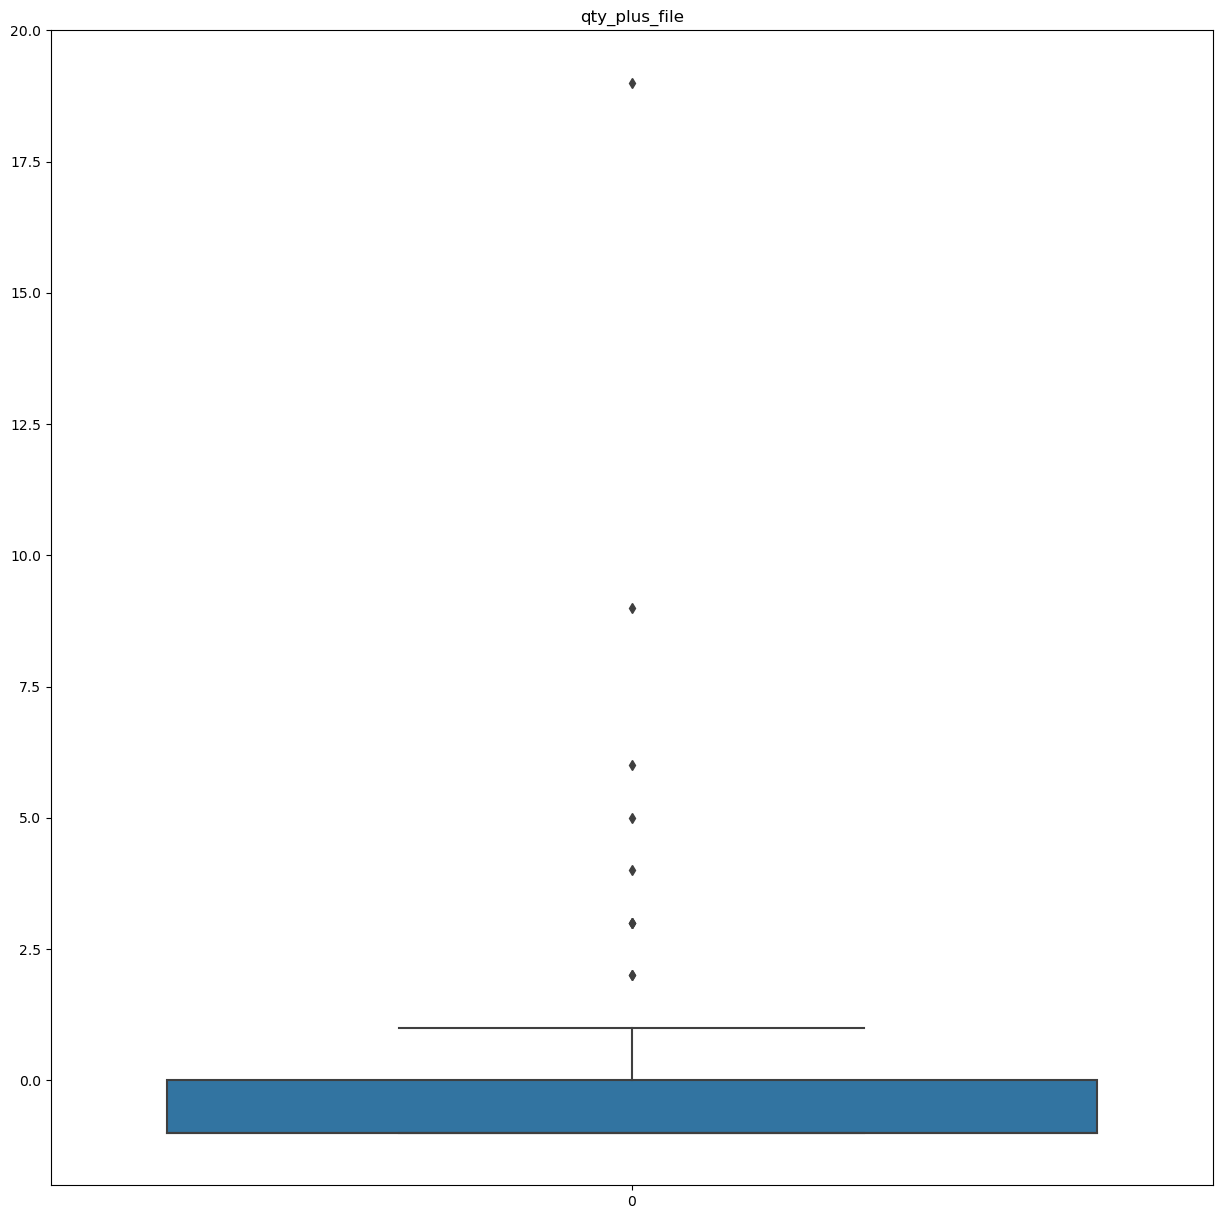

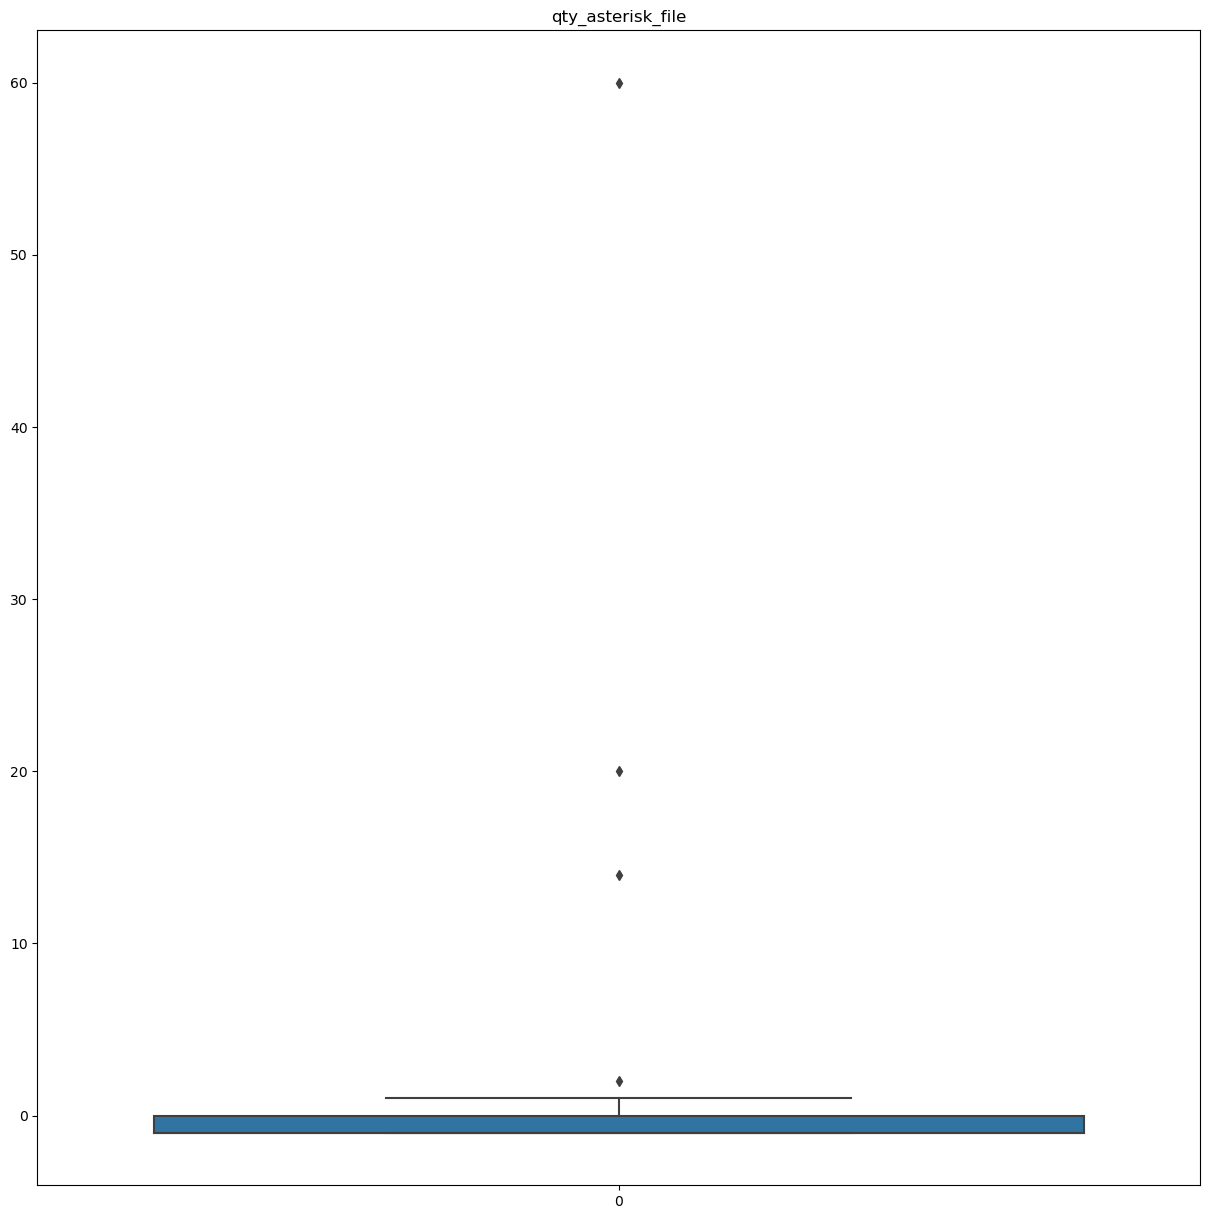

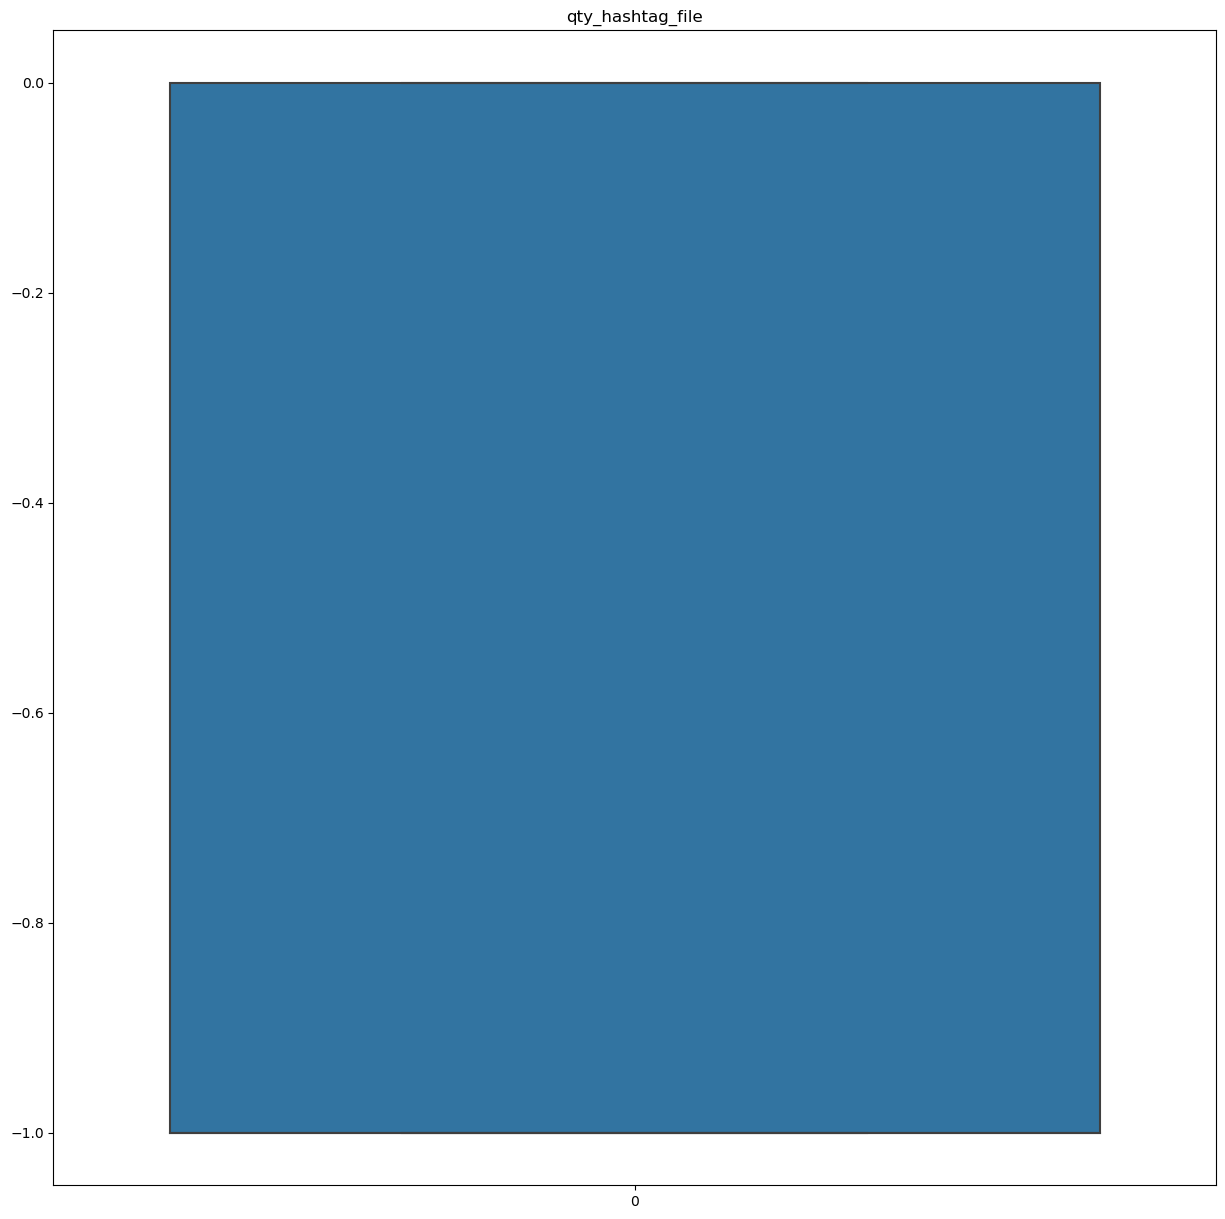

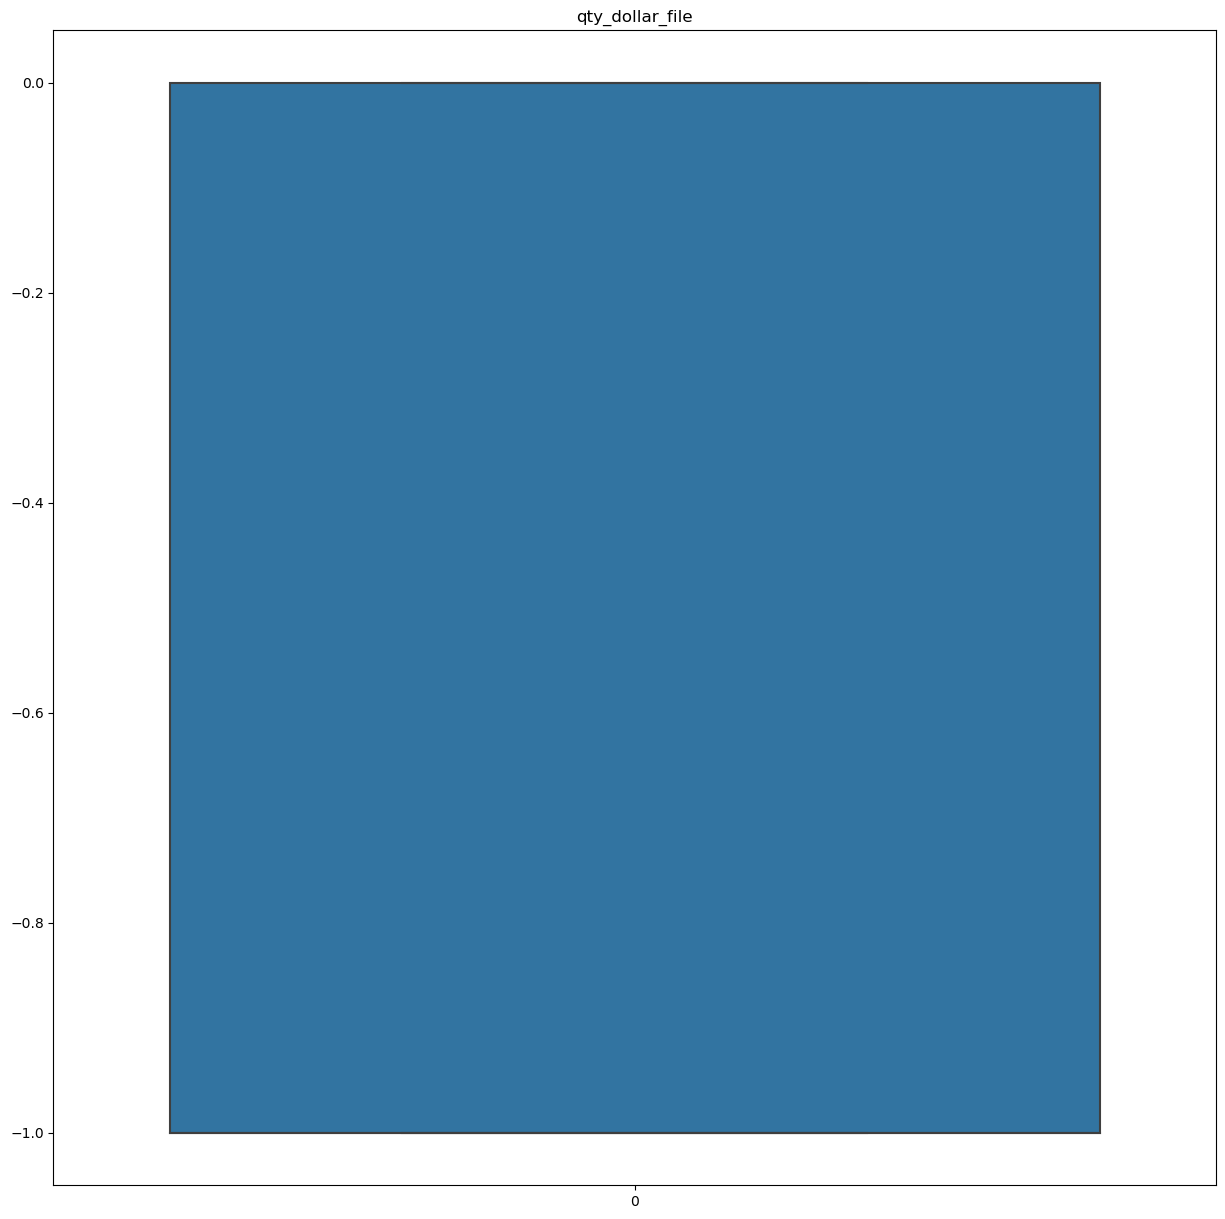

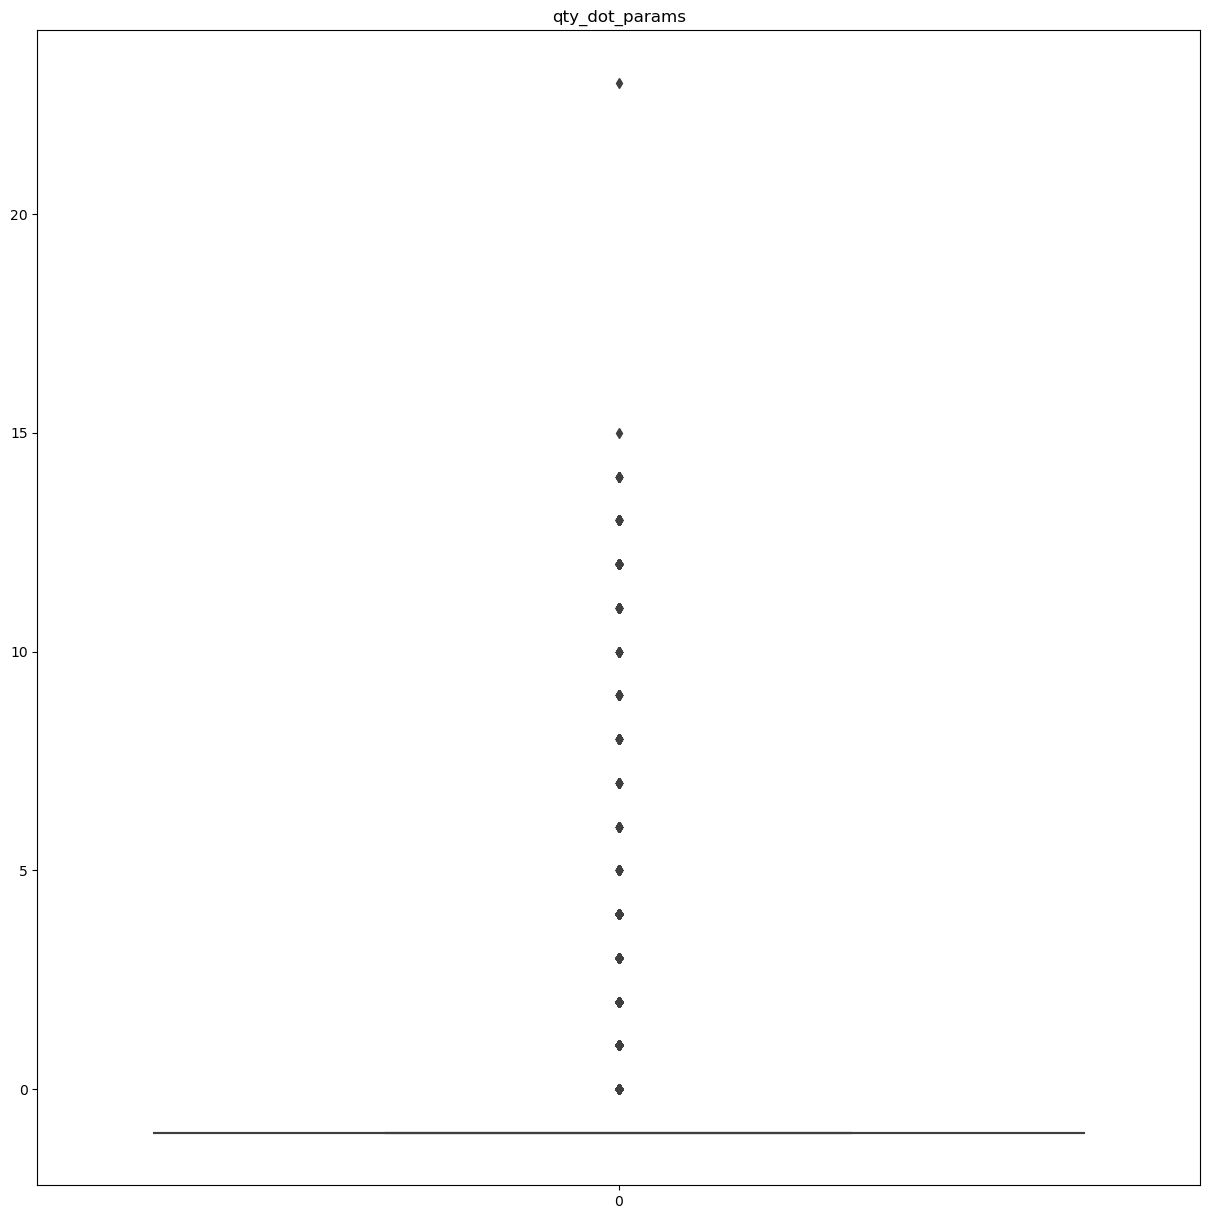

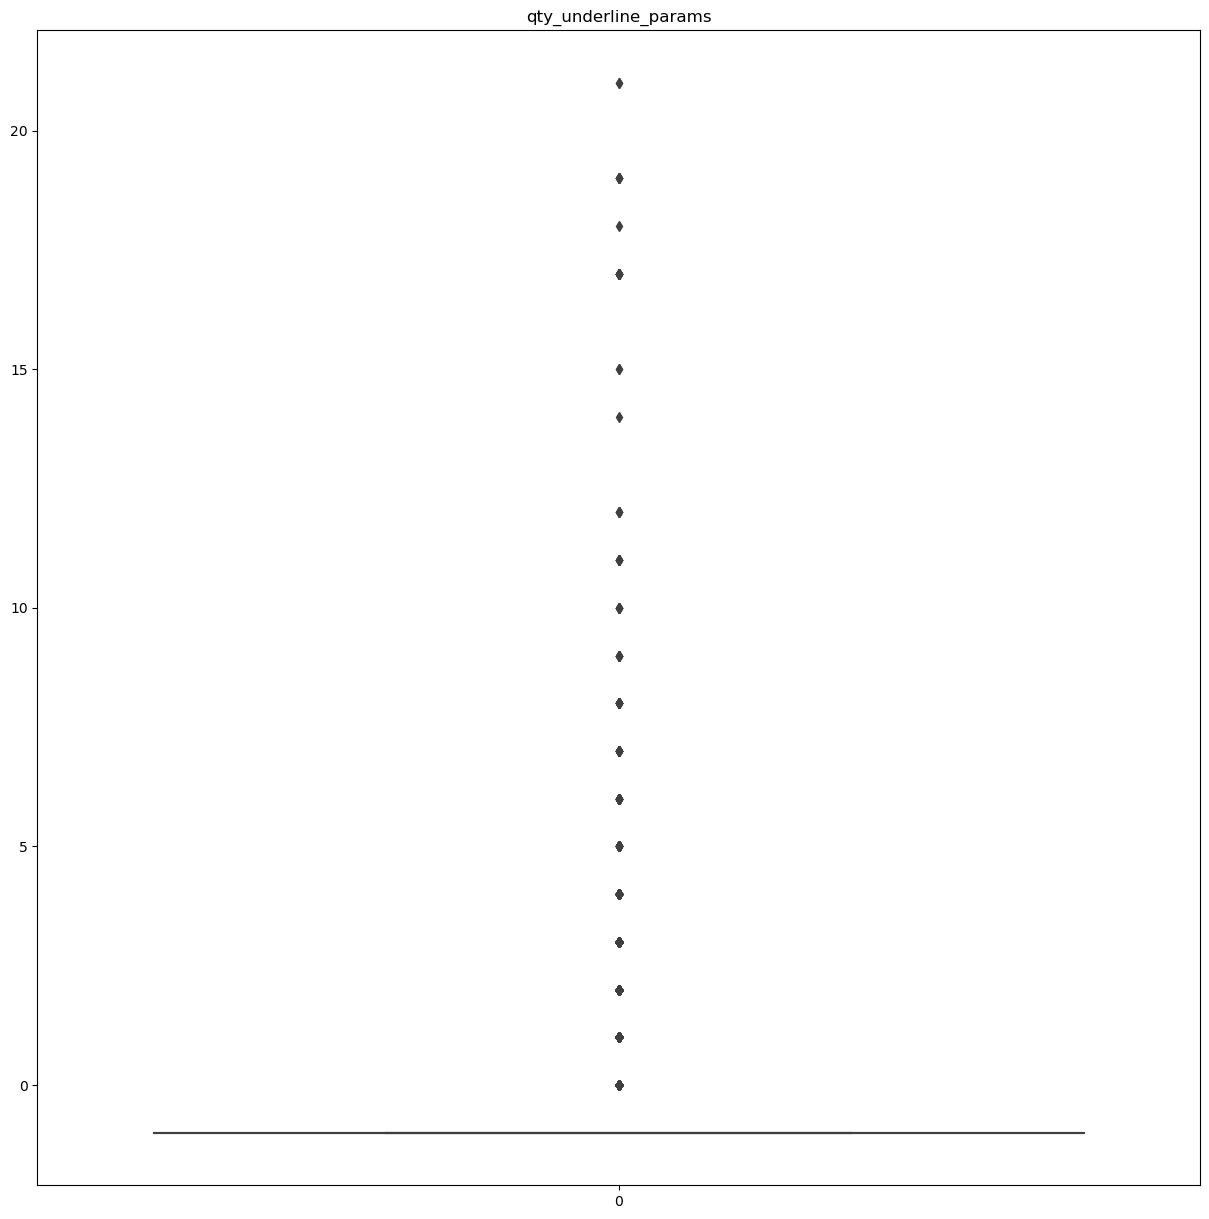

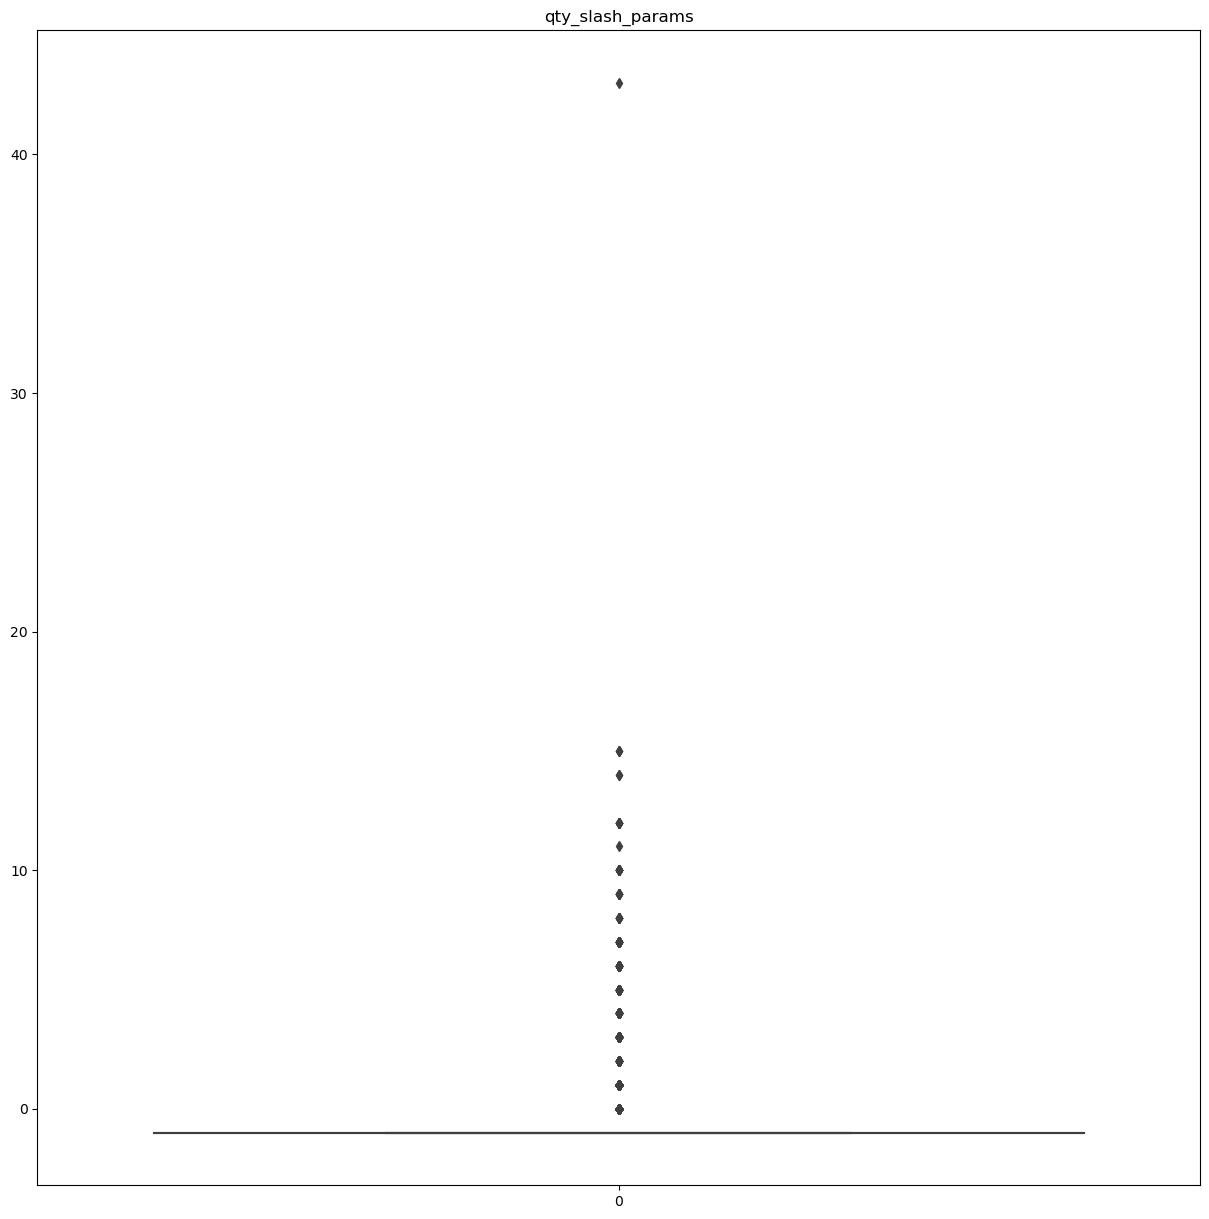

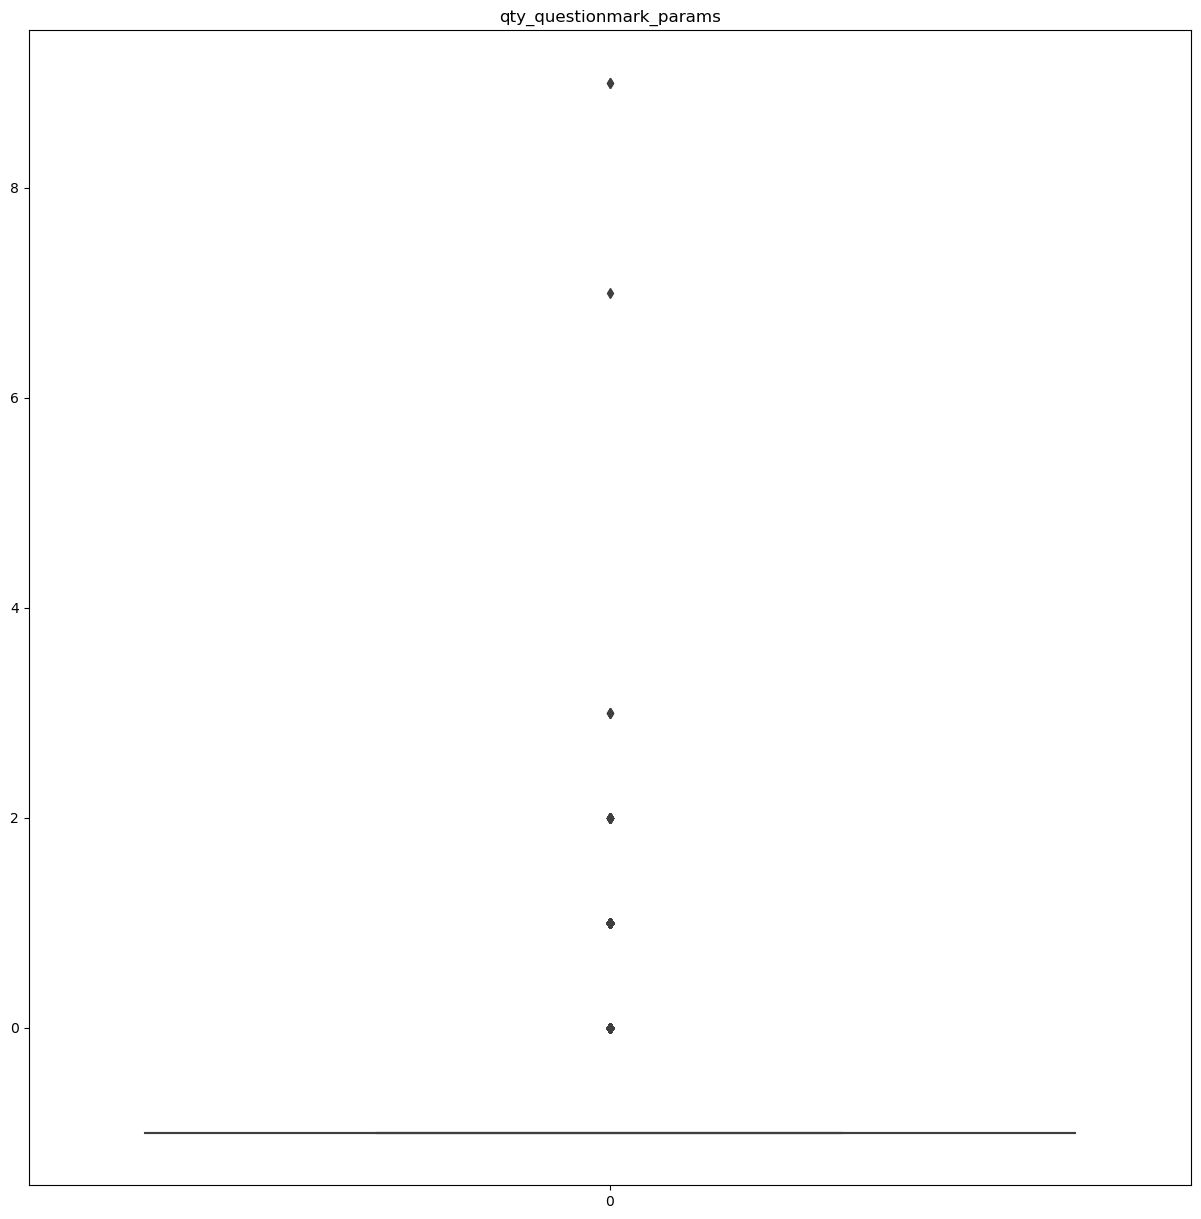

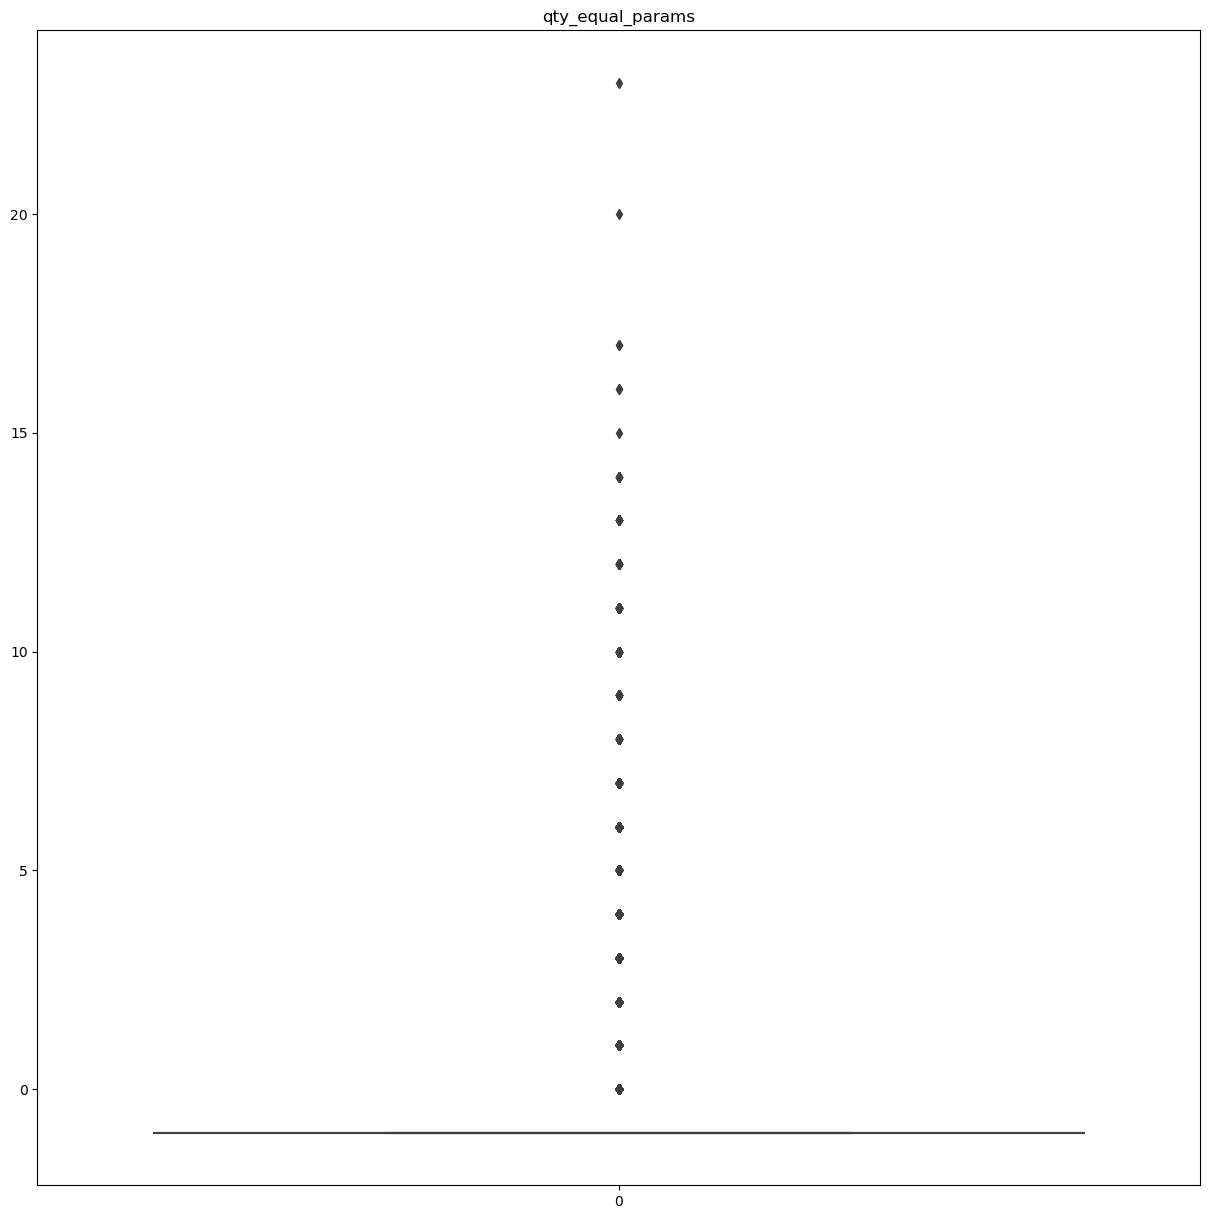

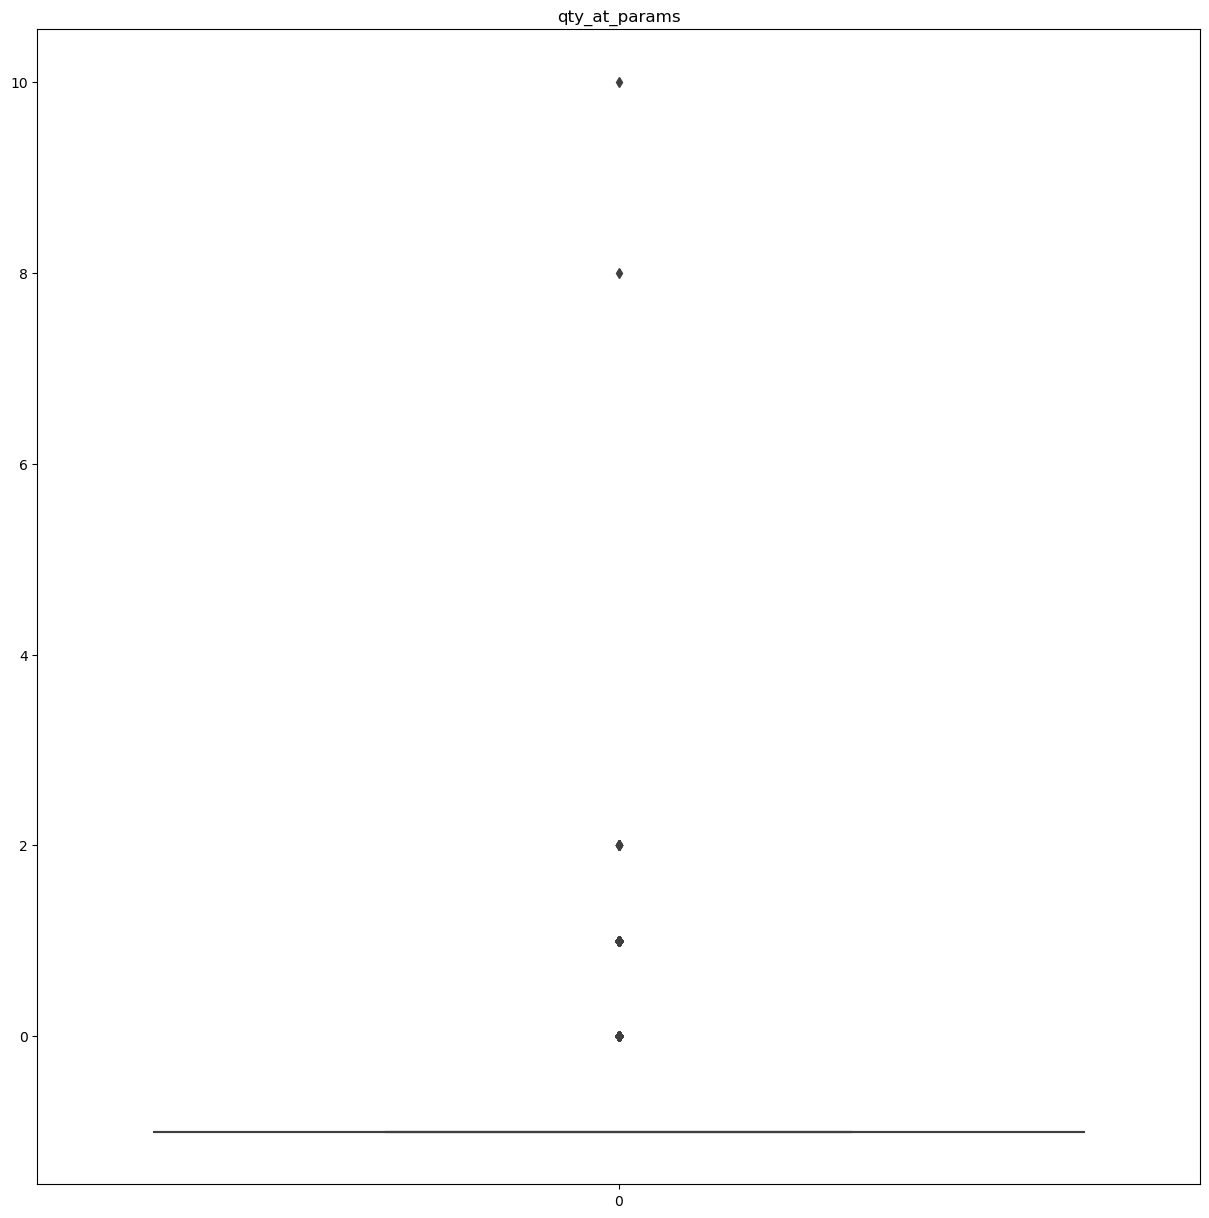

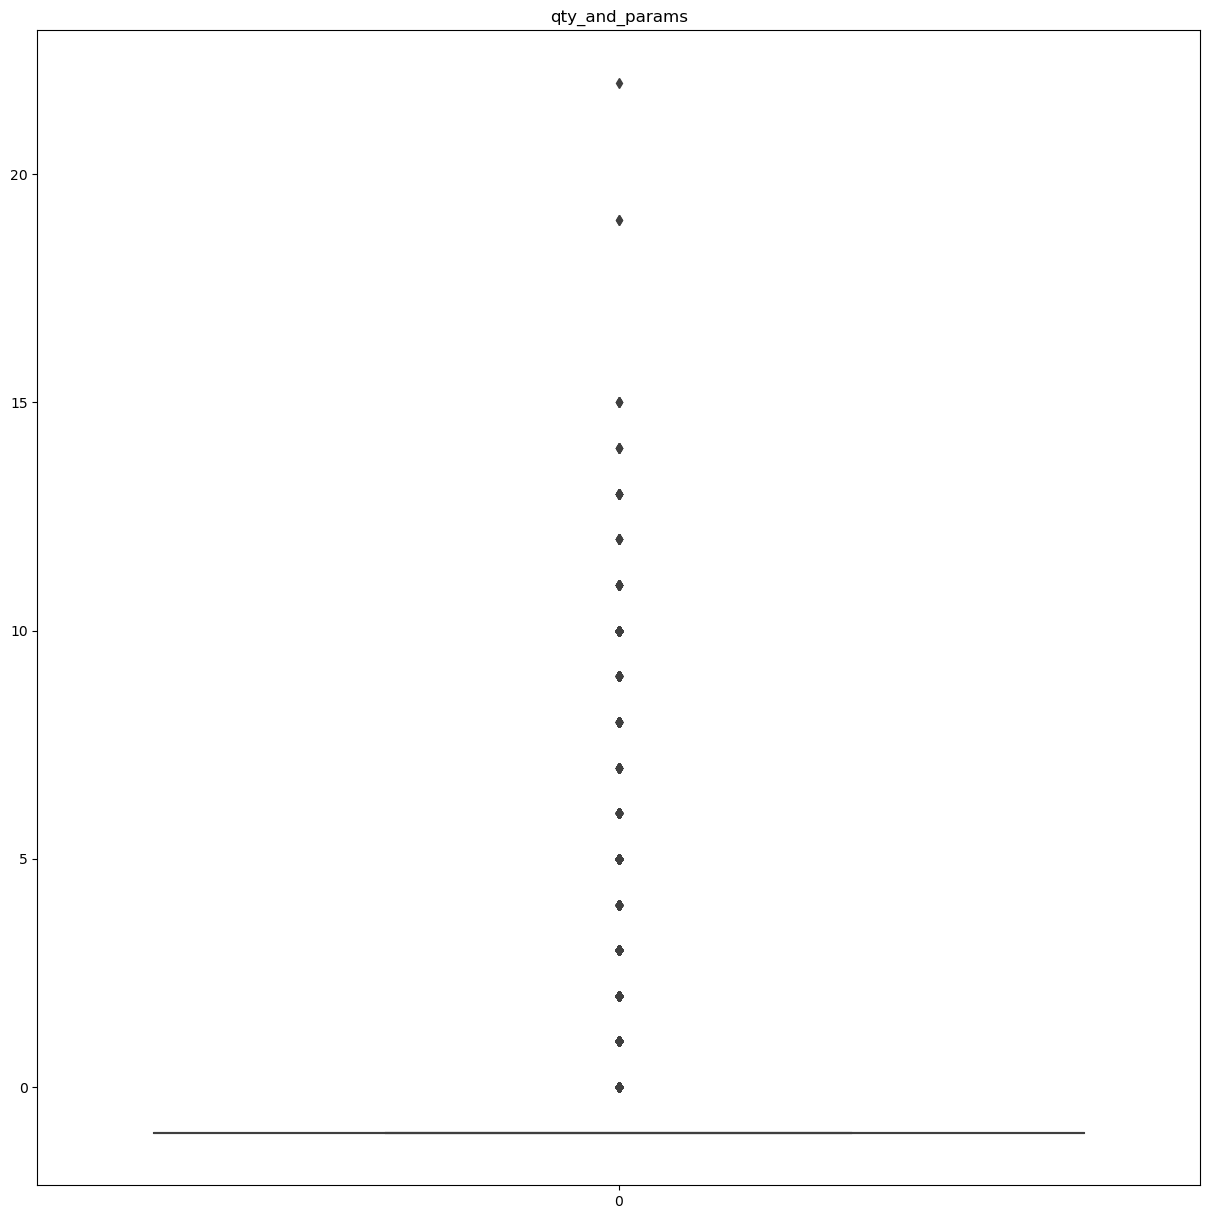

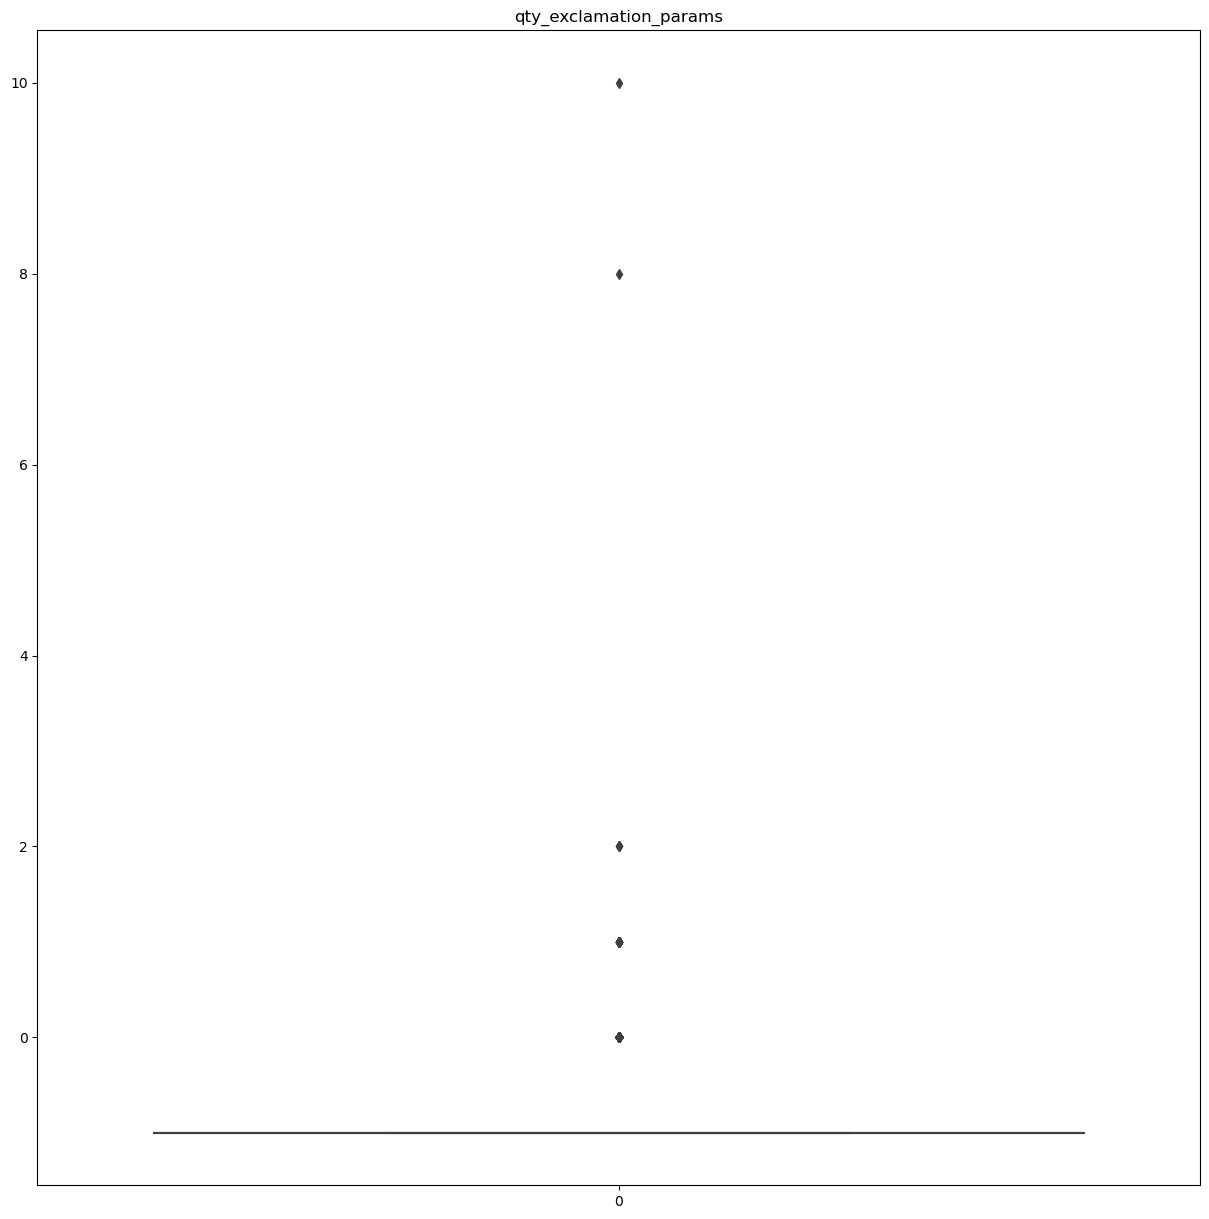

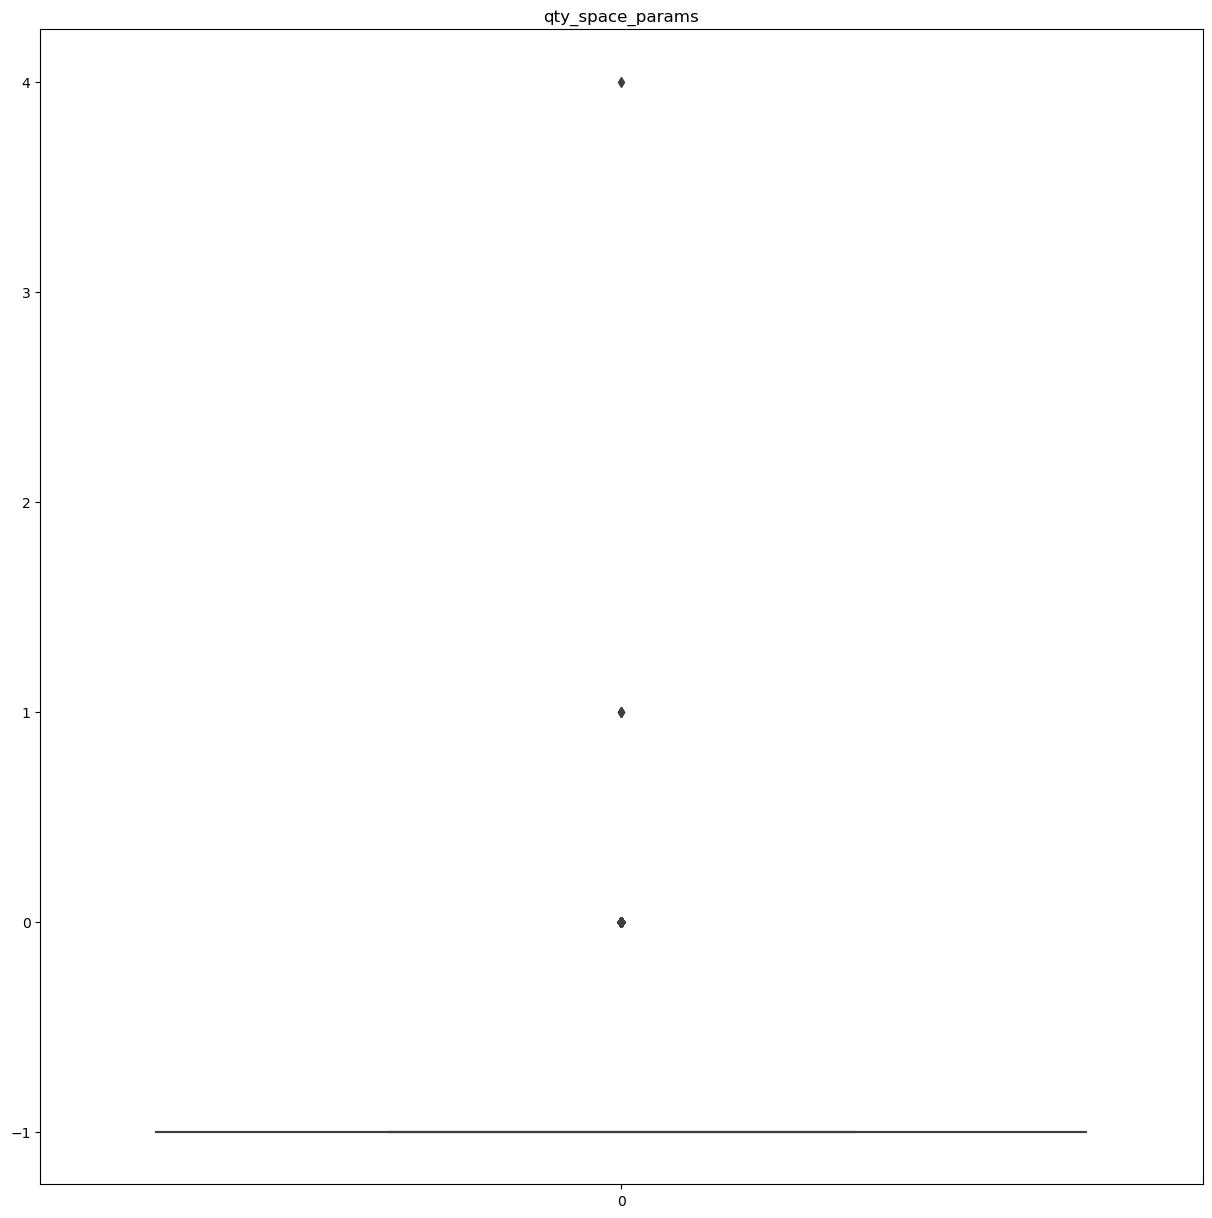

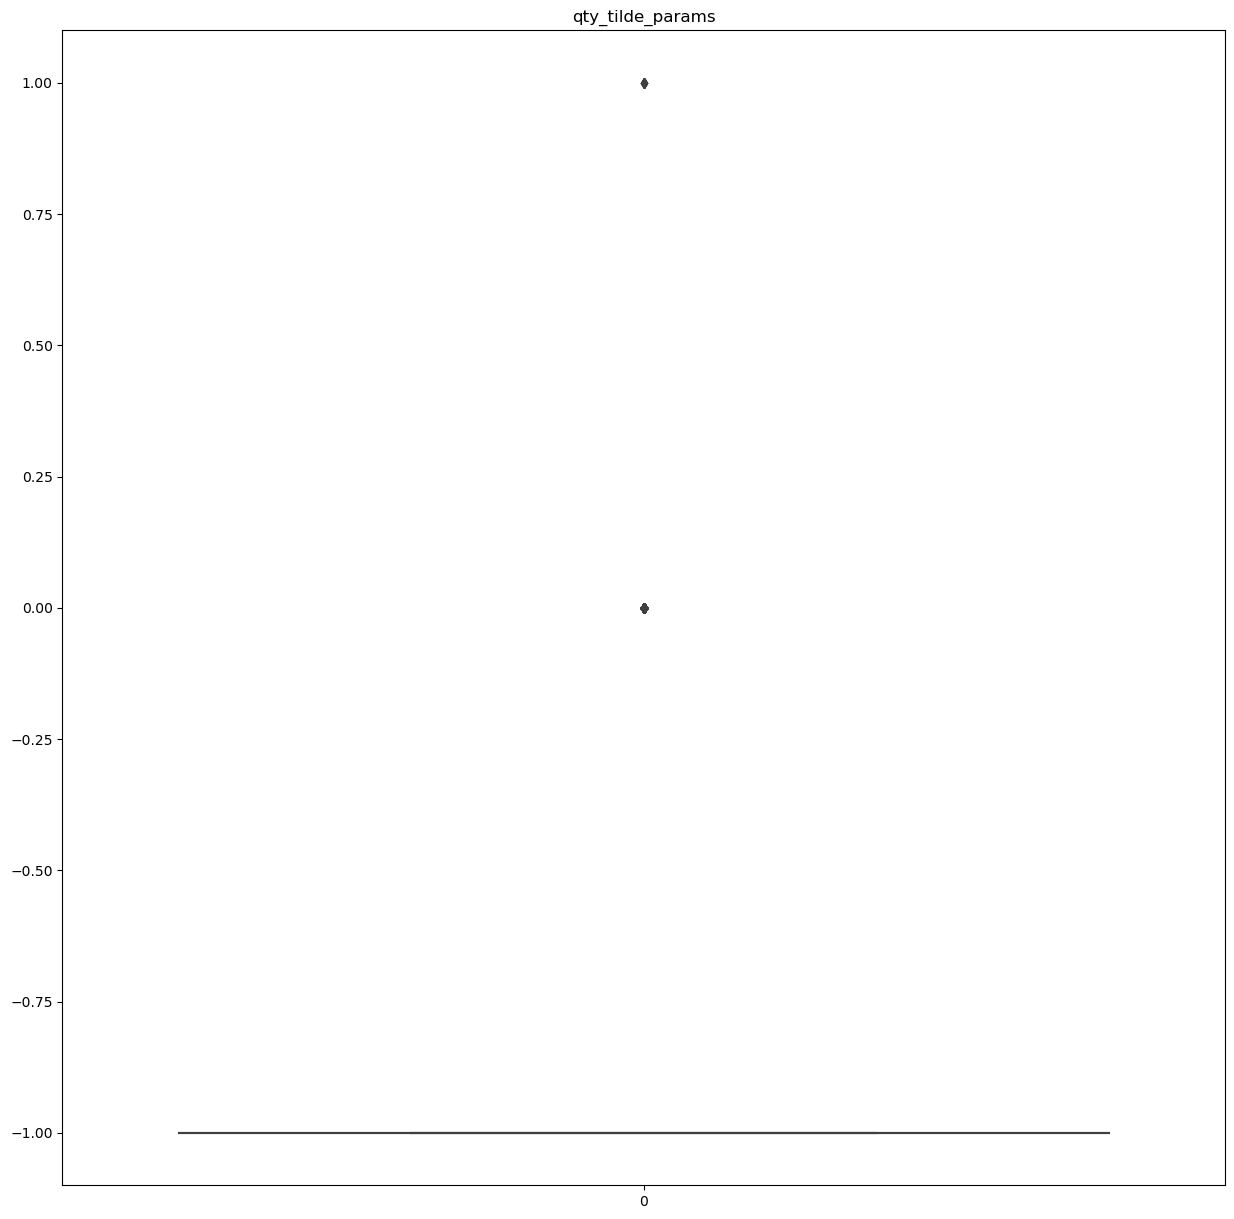

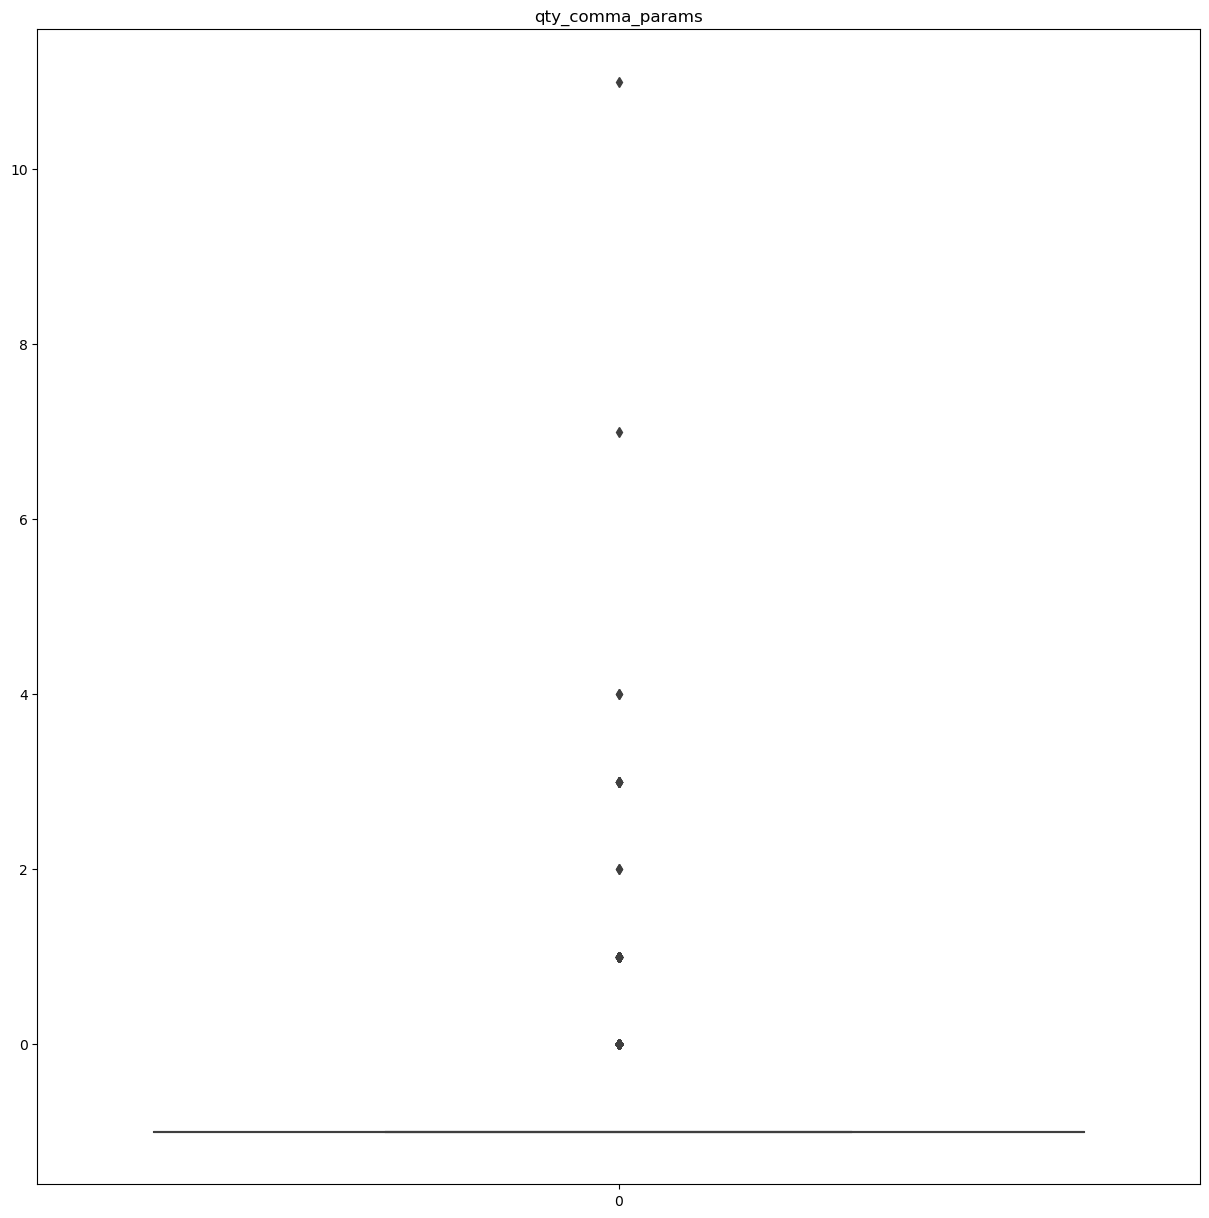

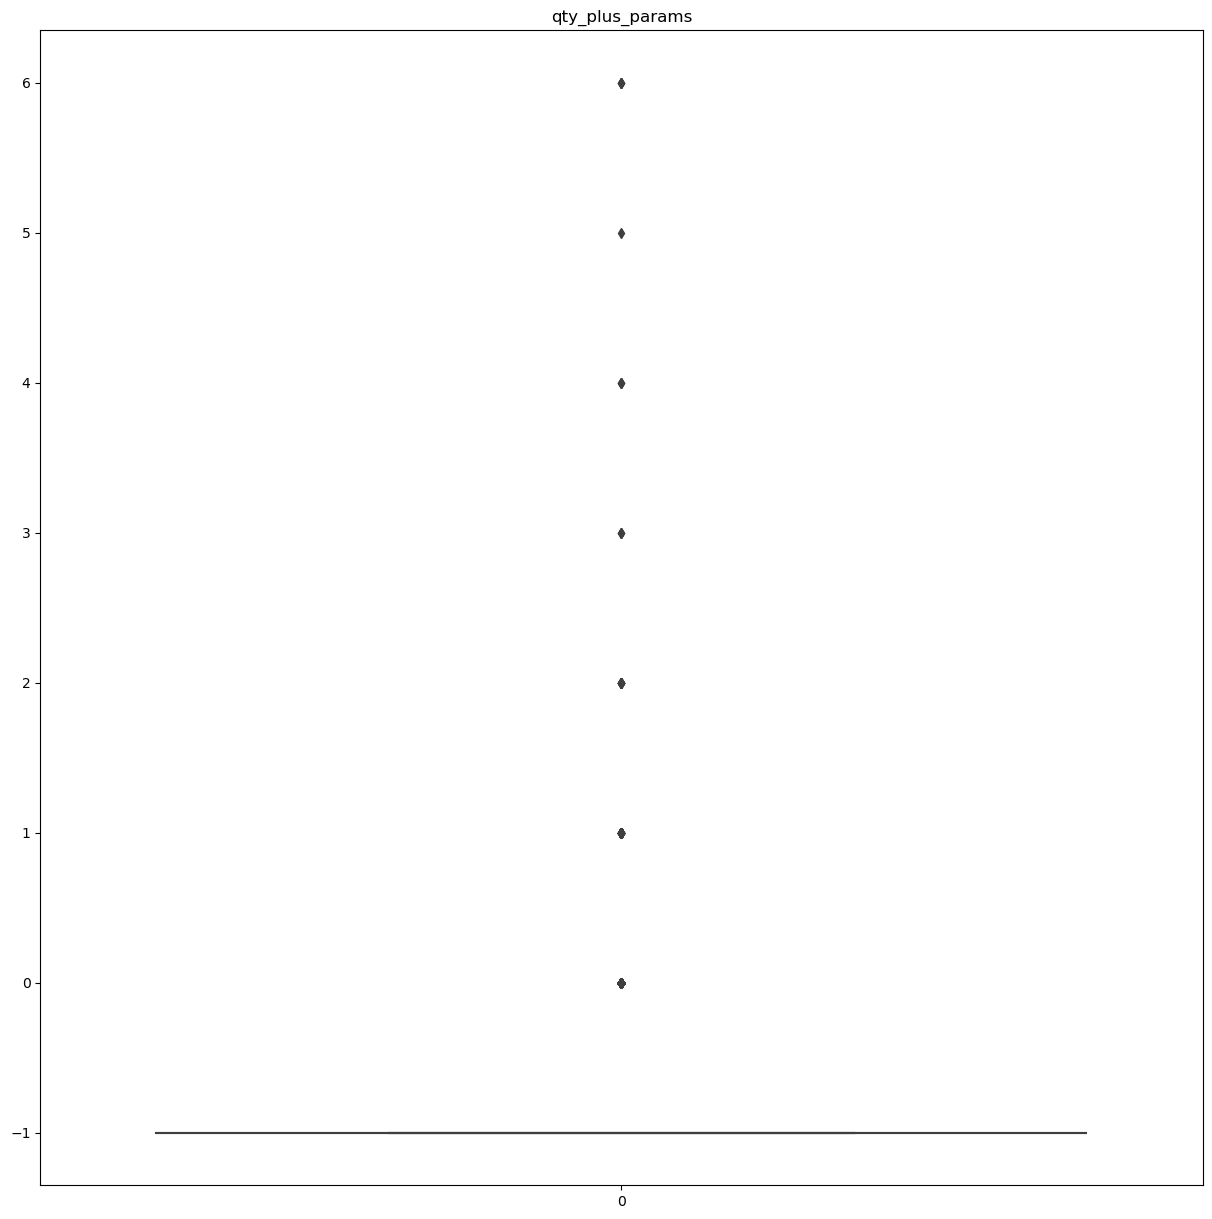

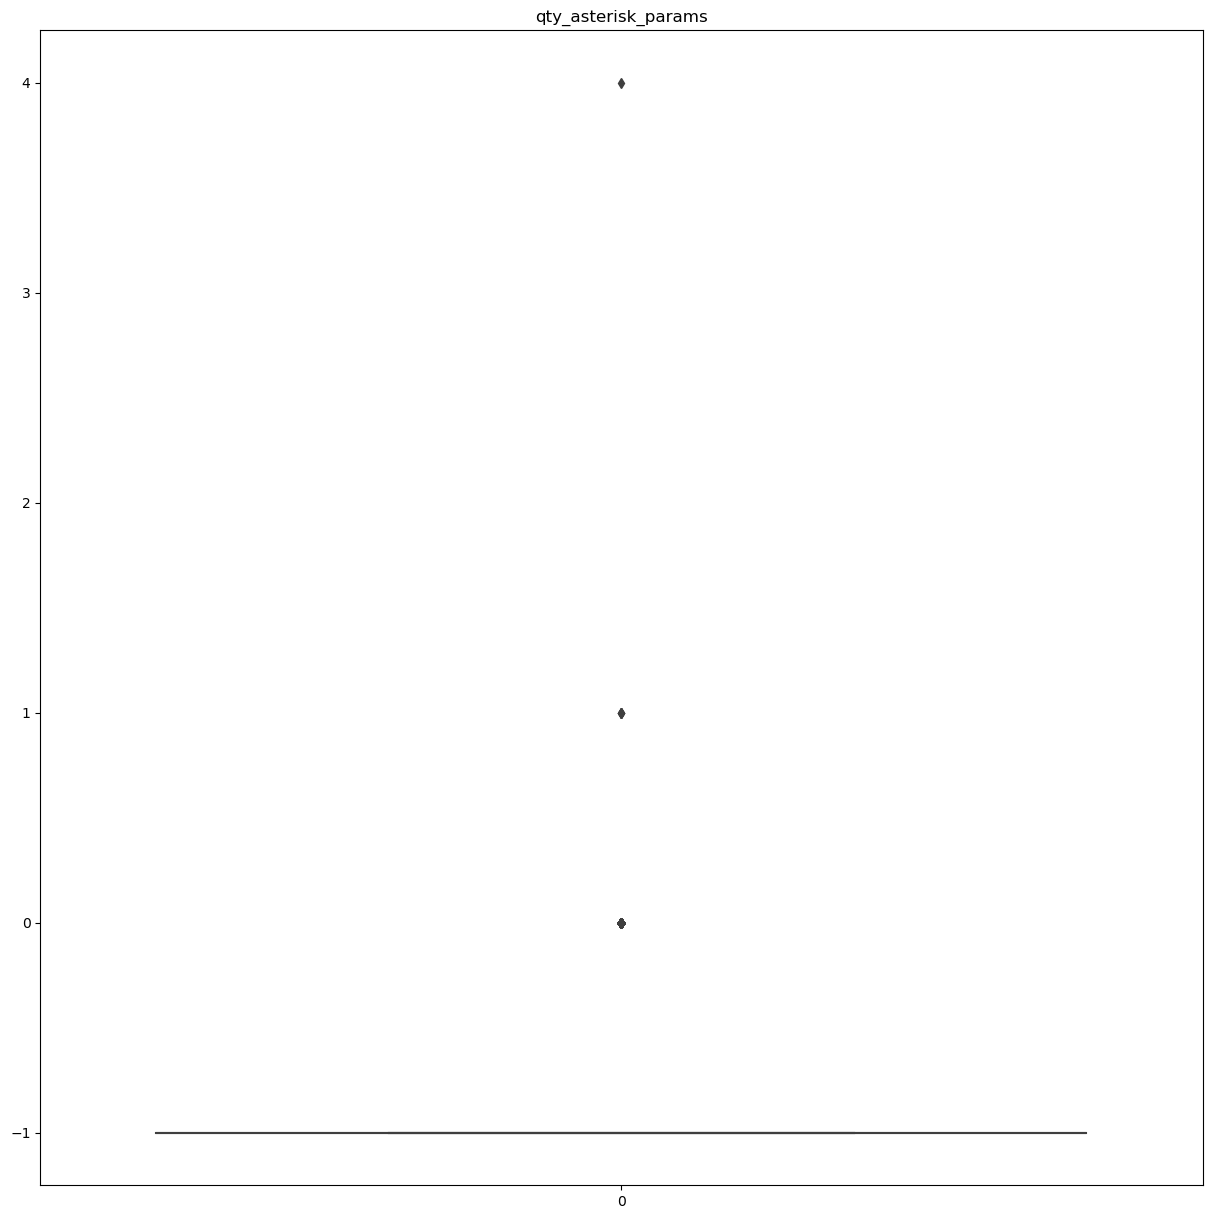

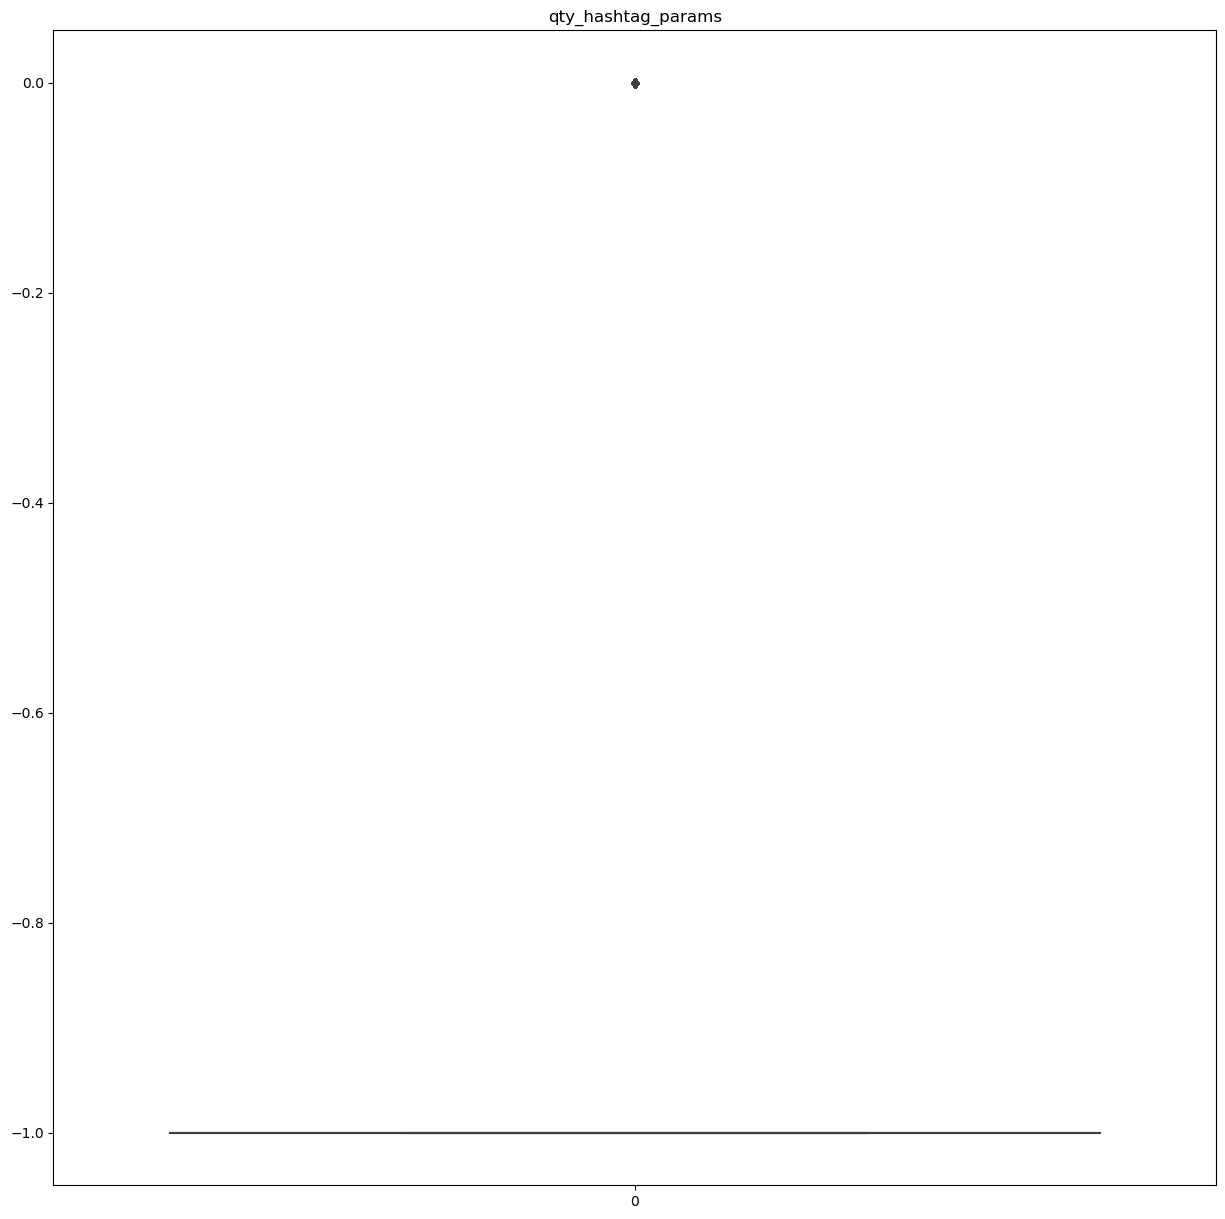

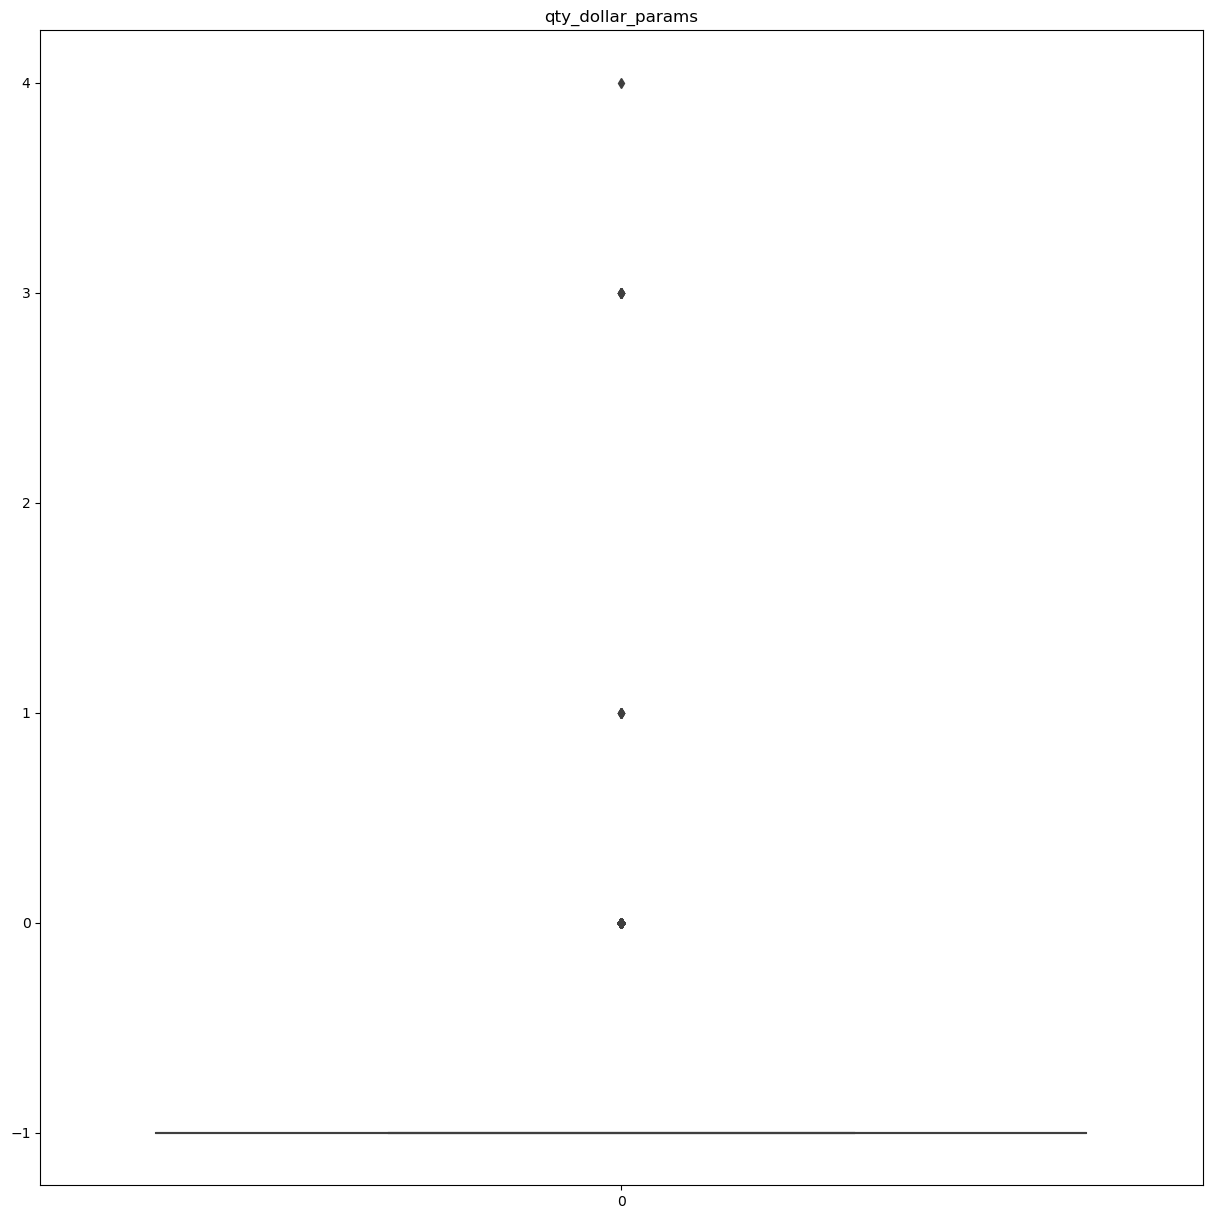

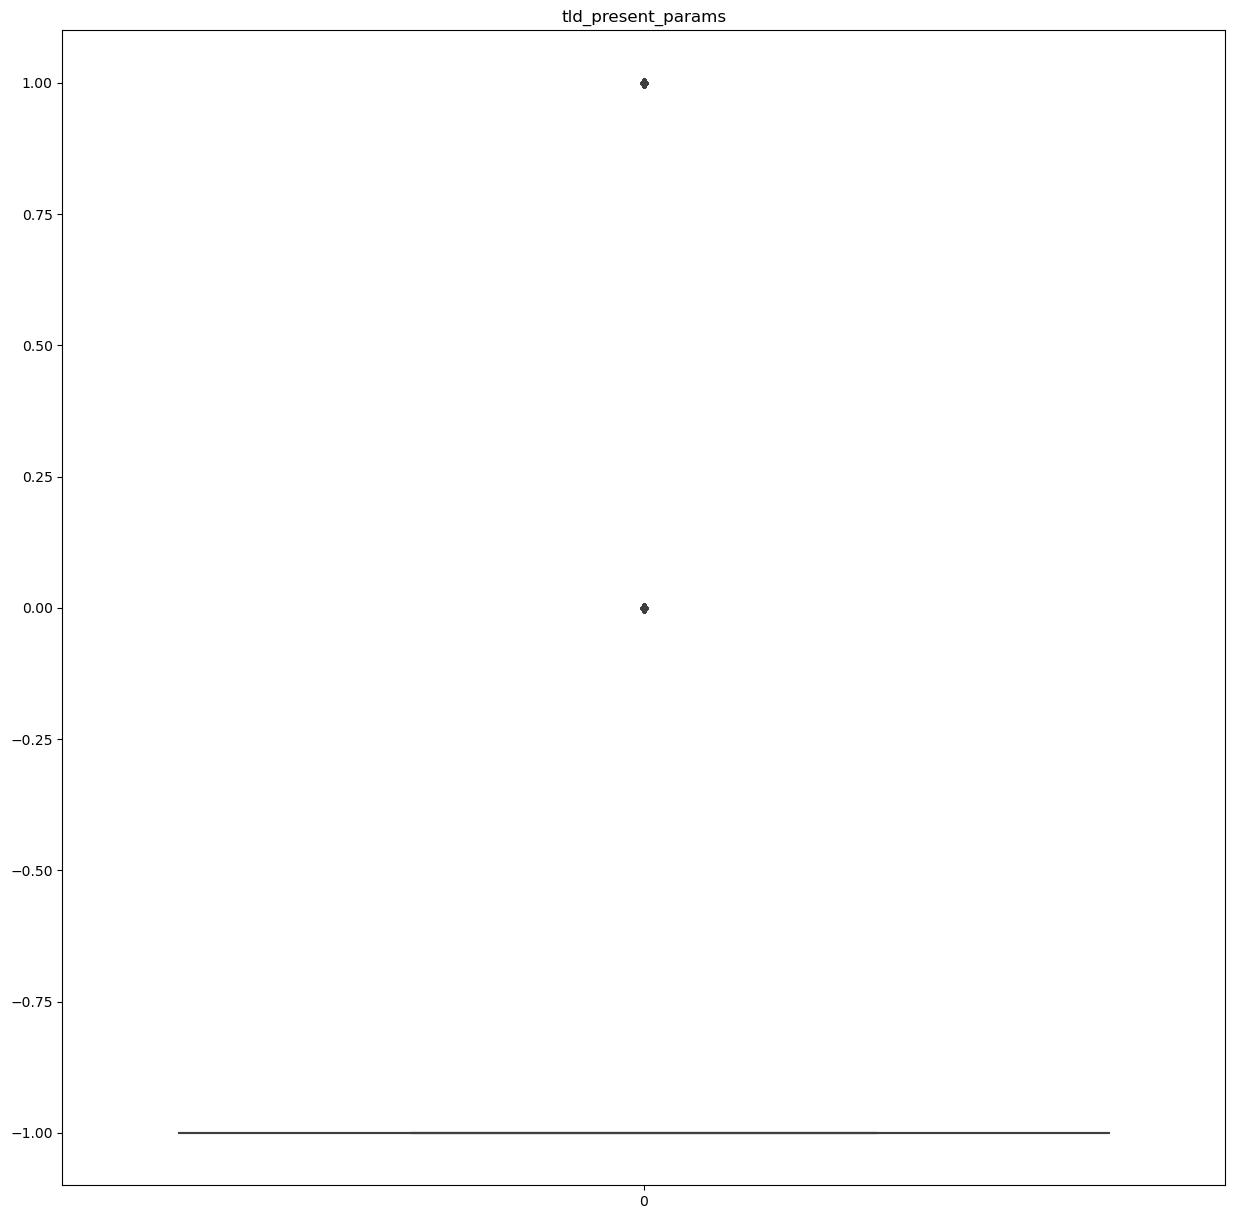

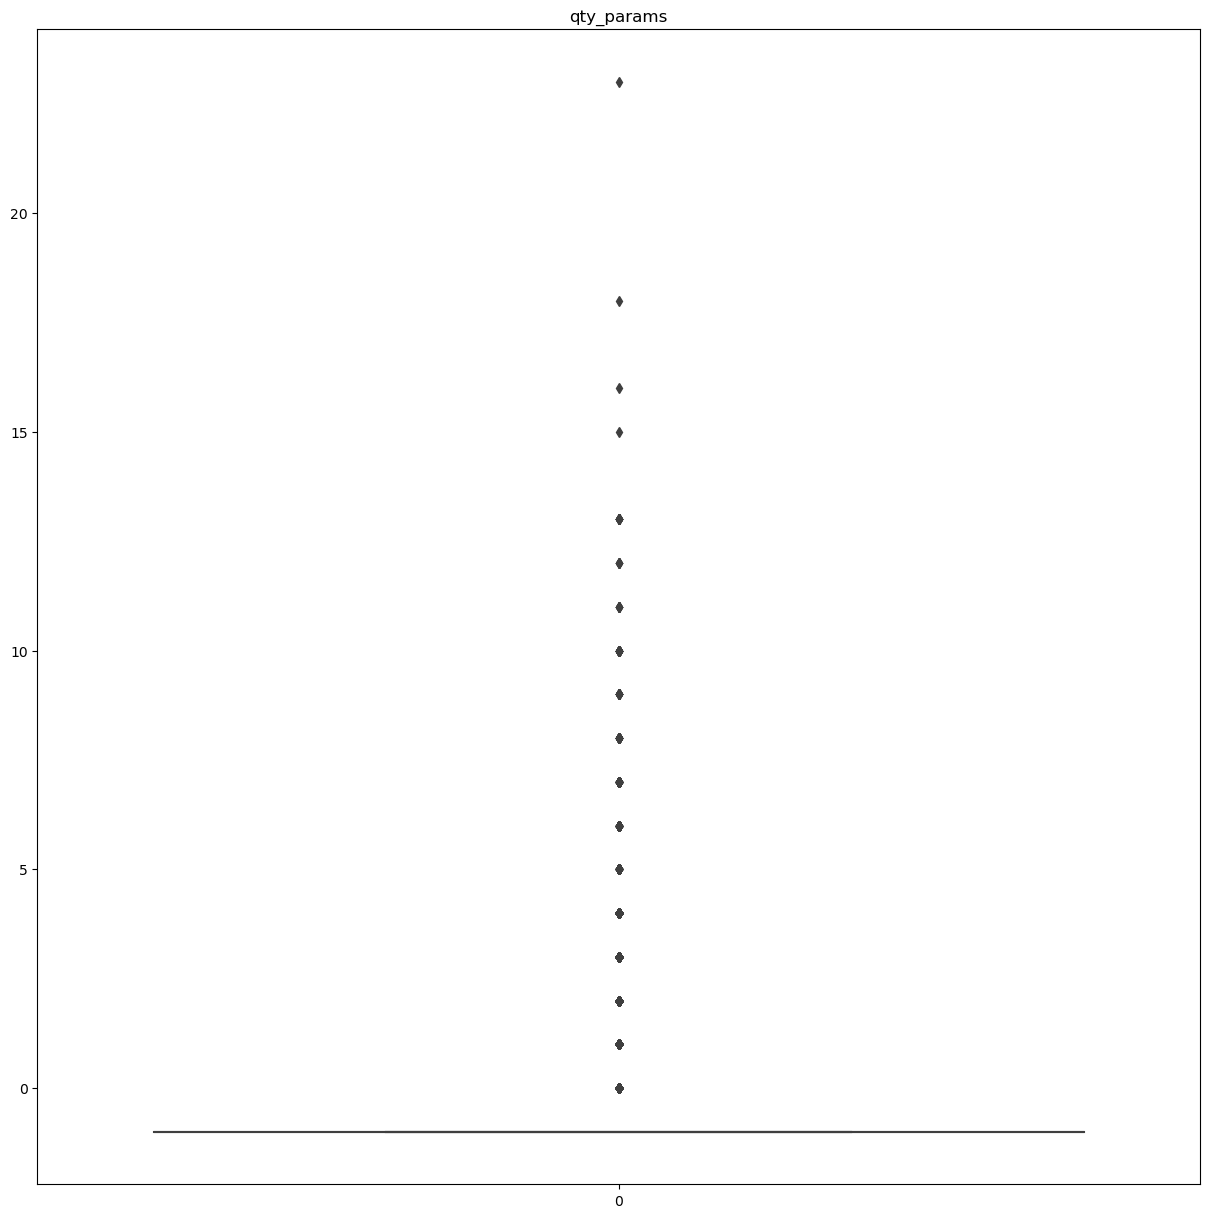

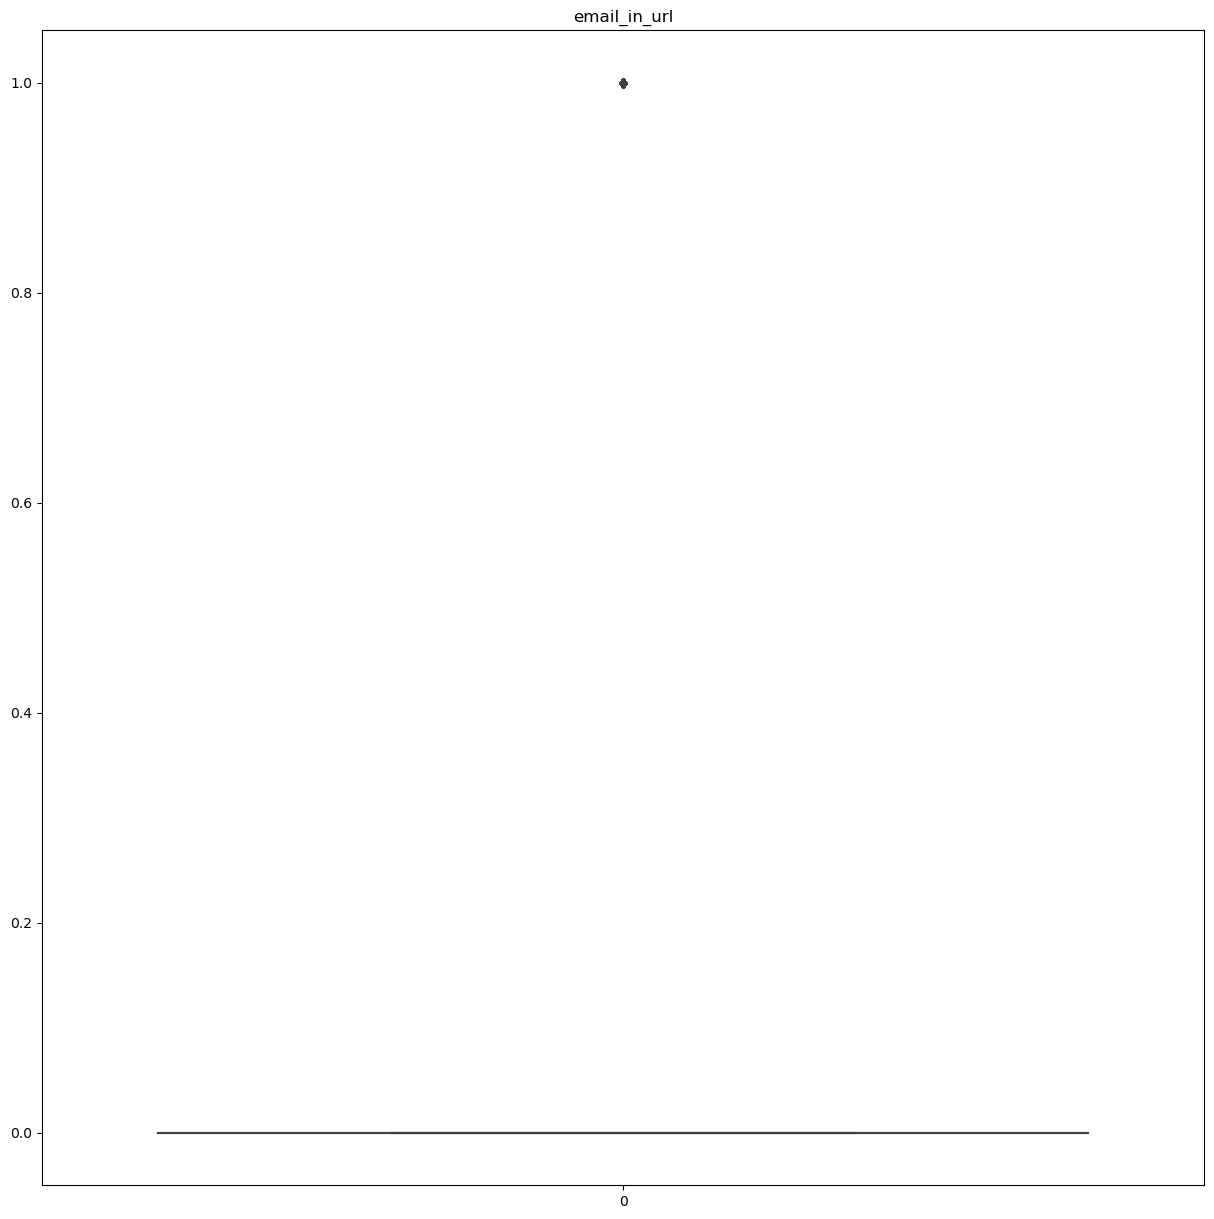

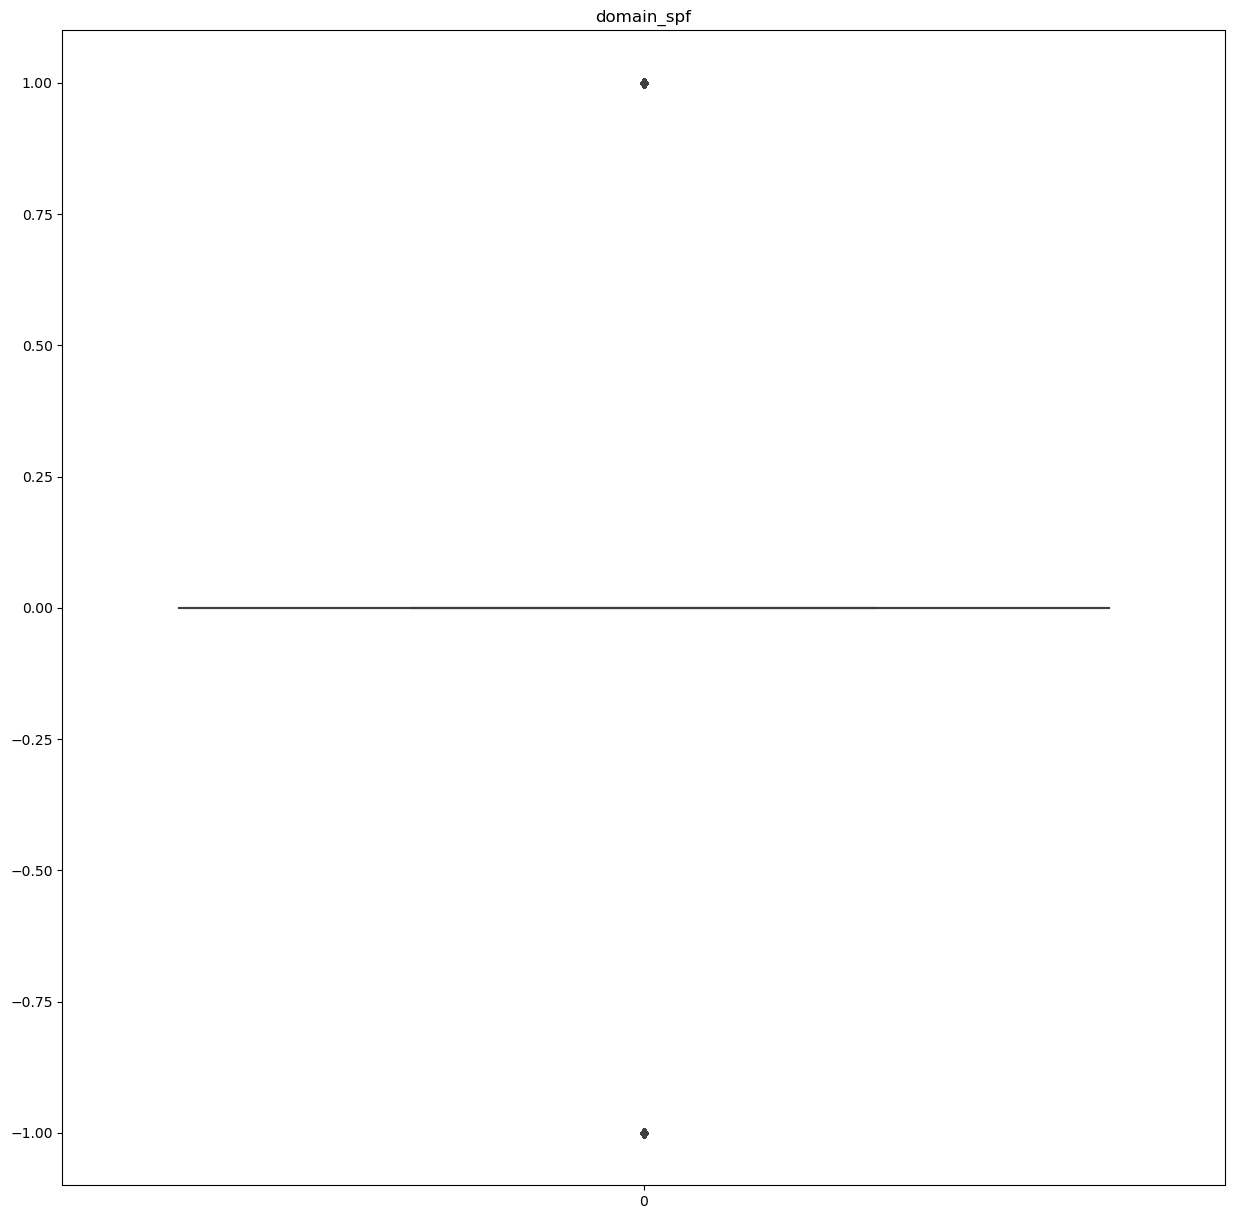

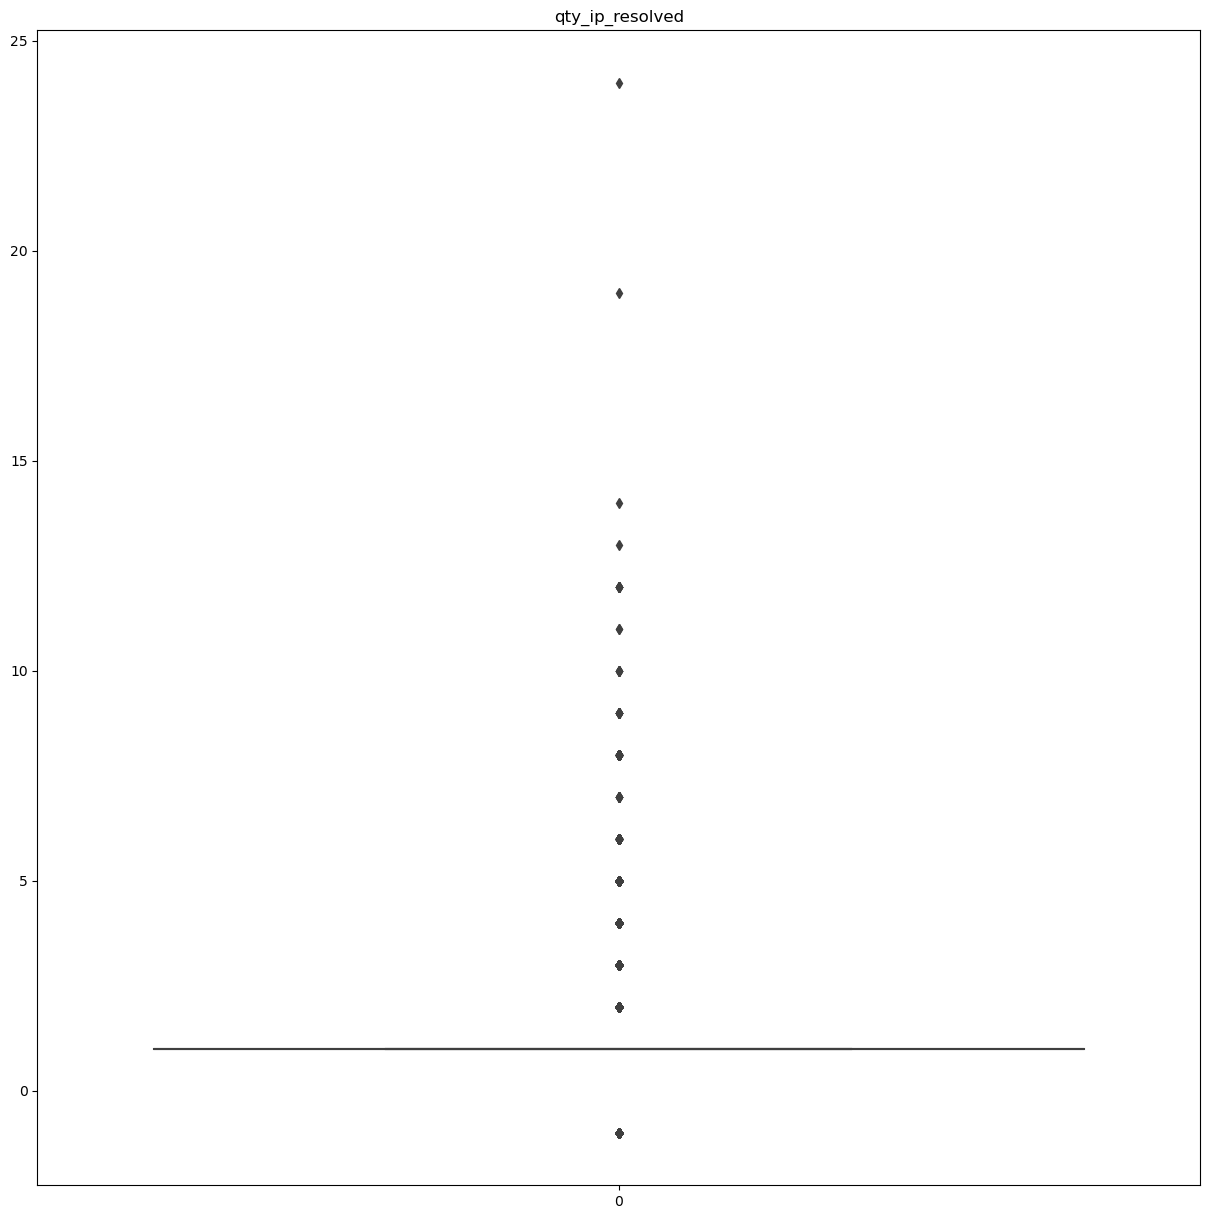

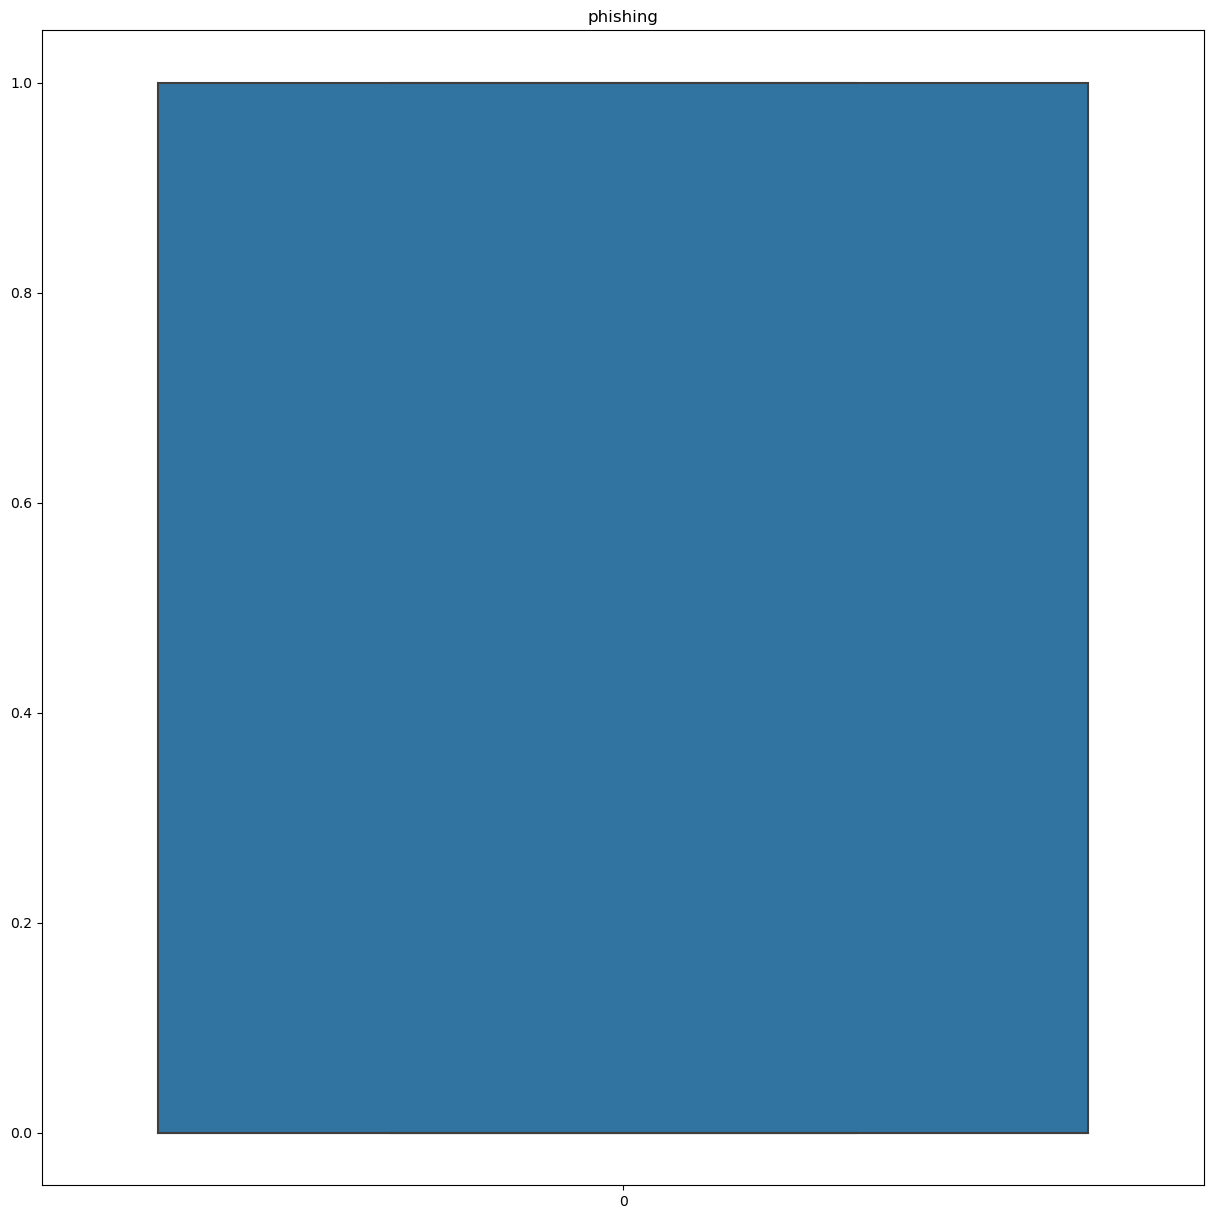

<Figure size 1500x1500 with 0 Axes>

In [47]:
for feature in discrete_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [48]:
#Creating a copy of data
data = df.copy()


In [49]:
#Splitting the data for train-test-split
X=df.drop(labels="phishing",axis=1)
Y=df[["phishing"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X_train, oversampled_Y_train = sm.fit_resample(X_train, y_train)
train_data = pd.concat([pd.DataFrame(oversampled_Y_train), pd.DataFrame(oversampled_X_train)], axis=1)
oversampled_X_test, oversampled_Y_test = sm.fit_resample(X_test, y_test)
test_data = pd.concat([pd.DataFrame(oversampled_Y_test), pd.DataFrame(oversampled_X_test)], axis=1)


In [50]:
#Calculate class counts in the training set
train_class_counts = train_data['phishing'].value_counts()

# Calculate class counts in the testing set
test_class_counts = test_data['phishing'].value_counts()

print("Training Set Class Counts:")
print(train_class_counts)
print("\nTesting Set Class Counts:")
print(test_class_counts)

# Calculate class distribution percentages in the training set
train_class_distribution = train_data['phishing'].value_counts(normalize=True) * 100

# Calculate class distribution percentages in the testing set
test_class_distribution = test_data['phishing'].value_counts(normalize=True) * 100

# Print class counts and distribution percentages
print("\nTraining Set Class Distribution (%):")
print(train_class_distribution)

print("\Test Set Class Distribution (%):")
print(test_class_distribution)

Training Set Class Counts:
0    38822
1    38822
Name: phishing, dtype: int64

Testing Set Class Counts:
0    19178
1    19178
Name: phishing, dtype: int64

Training Set Class Distribution (%):
0    50.0
1    50.0
Name: phishing, dtype: float64
\Test Set Class Distribution (%):
0    50.0
1    50.0
Name: phishing, dtype: float64


In [51]:
#Handling outliers in train data
for feature in continuous_feature:
    IQR=train_data[feature].quantile(0.75)-train_data[feature].quantile(0.25)
    lower_bridge=train_data[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=train_data[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    train_data.loc[train_data[feature]<lower_bridge,feature]=lower_bridge
    train_data.loc[train_data[feature]>=upper_bridge,feature]=upper_bridge
# %%
for feature in discrete_feature:
    IQR=train_data[feature].quantile(0.75)-train_data[feature].quantile(0.25)
    lower_bridge=train_data[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=train_data[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    train_data.loc[train_data[feature]<lower_bridge,feature]=lower_bridge
    train_data.loc[train_data[feature]>=upper_bridge,feature]=upper_bridge


In [52]:
# %%
#Handling outliers in test data
for feature in continuous_feature:
    IQR=test_data[feature].quantile(0.75)-test_data[feature].quantile(0.25)
    lower_bridge=test_data[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=test_data[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    test_data.loc[test_data[feature]<lower_bridge,feature]=lower_bridge
    test_data.loc[test_data[feature]>=upper_bridge,feature]=upper_bridge

    #%%
for feature in discrete_feature:
    IQR=test_data[feature].quantile(0.75)-test_data[feature].quantile(0.25)
    lower_bridge=test_data[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=test_data[feature].quantile(0.75)+(IQR*1.5)
    #print(lower_bridge), print(upper_bridge)
    test_data.loc[test_data[feature]<lower_bridge,feature]=lower_bridge
    test_data.loc[test_data[feature]>=upper_bridge,feature]=upper_bridge
# %%


In [53]:
## Feature Selection

X_train=train_data.drop(labels="phishing",axis=1)
Y_train=train_data[["phishing"]]
X_test=test_data.drop(labels="phishing",axis=1)
Y_test=test_data[["phishing"]]

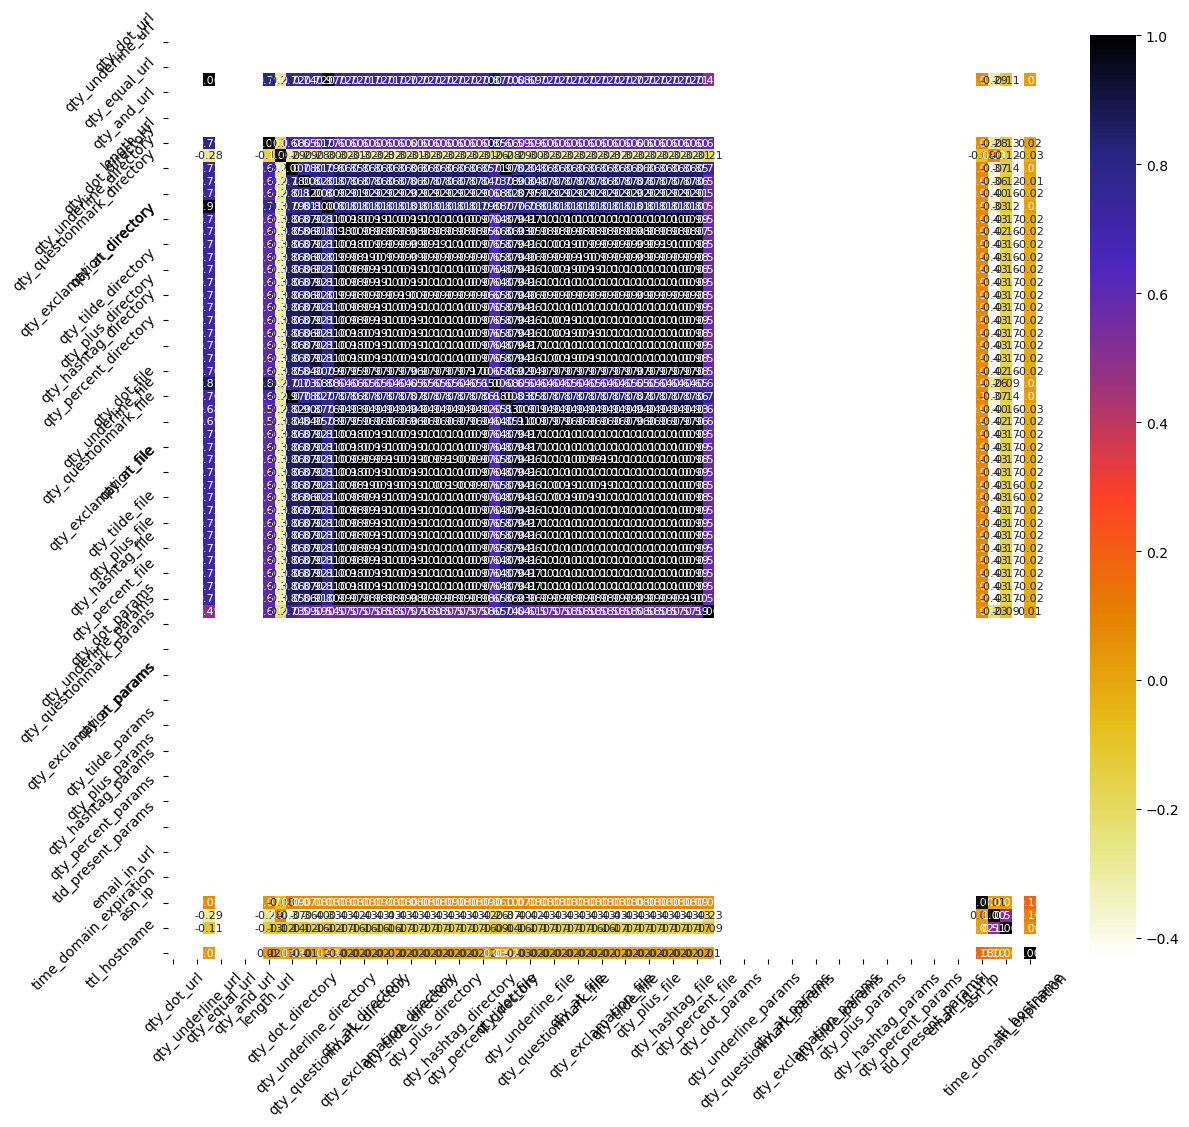

In [54]:
#dropping correlated features from train data
plt.figure(figsize=(14, 12))  # Increase figure size
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, fmt=".2f", annot_kws={"size": 8})  # Adjust font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.show()


In [55]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
#threshold=85% that is if they are correlated by 85%
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

32

In [57]:
#features which are going to get dropped
corr_features

{'directory_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_at_directory',
 'qty_at_file',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hyphen_file',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_underline_file'}

In [58]:
"""def corr_heatmap(data, idx_s, idx_e):
    y = data['phishing']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['phishing'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()"""

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/3784444741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['phishing'] = y


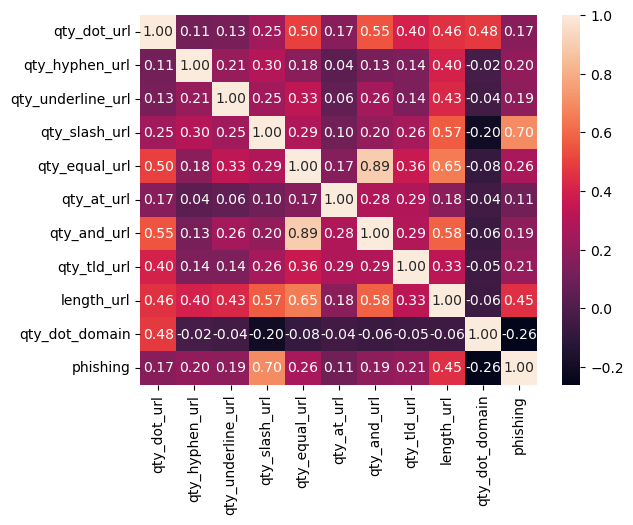

In [59]:
#corr_heatmap(data, 0, 10)

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/3784444741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['phishing'] = y


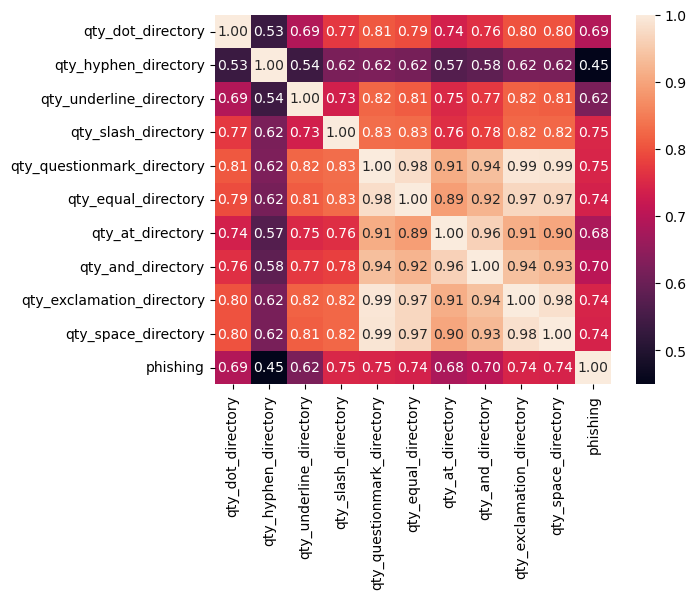

In [60]:
#corr_heatmap(data, 10, 20)

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/3784444741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['phishing'] = y


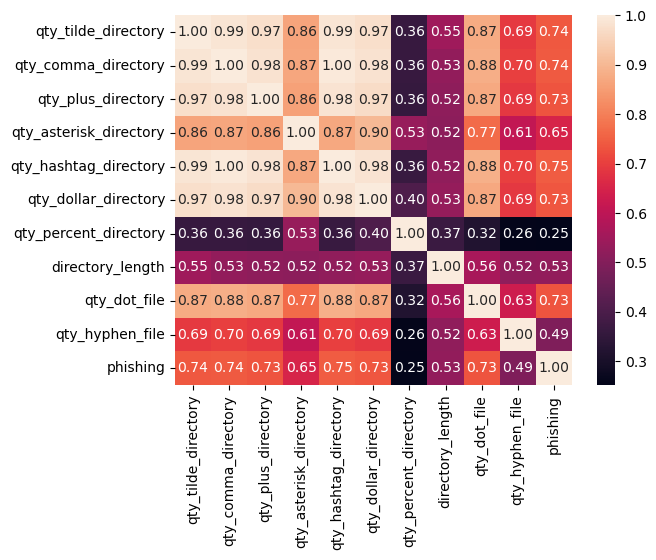

In [93]:
#corr_heatmap(data, 20, 30)

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/3784444741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['phishing'] = y


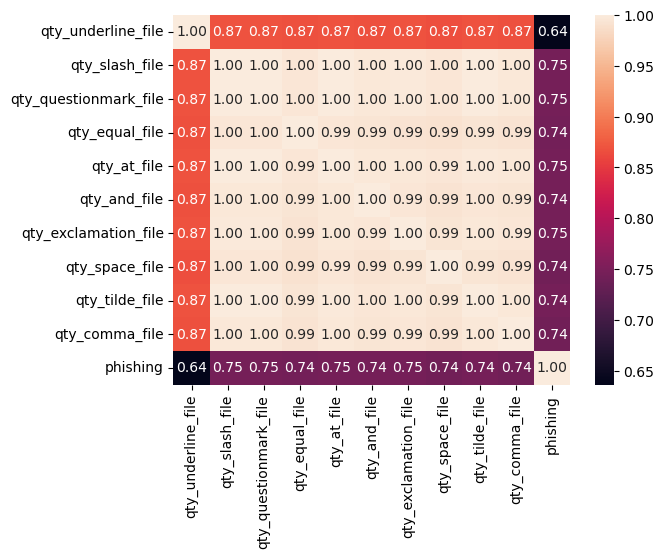

In [94]:
#corr_heatmap(data, 30, 40)

In [61]:
X_train.drop(corr_features,axis=1,inplace=True)

In [62]:
X_train.shape

(77644, 41)

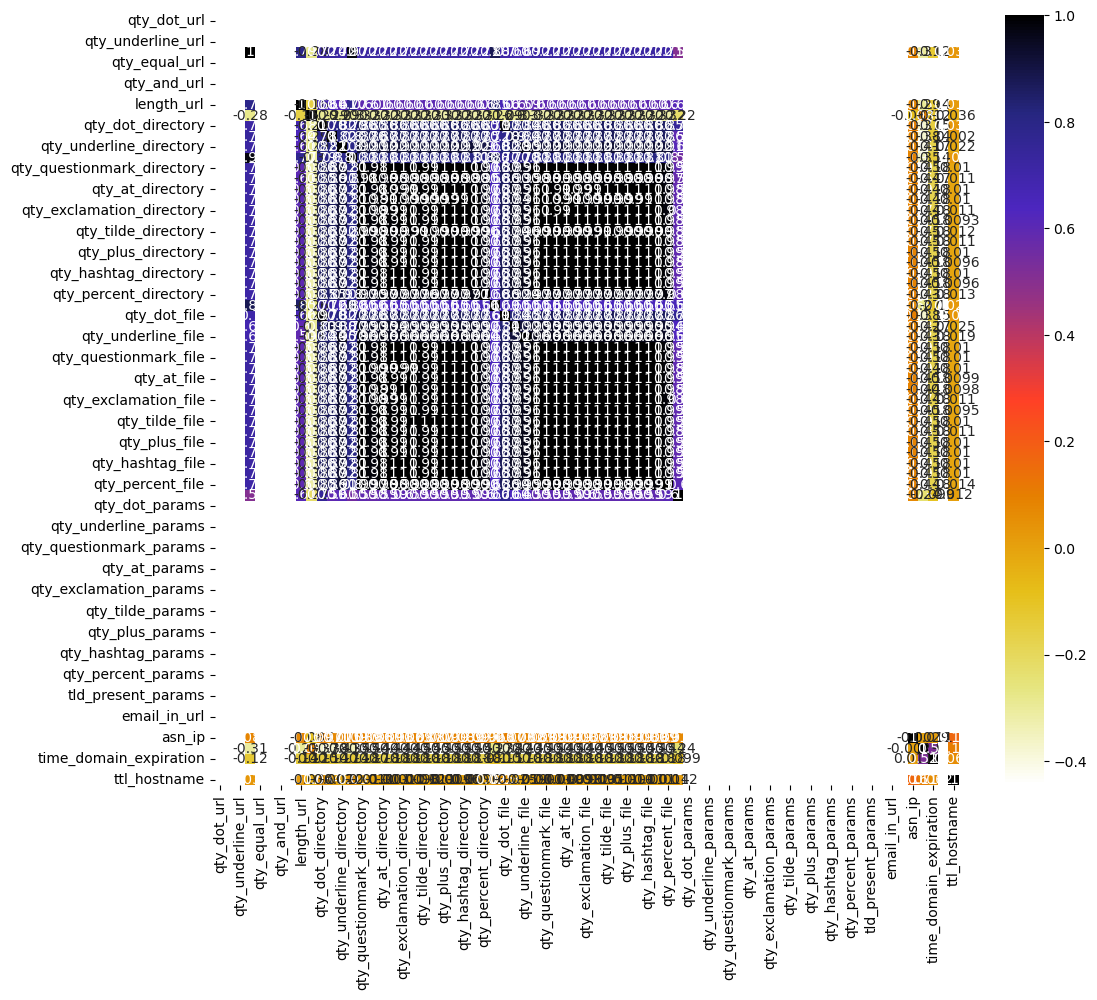

In [63]:
#dropping correlated data from test data
plt.figure(figsize=(12,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [64]:
#threshold=85% that is if they are correlated by 85%
corr_features = correlation(X_test, 0.85)
len(set(corr_features))

32

In [65]:
#features which are going to get dropped
corr_features

{'directory_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_at_directory',
 'qty_at_file',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hyphen_file',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_underline_file'}

In [66]:
X_test.drop(corr_features,axis=1,inplace=True)

In [67]:
X_test.shape

(38356, 41)

In [68]:
#Removing features having 0 varience using Varience Threshold from train data
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [69]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

30


In [70]:
X_train.drop(constant_columns,axis=1,inplace=True)

In [71]:
X_train.shape

(77644, 11)

In [72]:
##Removing features having 0 varience using Varience Threshold from train data
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_test)

VarianceThreshold(threshold=0)

In [73]:
constant_columns = [column for column in X_test.columns
                    if column not in X_test.columns[var_thres.get_support()]]

print(len(constant_columns))

30


In [74]:
X_test.drop(constant_columns,axis=1,inplace=True)

In [75]:
X_test.shape

(38356, 11)

In [76]:
df_final_train=pd.DataFrame(X_train)
df_final_test=pd.DataFrame(X_test)

In [77]:
df_final_train

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0                0.0        22.0             2.0               -1.0   
1                0.0        11.0             2.0               -1.0   
2                0.0        21.0             3.0               -1.0   
3                6.0        79.0             1.0                0.0   
4                1.0        71.0             2.0                0.0   
...              ...         ...             ...                ...   
77639            2.0        50.0             2.0                1.0   
77640            3.0        39.0             2.0                0.0   
77641            4.0        95.5             1.0                1.0   
77642            1.0        14.0             1.0                0.0   
77643            2.0        95.5             2.0                0.0   

       qty_hyphen_directory  qty_underline_directory  file_length   asn_ip  \
0                      -1.0                     -1.0           -1  20013.0   
1                      -1.0                     -1.0           -1  54113.0   
2                      -1.0                     -1.0           -1     -1.0   
3                       0.0                      0.0            0   6697.0   
4                       0.0                      0.0            6  15169.0   
...                     ...                      ...          ...      ...   
77639                   0.0                      0.0            8  47583.0   
77640                   0.0                      0.0            0  15169.0   
77641                   1.0                      0.0           12  38888.0   
77642                   0.0                      0.0            5  26496.0   
77643                   0.0                      0.0            8  24492.0   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                        7507                   161.0       14391.0  
1                        7411                   257.0        3599.0  
2                          -1                    -1.0          -1.0  
3                        1387                    73.0         462.0  
4                        7690                   709.0         227.0  
...                       ...                     ...           ...  
77639                      -1                    -1.0          43.0  
77640                      -1                    -1.0         298.0  
77641                     188                    24.0        5872.0  
77642                    1178                   280.0       10792.0  
77643                      -1                    -1.0         148.0  

[77644 rows x 11 columns]

In [78]:
df_final_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0                0.0        26.0             3.5               -1.0   
1                0.0        20.0             2.0               -1.0   
2                0.0        16.0             2.0               -1.0   
3                0.0        25.0             3.5               -1.0   
4                0.0        18.0             2.0               -1.0   
...              ...         ...             ...                ...   
38351            2.0        39.0             1.0                0.0   
38352            5.0        94.0             1.0                1.0   
38353            1.0        51.0             2.0                0.0   
38354            4.0        77.0             2.0                0.0   
38355            3.0        34.0             2.0                0.0   

       qty_hyphen_directory  qty_underline_directory  file_length   asn_ip  \
0                      -1.0                     -1.0         -1.0  28660.0   
1                      -1.0                     -1.0         -1.0  29873.0   
2                      -1.0                     -1.0         -1.0  13335.0   
3                      -1.0                     -1.0         -1.0  27715.0   
4                      -1.0                     -1.0         -1.0     -1.0   
...                     ...                      ...          ...      ...   
38351                   0.0                      0.0         10.0  46606.0   
38352                   0.0                      0.0          9.0  36444.0   
38353                   1.5                      0.0          0.0  22612.0   
38354                   0.0                      0.0          5.0  12859.0   
38355                   0.0                      0.0          0.0  15886.0   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                      8217.0                    -1.0        3598.0  
1                      5952.0                   256.0        3598.0  
2                       199.0                   165.0         299.0  
3                      7883.0                    -1.0        3585.0  
4                        -1.0                    -1.0          -1.0  
...                       ...                     ...           ...  
38351                  4204.0                   177.0       14369.0  
38352                  1159.0                    78.0         531.0  
38353                   528.0                   142.0        1191.0  
38354                    -1.0                    -1.0         590.0  
38355                  4408.0                   338.0         574.0  

[38356 rows x 11 columns]

In [79]:
#Applying standard scalar
#scaler=StandardScaler()
scaled_features_train = StandardScaler().fit_transform(df_final_train.values)
scaled_features_test = StandardScaler().fit_transform(df_final_test.values)
scaled_features_df_train = pd.DataFrame(scaled_features_train, index=df_final_train.index, columns=df_final_train.columns)
scaled_features_df_test = pd.DataFrame(scaled_features_test, index=df_final_test.index, columns=df_final_test.columns)

In [81]:
scaled_features_df_train


qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.860922   -0.587949        0.392668          -1.032758   
1          -0.860922   -1.024684        0.392668          -1.032758   
2          -0.860922   -0.627653        1.972167          -1.032758   
3           2.323646    1.675131       -1.186832           0.247333   
4          -0.330160    1.357506        0.392668           0.247333   
...              ...         ...             ...                ...   
77639       0.200601    0.523739        0.392668           1.527424   
77640       0.731362    0.087004        0.392668           0.247333   
77641       1.262124    2.330233       -1.186832           1.527424   
77642      -0.330160   -0.905575       -1.186832           0.247333   
77643       0.200601    2.330233        0.392668           0.247333   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039196                -1.104161    -0.688787 -0.325310   
1                 -1.039196                -1.104161    -0.688787  1.586329   
2                 -1.039196                -1.104161    -0.688787 -1.447290   
3                  0.445405                 0.635820    -0.512569 -1.071802   
4                  0.445405                 0.635820     0.544734 -0.596863   
...                     ...                      ...          ...       ...   
77639              0.445405                 0.635820     0.897168  1.220258   
77640              0.445405                 0.635820    -0.512569 -0.596863   
77641              1.930007                 0.635820     1.602037  0.732819   
77642              0.445405                 0.635820     0.368516  0.038126   
77643              0.445405                 0.635820     0.897168 -0.074218   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                    1.555394               -0.274632      1.286387  
1                    1.522588                0.082205     -0.300153  
2                   -1.010293               -0.876794     -0.829392  
3                   -0.535976               -0.601733     -0.761326  
4                    1.617930                1.762312     -0.795873  
...                       ...                     ...           ...  
77639               -1.010293               -0.876794     -0.822923  
77640               -1.010293               -0.876794     -0.785436  
77641               -0.945707               -0.783868      0.034002  
77642               -0.607397                0.167697      0.757295  
77643               -1.010293               -0.876794     -0.807487  

[77644 rows x 11 columns]

In [82]:
scaled_features_df_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.859817   -0.427256        2.757910          -1.030919   
1          -0.859817   -0.665828        0.386090          -1.030919   
2          -0.859817   -0.824876        0.386090          -1.030919   
3          -0.859817   -0.467018        2.757910          -1.030919   
4          -0.859817   -0.745352        0.386090          -1.030919   
...              ...         ...             ...                ...   
38351       0.206787    0.089650       -1.195124           0.256127   
38352       1.806695    2.276561       -1.195124           1.543174   
38353      -0.326515    0.566794        0.386090           0.256127   
38354       1.273392    1.600607        0.386090           0.256127   
38355       0.740090   -0.109160        0.386090           0.256127   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039011                -1.101073    -0.707094  0.141845   
1                 -1.039011                -1.101073    -0.707094  0.209510   
2                 -1.039011                -1.101073    -0.707094 -0.713032   
3                 -1.039011                -1.101073    -0.707094  0.089130   
4                 -1.039011                -1.101073    -0.707094 -1.456956   
...                     ...                      ...          ...       ...   
38351              0.462413                 0.641850     1.350342  1.142929   
38352              0.462413                 0.641850     1.163302  0.576061   
38353              2.714549                 0.641850    -0.520055 -0.195531   
38354              0.462413                 0.641850     0.415144 -0.739584   
38355              0.462413                 0.641850    -0.520055 -0.570729   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                    1.802048               -0.873922     -0.299607  
1                    1.030622                0.100443     -0.299607  
2                   -0.928769               -0.244566     -0.783247  
3                    1.688293               -0.873922     -0.301513  
4                   -0.996886               -0.873922     -0.827227  
...                       ...                     ...           ...  
38351                0.435278               -0.199070      1.279442  
38352               -0.601806               -0.574409     -0.749235  
38353               -0.816716               -0.331766     -0.652478  
38354               -0.996886               -0.873922     -0.740586  
38355                0.504757                0.411330     -0.742931  

[38356 rows x 11 columns]

In [83]:
scaled_features_df_train['phishing']=pd.DataFrame(Y)['phishing']=pd.DataFrame(Y_train)
scaled_features_df_test['phishing']=pd.DataFrame(Y_test)

In [84]:
#Converting the preproccessed Dataframe to a csv file
scaled_features_df_train.to_csv("train.csv",index=False)
scaled_features_df_test.to_csv("test.csv",index=False)

In [85]:
df_reader_test=pd.read_csv("test.csv")
df_reader_train=pd.read_csv("train.csv")

In [86]:
df_reader_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.859817   -0.427256        2.757910          -1.030919   
1          -0.859817   -0.665828        0.386090          -1.030919   
2          -0.859817   -0.824876        0.386090          -1.030919   
3          -0.859817   -0.467018        2.757910          -1.030919   
4          -0.859817   -0.745352        0.386090          -1.030919   
...              ...         ...             ...                ...   
38351       0.206787    0.089650       -1.195124           0.256127   
38352       1.806695    2.276561       -1.195124           1.543174   
38353      -0.326515    0.566794        0.386090           0.256127   
38354       1.273392    1.600607        0.386090           0.256127   
38355       0.740090   -0.109160        0.386090           0.256127   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039011                -1.101073    -0.707094  0.141845   
1                 -1.039011                -1.101073    -0.707094  0.209510   
2                 -1.039011                -1.101073    -0.707094 -0.713032   
3                 -1.039011                -1.101073    -0.707094  0.089130   
4                 -1.039011                -1.101073    -0.707094 -1.456956   
...                     ...                      ...          ...       ...   
38351              0.462413                 0.641850     1.350342  1.142929   
38352              0.462413                 0.641850     1.163302  0.576061   
38353              2.714549                 0.641850    -0.520055 -0.195531   
38354              0.462413                 0.641850     0.415144 -0.739584   
38355              0.462413                 0.641850    -0.520055 -0.570729   

       time_domain_activation  time_domain_expiration  ttl_hostname  phishing  
0                    1.802048               -0.873922     -0.299607       0.0  
1                    1.030622                0.100443     -0.299607       0.0  
2                   -0.928769               -0.244566     -0.783247       0.0  
3                    1.688293               -0.873922     -0.301513       0.0  
4                   -0.996886               -0.873922     -0.827227       0.0  
...                       ...                     ...           ...       ...  
38351                0.435278               -0.199070      1.279442       1.0  
38352               -0.601806               -0.574409     -0.749235       1.0  
38353               -0.816716               -0.331766     -0.652478       1.0  
38354               -0.996886               -0.873922     -0.740586       1.0  
38355                0.504757                0.411330     -0.742931       1.0  

[38356 rows x 12 columns]

In [87]:
df_reader_train

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.860922   -0.587949        0.392668          -1.032758   
1          -0.860922   -1.024684        0.392668          -1.032758   
2          -0.860922   -0.627653        1.972167          -1.032758   
3           2.323646    1.675131       -1.186832           0.247333   
4          -0.330160    1.357506        0.392668           0.247333   
...              ...         ...             ...                ...   
77639       0.200601    0.523739        0.392668           1.527424   
77640       0.731362    0.087004        0.392668           0.247333   
77641       1.262124    2.330233       -1.186832           1.527424   
77642      -0.330160   -0.905575       -1.186832           0.247333   
77643       0.200601    2.330233        0.392668           0.247333   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039196                -1.104161    -0.688787 -0.325310   
1                 -1.039196                -1.104161    -0.688787  1.586329   
2                 -1.039196                -1.104161    -0.688787 -1.447290   
3                  0.445405                 0.635820    -0.512569 -1.071802   
4                  0.445405                 0.635820     0.544734 -0.596863   
...                     ...                      ...          ...       ...   
77639              0.445405                 0.635820     0.897168  1.220258   
77640              0.445405                 0.635820    -0.512569 -0.596863   
77641              1.930007                 0.635820     1.602037  0.732819   
77642              0.445405                 0.635820     0.368516  0.038126   
77643              0.445405                 0.635820     0.897168 -0.074218   

       time_domain_activation  time_domain_expiration  ttl_hostname  phishing  
0                    1.555394               -0.274632      1.286387       0.0  
1                    1.522588                0.082205     -0.300153       0.0  
2                   -1.010293               -0.876794     -0.829392       0.0  
3                   -0.535976               -0.601733     -0.761326       1.0  
4                    1.617930                1.762312     -0.795873       0.0  
...                       ...                     ...           ...       ...  
77639               -1.010293               -0.876794     -0.822923       1.0  
77640               -1.010293               -0.876794     -0.785436       1.0  
77641               -0.945707               -0.783868      0.034002       1.0  
77642               -0.607397                0.167697      0.757295       1.0  
77643               -1.010293               -0.876794     -0.807487       1.0  

[77644 rows x 12 columns]

In [88]:
for feature in df_reader_train.columns:
    print(feature)

qty_slash_url
length_url
qty_dot_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
file_length
asn_ip
time_domain_activation
time_domain_expiration
ttl_hostname
phishing


In [89]:
for feature in df_reader_test.columns:
    print(feature)

qty_slash_url
length_url
qty_dot_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
file_length
asn_ip
time_domain_activation
time_domain_expiration
ttl_hostname
phishing


In [90]:
numerical_feature_train = [feature for feature in df_reader_train.columns if df_reader_train[feature].dtypes != 'O']
numerical_feature_test = [feature for feature in df_reader_test.columns if df_reader_test[feature].dtypes != 'O']
discrete_feature_train=[feature for feature in numerical_feature_train if len(df_reader_train[feature].unique())<25]
discrete_feature_test=[feature for feature in numerical_feature_test if len(df_reader_test[feature].unique())<25]
continuous_feature_train = [feature for feature in numerical_feature_train if feature not in discrete_feature_train]
continuous_feature_test = [feature for feature in numerical_feature_test if feature not in discrete_feature_test]

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


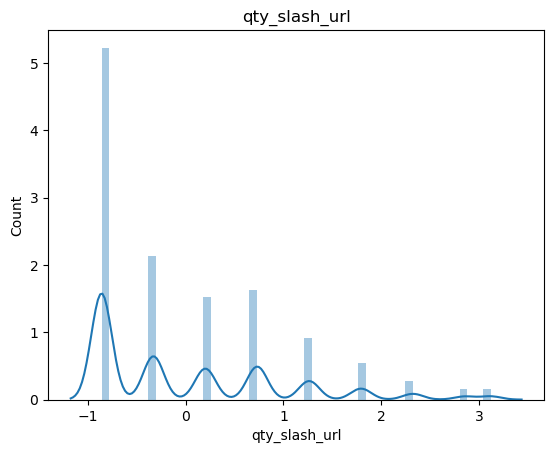

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


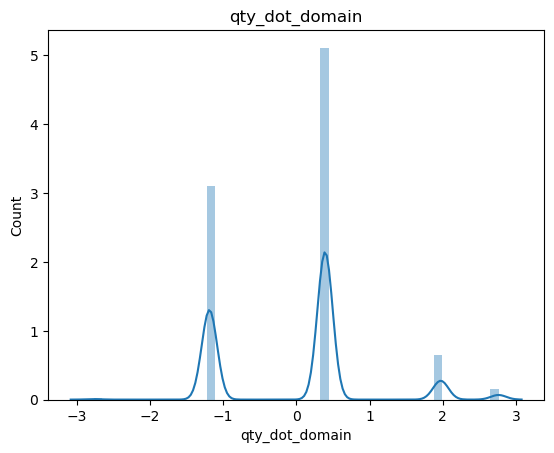

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


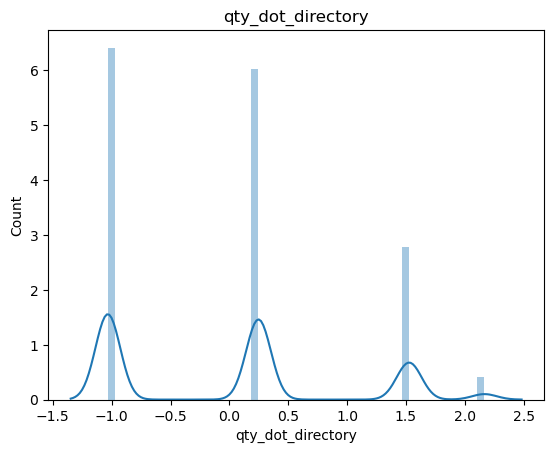

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


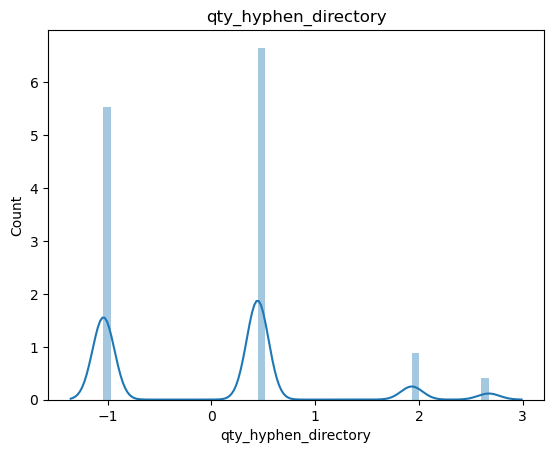

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


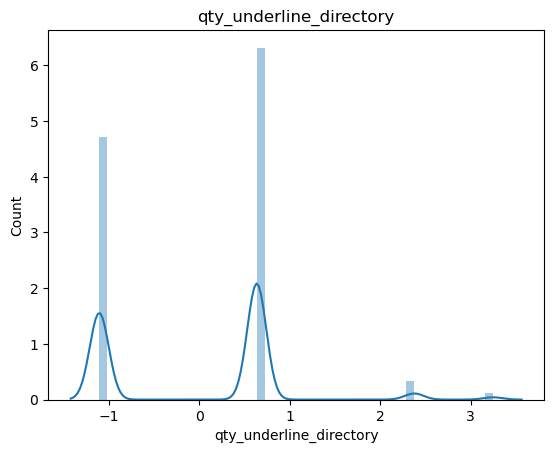

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


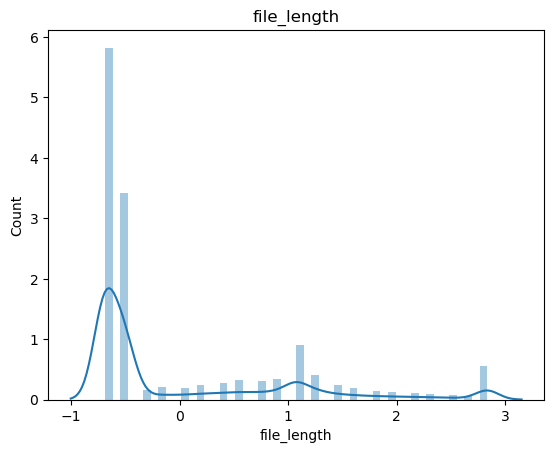

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/345799115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_train[feature])


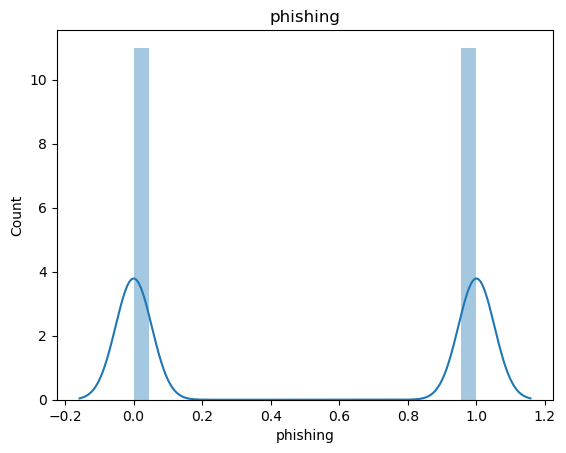

<Figure size 1500x1500 with 0 Axes>

In [91]:
#Prprocessed discrete function
for feature in discrete_feature_train:
    sns.distplot(df_reader_train[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


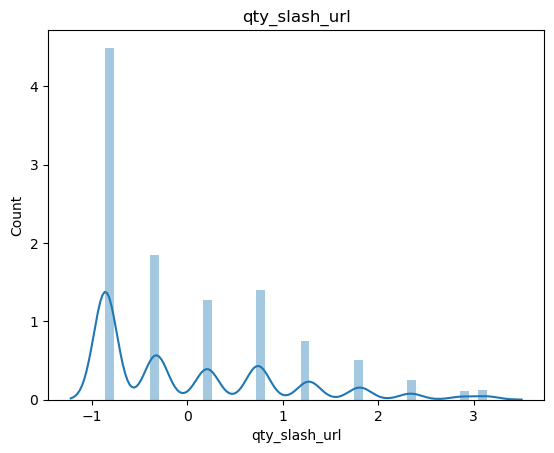

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


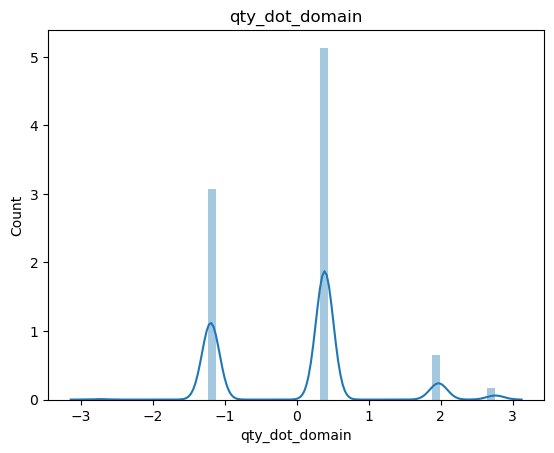

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


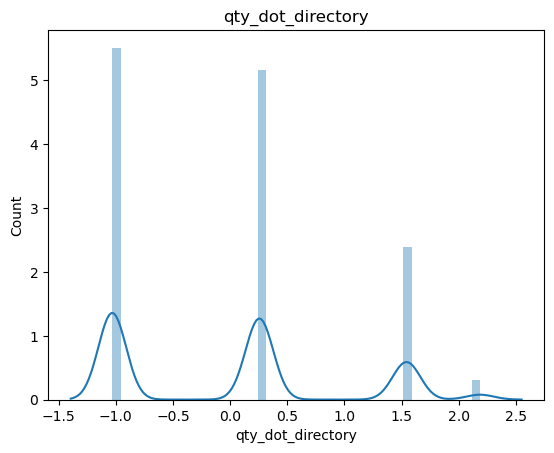

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


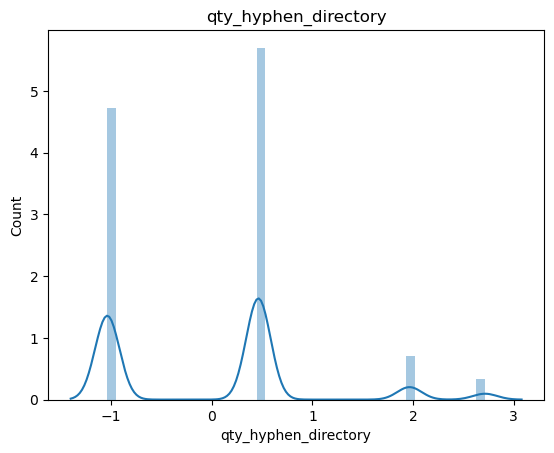

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


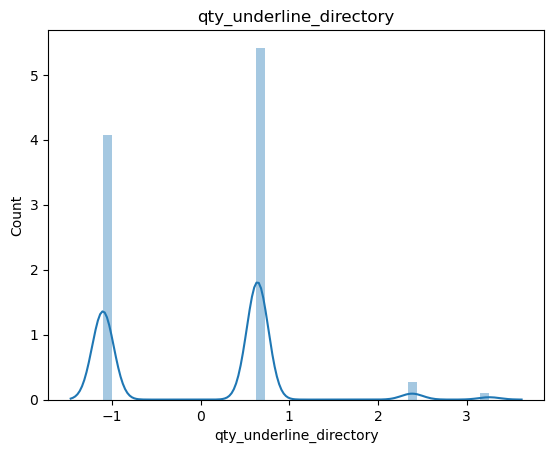

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


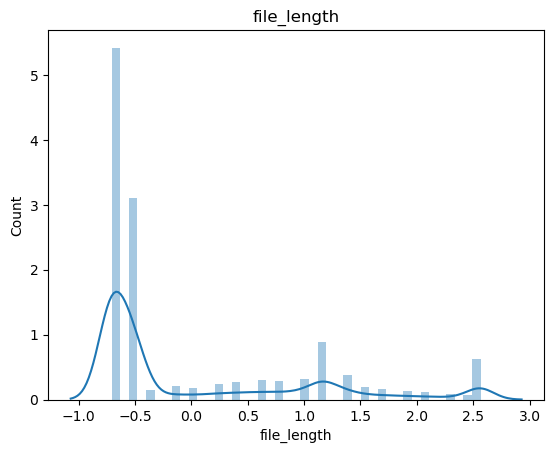

<Figure size 1500x1500 with 0 Axes>

/var/folders/h9/wwctzh8s5s778l3rptf7wzvm0000gn/T/ipykernel_83649/2140964175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reader_test[feature])


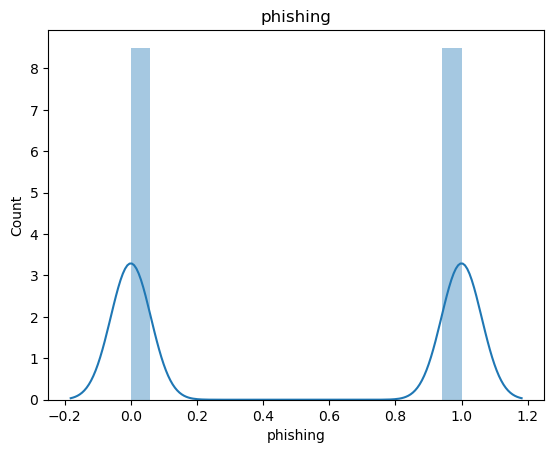

<Figure size 1500x1500 with 0 Axes>

In [92]:
for feature in discrete_feature_test:
    sns.distplot(df_reader_test[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()